## Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import time
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
lung = pd.read_csv("lung_data_.csv")
original_max_columns = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', None)

In [3]:
lung

reasfolll  reassympl  reassurvl  reasothl  num_cancl  lung_cancer  \
0             NaN        NaN        NaN       NaN          0            0   
1             NaN        NaN        NaN       NaN          0            0   
2             NaN        NaN        NaN       NaN          0            0   
3             NaN        NaN        NaN       NaN          0            0   
4             NaN        NaN        NaN       NaN          0            0   
...           ...        ...        ...       ...        ...          ...   
154882        NaN        NaN        NaN       NaN          0            0   
154883        NaN        NaN        NaN       NaN          0            0   
154884        NaN        NaN        NaN       NaN          0            0   
154885        0.0        0.0        NaN       1.0          1            1   
154886        NaN        NaN        NaN       NaN          0            0   

        intstatl_cat  lung_stage  lung_stage_7e  lung_stage_t  lung_stage_n  \
0                  0         NaN            NaN           NaN           NaN   
1                  0         NaN            NaN           NaN           NaN   
2                  0         NaN            NaN           NaN           NaN   
3                  0         NaN            NaN           NaN           NaN   
4                  0         NaN            NaN           NaN           NaN   
...              ...         ...            ...           ...           ...   
154882             0         NaN            NaN           NaN           NaN   
154883             0         NaN            NaN           NaN           NaN   
154884             0         NaN            NaN           NaN           NaN   
154885             1       110.0          110.0         100.0           0.0   
154886             0         NaN            NaN           NaN           NaN   

        lung_stage_m  lung_clinstage  lung_clinstage_7e  lung_clinstage_t  \
0                NaN             NaN                NaN               NaN   
1                NaN             NaN                NaN               NaN   
2                NaN             NaN                NaN               NaN   
3                NaN             NaN                NaN               NaN   
4                NaN             NaN                NaN               NaN   
...              ...             ...                ...               ...   
154882           NaN             NaN                NaN               NaN   
154883           NaN             NaN                NaN               NaN   
154884           NaN             NaN                NaN               NaN   
154885           0.0           110.0              110.0             100.0   
154886           NaN             NaN                NaN               NaN   

        lung_clinstage_n  lung_clinstage_m  lung_pathstage  lung_pathstage_7e  \
0                    NaN               NaN             NaN                NaN   
1                    NaN               NaN             NaN                NaN   
2                    NaN               NaN             NaN                NaN   
3                    NaN               NaN             NaN                NaN   
4                    NaN               NaN             NaN                NaN   
...                  ...               ...             ...                ...   
154882               NaN               NaN             NaN                NaN   
154883               NaN               NaN             NaN                NaN   
154884               NaN               NaN             NaN                NaN   
154885               0.0               0.0           110.0              110.0   
154886               NaN               NaN             NaN                NaN   

        lung_pathstage_t  lung_pathstage_n  lung_pathstage_m  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN  

## Data Cleaning 

### Check for missing, NaN values

In [4]:
lung.isna().sum()

reasfolll                 151107
reassympl                 151107
reassurvl                 154498
reasothl                  151107
num_cancl                      0
                           ...  
reconsent_outcome_days         0
fstcan_exitstat                0
fstcan_exitage                 0
fstcan_exitdays                0
in_TGWAS_population            0
Length: 251, dtype: int64

In [5]:
lung["lung_stage"].isna().sum()

151177

In [6]:
lung["lung_stage_7e"].isna().sum()

151176

In [7]:
# Reset the max columns to the original value
pd.set_option('display.max_columns', original_max_columns)

In [8]:
lung.dtypes

reasfolll                 float64
reassympl                 float64
reassurvl                 float64
reasothl                  float64
num_cancl                   int64
                           ...   
reconsent_outcome_days      int64
fstcan_exitstat             int64
fstcan_exitage              int64
fstcan_exitdays             int64
in_TGWAS_population         int64
Length: 251, dtype: object

## Identify the number of columns with NaN values

In [9]:
columns_with_nan = lung.columns[lung.isna().any()].tolist()

In [10]:
print(f"These are the columns with missing values. There are {len(columns_with_nan)} columns in total.")

These are the columns with missing values. There are 202 columns in total.


In [11]:
columns_with_nan

['reasfolll',
 'reassympl',
 'reassurvl',
 'reasothl',
 'lung_stage',
 'lung_stage_7e',
 'lung_stage_t',
 'lung_stage_n',
 'lung_stage_m',
 'lung_clinstage',
 'lung_clinstage_7e',
 'lung_clinstage_t',
 'lung_clinstage_n',
 'lung_clinstage_m',
 'lung_pathstage',
 'lung_pathstage_7e',
 'lung_pathstage_t',
 'lung_pathstage_n',
 'lung_pathstage_m',
 'lung_cancer_type',
 'lung_carcinoid',
 'lung_carcinoid_summstage',
 'lung_topography',
 'lung_grade',
 'lung_morphology',
 'lung_behavior',
 'lung_histtype',
 'lung_histtype_cat',
 'curative_pneuml',
 'curative_wsll',
 'curative_chemol',
 'curative_radl',
 'neoadjuvantl',
 'lung_num_heslide_imgs',
 'lung_has_deliv_heslide_img',
 'lung_cancer_first',
 'lung_seer',
 'lung_annyr',
 'primary_trtl_NSC_days',
 'primary_trtl_small_days',
 'lung_cancer_diagdays',
 'nlst_flag',
 'xry_result0',
 'xry_result1',
 'xry_result2',
 'xry_result3',
 'xry_prot',
 'num_xry_images',
 'num_xry_study_yrs',
 'has_xry_image0',
 'has_xry_image1',
 'has_xry_image2',
 '

## Corellation Analysis and Understanding the "Target variable"

#### Compute the correlation between features and the target variable

In [12]:
correlations = lung.corr()['lung_cancer'].sort_values(ascending=False)

In [13]:
correlations

lung_cancer                1.000000
num_cancl                  0.987717
primary_trtl_small         0.965221
intstatl_cat               0.853753
primary_trtl_NSC           0.822728
                             ...   
build_incidence_cutoff          NaN
primary_trtl_NSC_days           NaN
primary_trtl_small_days         NaN
lung_cancer_diagdays            NaN
build_death_cutoff              NaN
Name: lung_cancer, Length: 248, dtype: float64

### print the top 30 features

In [14]:
top_30_correlations = correlations.head(30)
top_30_correlations

lung_cancer            1.000000
num_cancl              0.987717
primary_trtl_small     0.965221
intstatl_cat           0.853753
primary_trtl_NSC       0.822728
ph_lung_muq            0.713855
f_dthl                 0.690776
d_dthl                 0.663593
ph_lung_sqx            0.614771
ph_lung_dhq            0.319273
reconsent_outcome      0.204730
cig_years              0.195949
pack_years             0.191649
is_dead                0.176662
is_dead_with_cod       0.176638
nlst_flag              0.176163
biopllink0             0.139956
cigpd_f                0.139652
ssmokea_f              0.132884
rsmoker_f              0.131843
selected_ccsub_2020    0.125129
smoked_f               0.120630
biopllink3             0.116954
biopllink2             0.096323
reassympl              0.091941
biopllink1             0.084278
emphys_f               0.081411
xry_result2            0.079372
cig_stat               0.075777
selected_25k_2020      0.067073
Name: lung_cancer, dtype: float64

## So far, I am just exploring my Data, covering all bases, I have done a corellation analysis on the Unclean dataframe just to get a first picture

### Now I am going to extract the numeric variables only for my analysis and classification task

### ALL NaN values will be cleaned after 

In [15]:
numeric_lung = lung.select_dtypes(include=['number'])
numeric_lung

reasfolll  reassympl  reassurvl  reasothl  num_cancl  lung_cancer  \
0             NaN        NaN        NaN       NaN          0            0   
1             NaN        NaN        NaN       NaN          0            0   
2             NaN        NaN        NaN       NaN          0            0   
3             NaN        NaN        NaN       NaN          0            0   
4             NaN        NaN        NaN       NaN          0            0   
...           ...        ...        ...       ...        ...          ...   
154882        NaN        NaN        NaN       NaN          0            0   
154883        NaN        NaN        NaN       NaN          0            0   
154884        NaN        NaN        NaN       NaN          0            0   
154885        0.0        0.0        NaN       1.0          1            1   
154886        NaN        NaN        NaN       NaN          0            0   

        intstatl_cat  lung_stage  lung_stage_7e  lung_stage_t  ...  sex  age  \
0                  0         NaN            NaN           NaN  ...    1   67   
1                  0         NaN            NaN           NaN  ...    1   62   
2                  0         NaN            NaN           NaN  ...    1   62   
3                  0         NaN            NaN           NaN  ...    2   74   
4                  0         NaN            NaN           NaN  ...    2   63   
...              ...         ...            ...           ...  ...  ...  ...   
154882             0         NaN            NaN           NaN  ...    1   58   
154883             0         NaN            NaN           NaN  ...    1   62   
154884             0         NaN            NaN           NaN  ...    1   72   
154885             1       110.0          110.0         100.0  ...    2   62   
154886             0         NaN            NaN           NaN  ...    2   57   

        agelevel  dual  reconsent_outcome  reconsent_outcome_days  \
0              2     1                  2                    5336   
1              1     0                  1                    4759   
2              1     0                  1                    4658   
3              3     0                  5                    5621   
4              1     0                  1                    4106   
...          ...   ...                ...                     ...   
154882         0     0                  1                    4767   
154883         1     0                  3                    6054   
154884         3     0                 12                    2152   
154885         1     0                 12                    4524   
154886         0     0                 12                    1579   

        fstcan_exitstat  fstcan_exitage  fstcan_exitdays  in_TGWAS_population  
0                     8              80             4794                    1  
1                     8              72             3873                    1  
2                     8              74             4123                    0  
3                     8              87             4672                    1  
4                     8              72             3386                    1  
...                 ...             ...              ...                  ...  
154882                8              69             4207                    1  
154883                1              73             3994                    1  
154884                5              78             2152                    0  
154885                1              63              250                    0  
154886                5              62             1579                    0  

[154887 rows x 248 columns]

### I am assigning the median of each column to the nan value for corresponding columns

In [16]:
# find median
medians = numeric_lung.median()

# Replace the missing values with the corresponding column median
lung_filled = numeric_lung.fillna(medians)

# Check if Nan values have been replaced
lung_filled.isna().sum()

reasfolll                 0
reassympl                 0
reassurvl                 0
reasothl                  0
num_cancl                 0
                         ..
reconsent_outcome_days    0
fstcan_exitstat           0
fstcan_exitage            0
fstcan_exitdays           0
in_TGWAS_population       0
Length: 248, dtype: int64

### Again, I will be running a correlation analysis.  

In [17]:
correlations_2 = lung.corr()['lung_cancer'].sort_values(ascending=False)

In [18]:
correlations_2

lung_cancer                1.000000
num_cancl                  0.987717
primary_trtl_small         0.965221
intstatl_cat               0.853753
primary_trtl_NSC           0.822728
                             ...   
build_incidence_cutoff          NaN
primary_trtl_NSC_days           NaN
primary_trtl_small_days         NaN
lung_cancer_diagdays            NaN
build_death_cutoff              NaN
Name: lung_cancer, Length: 248, dtype: float64

### Print top 30 features

In [19]:
top_30_correlations_2 = correlations_2.head(20)
top_30_correlations_2

lung_cancer           1.000000
num_cancl             0.987717
primary_trtl_small    0.965221
intstatl_cat          0.853753
primary_trtl_NSC      0.822728
ph_lung_muq           0.713855
f_dthl                0.690776
d_dthl                0.663593
ph_lung_sqx           0.614771
ph_lung_dhq           0.319273
reconsent_outcome     0.204730
cig_years             0.195949
pack_years            0.191649
is_dead               0.176662
is_dead_with_cod      0.176638
nlst_flag             0.176163
biopllink0            0.139956
cigpd_f               0.139652
ssmokea_f             0.132884
rsmoker_f             0.131843
Name: lung_cancer, dtype: float64

### Correlation Matrix

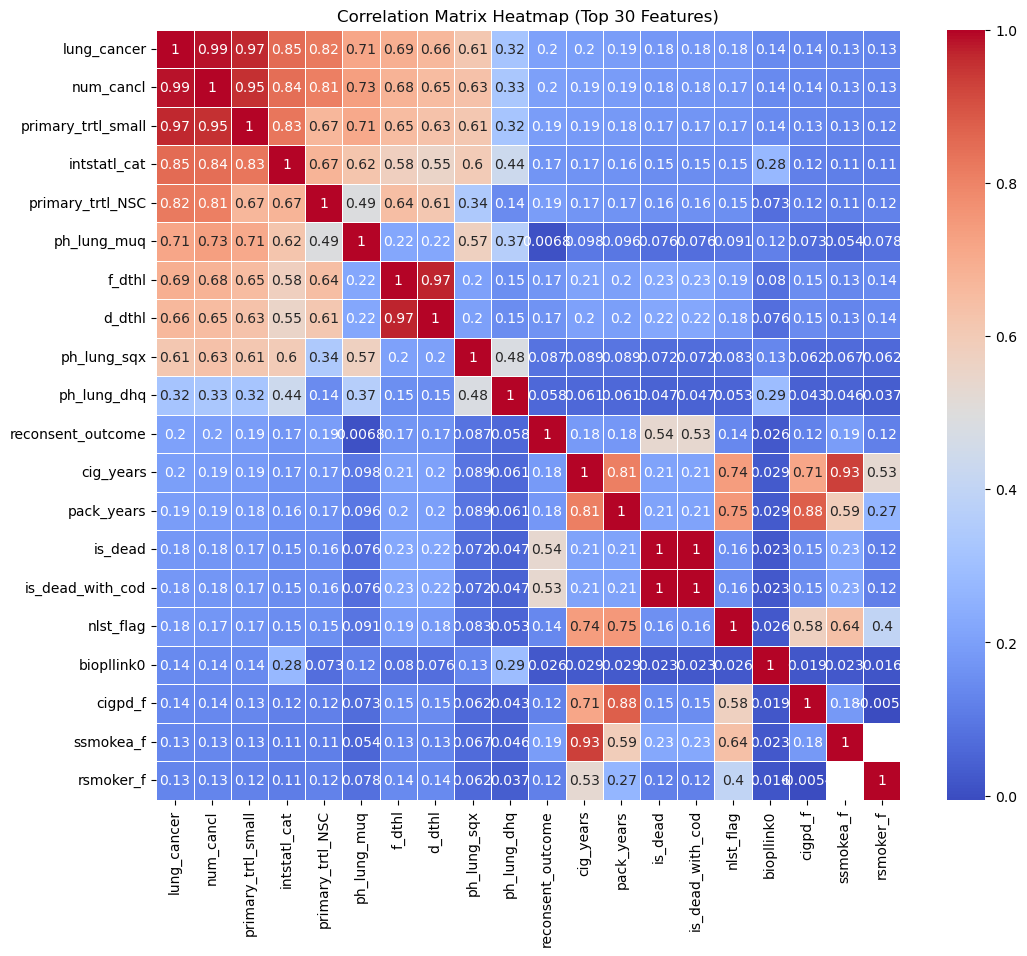

In [20]:
# Extract the top 30 correlated features
top_30_features = lung[top_30_correlations_2.index]

# Calculate the correlation matrix for the top 30 features
correlation_matrix = top_30_features.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Top 30 Features)')
plt.savefig("First corr matrix.png")
plt.show()

### *****From observation, certain variables/factors that occured after a person's final "lung_cancer" diagnosis will not be considered for the task.  Also "death" factors will not be considered

In [21]:
lung["lung_cancer"].unique()

array([0, 1], dtype=int64)

In [22]:
lung["lung_cancer"].value_counts()


0    151164
1      3723
Name: lung_cancer, dtype: int64

In [23]:
nan_columns = lung_filled.columns[lung_filled.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)


Columns with NaN values: ['lung_carcinoid_summstage']


In [24]:
median_value = lung_filled['lung_carcinoid_summstage'].median()
lung_filled['lung_carcinoid_summstage'].fillna(median_value, inplace=True)


## Preprocesed data now titled "lung_filled"

In [25]:
lung_filled

reasfolll  reassympl  reassurvl  reasothl  num_cancl  lung_cancer  \
0             0.0        1.0        0.0       0.0          0            0   
1             0.0        1.0        0.0       0.0          0            0   
2             0.0        1.0        0.0       0.0          0            0   
3             0.0        1.0        0.0       0.0          0            0   
4             0.0        1.0        0.0       0.0          0            0   
...           ...        ...        ...       ...        ...          ...   
154882        0.0        1.0        0.0       0.0          0            0   
154883        0.0        1.0        0.0       0.0          0            0   
154884        0.0        1.0        0.0       0.0          0            0   
154885        0.0        0.0        0.0       1.0          1            1   
154886        0.0        1.0        0.0       0.0          0            0   

        intstatl_cat  lung_stage  lung_stage_7e  lung_stage_t  ...  sex  age  \
0                  0       320.0          320.0         200.0  ...    1   67   
1                  0       320.0          320.0         200.0  ...    1   62   
2                  0       320.0          320.0         200.0  ...    1   62   
3                  0       320.0          320.0         200.0  ...    2   74   
4                  0       320.0          320.0         200.0  ...    2   63   
...              ...         ...            ...           ...  ...  ...  ...   
154882             0       320.0          320.0         200.0  ...    1   58   
154883             0       320.0          320.0         200.0  ...    1   62   
154884             0       320.0          320.0         200.0  ...    1   72   
154885             1       110.0          110.0         100.0  ...    2   62   
154886             0       320.0          320.0         200.0  ...    2   57   

        agelevel  dual  reconsent_outcome  reconsent_outcome_days  \
0              2     1                  2                    5336   
1              1     0                  1                    4759   
2              1     0                  1                    4658   
3              3     0                  5                    5621   
4              1     0                  1                    4106   
...          ...   ...                ...                     ...   
154882         0     0                  1                    4767   
154883         1     0                  3                    6054   
154884         3     0                 12                    2152   
154885         1     0                 12                    4524   
154886         0     0                 12                    1579   

        fstcan_exitstat  fstcan_exitage  fstcan_exitdays  in_TGWAS_population  
0                     8              80             4794                    1  
1                     8              72             3873                    1  
2                     8              74             4123                    0  
3                     8              87             4672                    1  
4                     8              72             3386                    1  
...                 ...             ...              ...                  ...  
154882                8              69             4207                    1  
154883                1              73             3994                    1  
154884                5              78             2152                    0  
154885                1              63              250                    0  
154886                5              62             1579                    0  

[154887 rows x 248 columns]

In [26]:
lung_filled['bmi_curc'].unique()

array([3., 4., 2., 1.])

### double check for nan values

In [27]:
nan_columns = lung_filled.columns[lung_filled.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['lung_carcinoid_summstage']


### upon further checks this column is not applicabe and as negligible, will be dropped

In [28]:
lung_filled.drop(columns=['lung_carcinoid_summstage'], inplace=True)

## Feature Selection

### check the feature importance using Random Forest 

In [29]:
X = lung_filled.drop(columns=['lung_cancer'])  # Features
y = lung_filled['lung_cancer']  # my Target variable

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

#cast to a df to show feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

#Sort the features in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Print  the feature importance
feature_importance_df.head(20)

Feature  Importance
33       primary_trtl_NSC    0.115713
5            intstatl_cat    0.102689
4               num_cancl    0.102128
34     primary_trtl_small    0.099843
37          lung_exitstat    0.060949
47   lung_cancer_diagdays    0.048019
27      lung_histtype_cat    0.041058
7           lung_stage_7e    0.032677
6              lung_stage    0.032261
193                f_dthl    0.024309
30        curative_chemol    0.022413
41             lung_annyr    0.021068
15       lung_clinstage_m    0.020368
31          curative_radl    0.019440
12      lung_clinstage_7e    0.018658
9            lung_stage_n    0.017434
11         lung_clinstage    0.016945
10           lung_stage_m    0.015449
197          f_cancersite    0.014612
8            lung_stage_t    0.014403

## Plot a barchart 

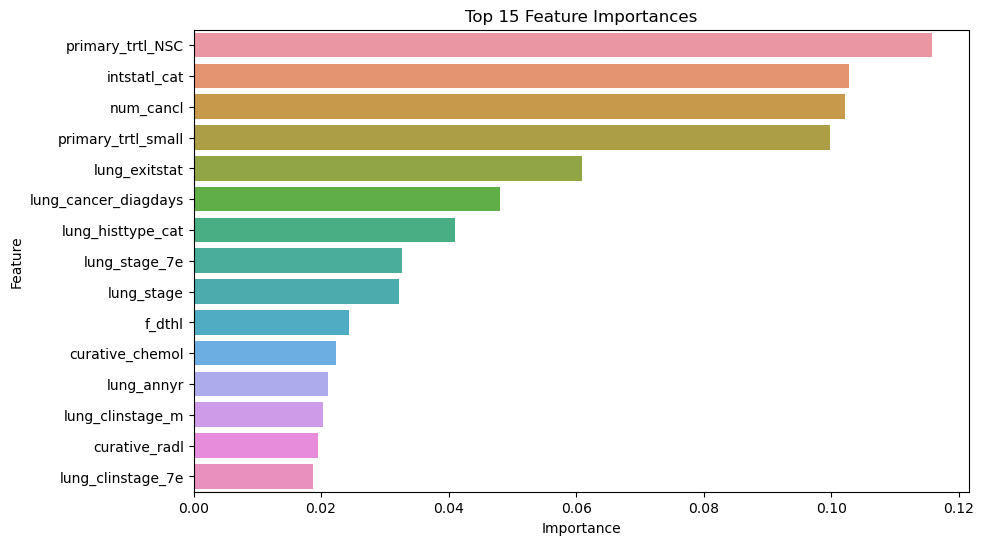

In [30]:
top_n = 15  
plt.figure(figsize=(10, 6)) #set fig size
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f"Top {top_n} Feature Importances")
plt.show()

## b) Selecting best features applying SelectKbest Method

### select the top 30 features

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=30)

### Fit the feature selector on my data and target variable


In [32]:
selector.fit(lung_filled, lung_filled.lung_cancer)

SelectKBest(k=30)

In [33]:
# Boolean mask indicating which features are selected
bool_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = lung_filled.columns[bool_mask]

# Get the scores of the selected features
selected_feature_scores = selector.scores_[bool_mask]

In [34]:
# Display the selected feature names and their corresponding scores
selected_features = pd.DataFrame({'Feature': selected_feature_names, 'F-Score': selected_feature_scores})
print(selected_features)

               Feature       F-Score
0            reasfolll  1.396453e+04
1            reassympl  7.985863e+04
2             reasothl  7.685260e+04
3            num_cancl  6.188942e+06
4          lung_cancer           inf
5         intstatl_cat  4.164229e+05
6         lung_stage_t  2.243026e+04
7         lung_stage_m  2.544015e+04
8     lung_clinstage_t  1.801134e+04
9     lung_clinstage_m  2.618963e+04
10   lung_pathstage_7e  1.407615e+04
11    lung_cancer_type  2.503592e+04
12          lung_grade  2.903773e+04
13     lung_morphology  1.622514e+04
14       lung_histtype  2.128427e+04
15       curative_wsll  6.290273e+04
16     curative_chemol  1.447245e+05
17       curative_radl  9.610346e+04
18    primary_trtl_NSC  3.244596e+05
19  primary_trtl_small  2.111218e+06
20       lung_exitstat  8.348794e+04
21   lung_cancer_first  2.120435e+04
22              d_dthl  1.218710e+05
23              f_dthl  1.413592e+05
24        d_cancersite  2.126045e+04
25        f_cancersite  2.262865e+04
2

## Data Balancing Using A combination of SMOTE for Oversampling and NearMiss for Undersampling

### The Data is not balanced. I am focused on positive lung cancer cases and will balance it to have a better list of important features

In [35]:
lung_filled["lung_cancer"].value_counts()

0    151164
1      3723
Name: lung_cancer, dtype: int64

In [42]:
features = lung_filled.drop('lung_cancer', axis=1)
target = lung_filled['lung_cancer']

# Define the pipeline for balancing
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)), 
    ('undersample', NearMiss(sampling_strategy='majority')),
])

# Fit and transform the data
balanced_lung_cancer_data, balanced_target = pipeline.fit_resample(features, target)

# Combine features and target into a new DataFrame
balanced_lung_cancer_data = pd.concat([balanced_lung_cancer_data, balanced_target], axis=1)

In [43]:
# Check the value counts of the balanced data
print(balanced_lung_cancer_data["lung_cancer"].value_counts())

0    75582
1    75582
Name: lung_cancer, dtype: int64


## c) Check feature importance again using RFC

In [44]:
X_balanced = balanced_lung_cancer_data.drop(columns=['lung_cancer'])
y_balanced = balanced_lung_cancer_data['lung_cancer']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the balanced dataset
rf_classifier.fit(X_balanced, y_balanced)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to show feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_balanced.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df.head(40)


Feature  Importance
5             intstatl_cat    0.110779
34      primary_trtl_small    0.098173
4                num_cancl    0.095401
33        primary_trtl_NSC    0.079010
37           lung_exitstat    0.073498
199           f_seer_death    0.041728
193                 f_dthl    0.040062
242        fstcan_exitstat    0.032247
195          f_codeath_cat    0.030273
30         curative_chemol    0.027996
198           d_seer_death    0.024834
197           f_cancersite    0.023245
12       lung_clinstage_7e    0.020905
6               lung_stage    0.020546
194          d_codeath_cat    0.020114
31           curative_radl    0.018235
27       lung_histtype_cat    0.016634
13        lung_clinstage_t    0.015653
47    lung_cancer_diagdays    0.014940
3                 reasothl    0.014738
196           d_cancersite    0.014319
1                reassympl    0.012864
9             lung_stage_n    0.012493
15        lung_clinstage_m    0.012301
10            lung_stage_m    0.012271
7            lung_stage_7e    0.010864
192                 d_dthl    0.010128
14        lung_clinstage_n    0.009996
23              lung_grade    0.008437
48               nlst_flag    0.008406
8             lung_stage_t    0.007101
165              rsmoker_f    0.006559
45   primary_trtl_NSC_days    0.006554
24         lung_morphology    0.006467
11          lung_clinstage    0.006216
41              lung_annyr    0.005714
172             pack_years    0.003494
26           lung_histtype    0.003358
203     mortality_exitstat    0.003217
167                cigpd_f    0.003027

### d) Applying SelectKBest method on the balanced data

In [45]:
X_balanced = balanced_lung_cancer_data.drop(columns=['lung_cancer'])
y_balanced = balanced_lung_cancer_data['lung_cancer']

In [46]:
selector = SelectKBest(f_classif, k=40)

In [47]:
selector.fit(X_balanced, y_balanced)

# boolean mask indicating which features are selected
bool_mask = selector.get_support()

# names of the selected features
selected_feature_names = X_balanced.columns[bool_mask]

# scores of the selected features 
selected_feature_scores = selector.scores_[bool_mask]

In [48]:
# Create a DataFrame to show the names and scores of the selected features
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': selected_feature_scores})

In [49]:
# Sort the selected features by score in descending order
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)

In [50]:
# Print or visualize the selected features and their scores
print(selected_features_df)

                Feature         Score
2             num_cancl  7.423692e+07
9         lung_exitstat  1.385100e+06
8    primary_trtl_small  1.068072e+06
37      fstcan_exitstat  2.610055e+05
3          intstatl_cat  2.268489e+05
19               f_dthl  2.154438e+05
18               d_dthl  1.732722e+05
7      primary_trtl_NSC  1.573205e+05
23         f_cancersite  1.391808e+05
25         f_seer_death  1.337083e+05
22         d_cancersite  1.254139e+05
24         d_seer_death  1.161596e+05
5       curative_chemol  8.967320e+04
21        f_codeath_cat  7.964702e+04
20        d_codeath_cat  7.139981e+04
27              is_dead  6.692886e+04
6         curative_radl  6.668444e+04
26     is_dead_with_cod  6.664704e+04
16            cig_years  6.549885e+04
34              rndyear  5.728251e+04
0             reassympl  5.569593e+04
28   mortality_exitstat  5.545652e+04
1              reasothl  5.486493e+04
36    reconsent_outcome  5.321275e+04
17           pack_years  4.649626e+04
30   mortali

# Classification Models on imbalanced "lung_filled" dataset

## Each distinct model is numbered and titled accordingly

## Classification without Dimensionality Reduction

In [51]:
lung_filled

reasfolll  reassympl  reassurvl  reasothl  num_cancl  lung_cancer  \
0             0.0        1.0        0.0       0.0          0            0   
1             0.0        1.0        0.0       0.0          0            0   
2             0.0        1.0        0.0       0.0          0            0   
3             0.0        1.0        0.0       0.0          0            0   
4             0.0        1.0        0.0       0.0          0            0   
...           ...        ...        ...       ...        ...          ...   
154882        0.0        1.0        0.0       0.0          0            0   
154883        0.0        1.0        0.0       0.0          0            0   
154884        0.0        1.0        0.0       0.0          0            0   
154885        0.0        0.0        0.0       1.0          1            1   
154886        0.0        1.0        0.0       0.0          0            0   

        intstatl_cat  lung_stage  lung_stage_7e  lung_stage_t  ...  sex  age  \
0                  0       320.0          320.0         200.0  ...    1   67   
1                  0       320.0          320.0         200.0  ...    1   62   
2                  0       320.0          320.0         200.0  ...    1   62   
3                  0       320.0          320.0         200.0  ...    2   74   
4                  0       320.0          320.0         200.0  ...    2   63   
...              ...         ...            ...           ...  ...  ...  ...   
154882             0       320.0          320.0         200.0  ...    1   58   
154883             0       320.0          320.0         200.0  ...    1   62   
154884             0       320.0          320.0         200.0  ...    1   72   
154885             1       110.0          110.0         100.0  ...    2   62   
154886             0       320.0          320.0         200.0  ...    2   57   

        agelevel  dual  reconsent_outcome  reconsent_outcome_days  \
0              2     1                  2                    5336   
1              1     0                  1                    4759   
2              1     0                  1                    4658   
3              3     0                  5                    5621   
4              1     0                  1                    4106   
...          ...   ...                ...                     ...   
154882         0     0                  1                    4767   
154883         1     0                  3                    6054   
154884         3     0                 12                    2152   
154885         1     0                 12                    4524   
154886         0     0                 12                    1579   

        fstcan_exitstat  fstcan_exitage  fstcan_exitdays  in_TGWAS_population  
0                     8              80             4794                    1  
1                     8              72             3873                    1  
2                     8              74             4123                    0  
3                     8              87             4672                    1  
4                     8              72             3386                    1  
...                 ...             ...              ...                  ...  
154882                8              69             4207                    1  
154883                1              73             3994                    1  
154884                5              78             2152                    0  
154885                1              63              250                    0  
154886                5              62             1579                    0  

[154887 rows x 247 columns]

## Define M and N variables that will be used to train a classification model(lung cancer) without applying Dimensionality reduction

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Train-Test Split

In [53]:
m = lung_filled.drop('lung_cancer', axis=1)  # Select all columns except 'lung_cancer' as feature variables
n = lung_filled['lung_cancer'] # The Target Variable

In [54]:
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=0) # Split the training and test data into 80:20 respectively

# 1. Create a Random Forest Classifier

In [55]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
start_time_rf = time.time() #training start time
rf_classifier.fit(m_train, n_train) #fit the classifier
end_time_rf = time.time() # training end time

# Make predictions on the testing data
n_pred_rf = rf_classifier.predict(m_test)

### Evaluate the Random Forest model

In [56]:
accuracy_rf = accuracy_score(n_test, n_pred_rf)
conf_matrix_rf = confusion_matrix(n_test, n_pred_rf)
classification_rep_rf = classification_report(n_test, n_pred_rf)

print("Random Forest Classifier Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)

Random Forest Classifier Model:
Accuracy: 1.0
Confusion Matrix:
 [[30279     0]
 [    0   699]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30279
           1       1.00      1.00      1.00       699

    accuracy                           1.00     30978
   macro avg       1.00      1.00      1.00     30978
weighted avg       1.00      1.00      1.00     30978



### Calculate the training time

In [57]:
training_time_rf = end_time_rf - start_time_rf 
print("Random Forest Training Time:", training_time_rf, "seconds")

Random Forest Training Time: 11.473381042480469 seconds


### Plot Learning curve

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Train Scores:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Validation Scores:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


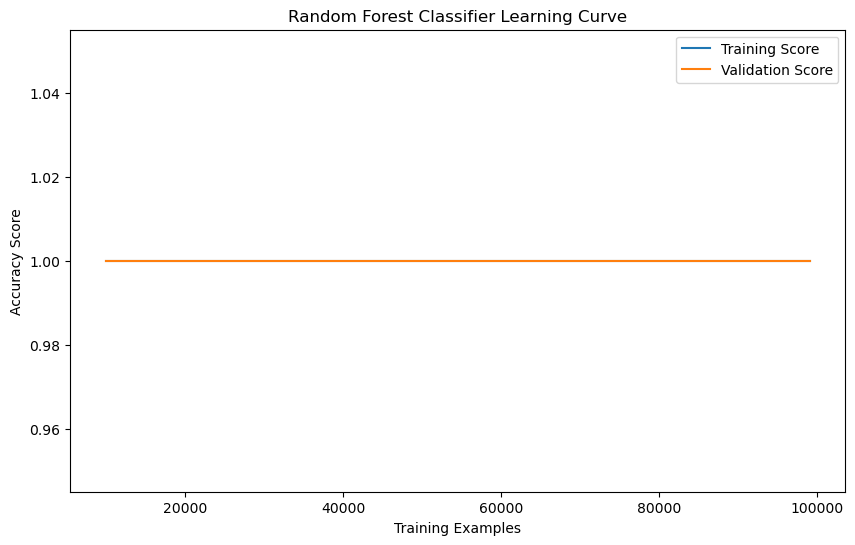

In [58]:
#Generate learning curve for classifier
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_classifier, #RF classifier
    m_train, n_train, #Training Data
    cv=5, #Cross fold Validation of 5
    n_jobs=-1, #use all avalable processors for parallel execution
    train_sizes=np.linspace(0.1, 1.0, 10), #train size from 10 to 100% of data
    verbose=1 #Display Progress Information
)

print("Train Scores:\n", train_scores_rf)
print("Validation Scores:\n", test_scores_rf)


plt.figure(figsize=(10, 6)) #Set fig size
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label="Training Score")
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Classifier Learning Curve")
plt.legend()
plt.savefig("RFC_model_no_dim_red.png")
plt.show() #Display image

# 2.Logistic Regression

In [59]:
# Create a Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=0)

# Train the model on the training data
logistic_classifier.fit(m_train, n_train)

# Make predictions on the testing data
n_pred_logistic = logistic_classifier.predict(m_test)

# Assess the performance of the model
accuracy_logistic = accuracy_score(n_test, n_pred_logistic) # Calculate accuracy
conf_matrix_logistic = confusion_matrix(n_test, n_pred_logistic) # generate the confusion matrix
classification_rep_logistic = classification_report(n_test, n_pred_logistic) #generate the classification report

print("Logistic Regression Model:")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Model:
Accuracy: 0.990122022080186
Confusion Matrix:
 [[30242    37]
 [  269   430]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     30279
           1       0.92      0.62      0.74       699

    accuracy                           0.99     30978
   macro avg       0.96      0.81      0.87     30978
weighted avg       0.99      0.99      0.99     30978



### Evaluating the computaional time

In [60]:
# Train the model and measure time
start_time = time.time() #start timer
logistic_classifier.fit(m_train, n_train) #fit classifier
end_time = time.time() #end timer

# Calculate the training time
training_time = end_time - start_time
print("Logistic Regression Training Time:", training_time, "seconds")


Logistic Regression Training Time: 4.558144807815552 seconds


### plot learning curve

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


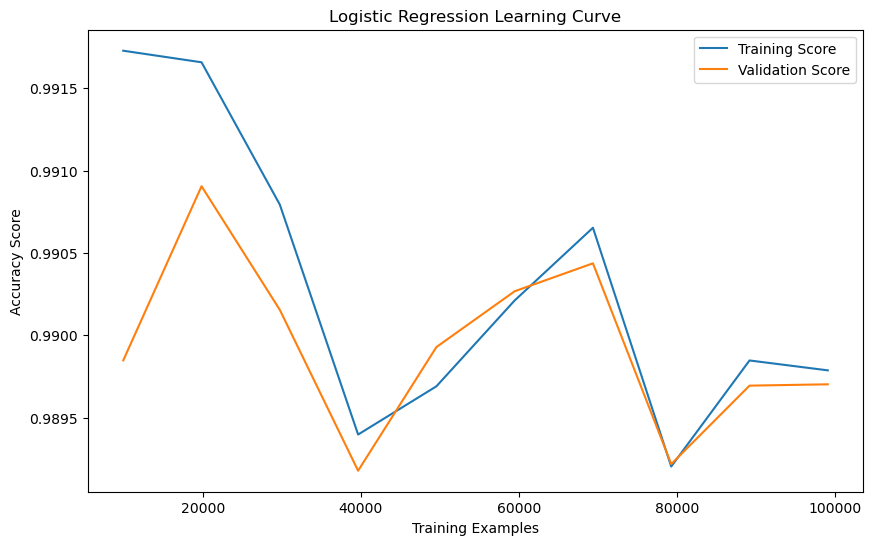

In [61]:
#Generate learning curves 
train_sizes_logistic, train_scores_logistic, test_scores_logistic = learning_curve(
    logistic_classifier, 
    m_train, n_train, #training data
    cv=5, #5-fold cross validation
    n_jobs=-1, #use all processors for execution
    train_sizes=np.linspace(0.1, 1.0, 10), #set train size 10% to 100%
    verbose=1 #Display progress information
)


# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_logistic, np.mean(train_scores_logistic, axis=1), label="Training Score")
plt.plot(train_sizes_logistic, np.mean(test_scores_logistic, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Learning Curve")
plt.legend()
plt.savefig("LR_model_no_dim_red.png")
plt.show()

# 3. Gradient Boosting

In [62]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=0)

# Train the model on the training data
start_time_gb = time.time() #start timer 
gb_classifier.fit(m_train, n_train)
end_time_gb = time.time() #end timer

# Make predictions on the testing data
n_pred_gb = gb_classifier.predict(m_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(n_test, n_pred_gb) #calculate accuracy
conf_matrix_gb = confusion_matrix(n_test, n_pred_gb)#generate confusionmatrix
classification_rep_gb = classification_report(n_test, n_pred_gb)#generate classification report

print("Gradient Boosting Classifier Model:") 
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", classification_rep_gb)

Gradient Boosting Classifier Model:
Accuracy: 1.0
Confusion Matrix:
 [[30279     0]
 [    0   699]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30279
           1       1.00      1.00      1.00       699

    accuracy                           1.00     30978
   macro avg       1.00      1.00      1.00     30978
weighted avg       1.00      1.00      1.00     30978



### Evaluate training time

In [63]:
training_time_gb = end_time_gb - start_time_gb #calculate the training time
print("Gradient Boosting Training Time:", training_time_gb, "seconds")

Gradient Boosting Training Time: 67.74334979057312 seconds


### Plot the learning curve

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.1min finished


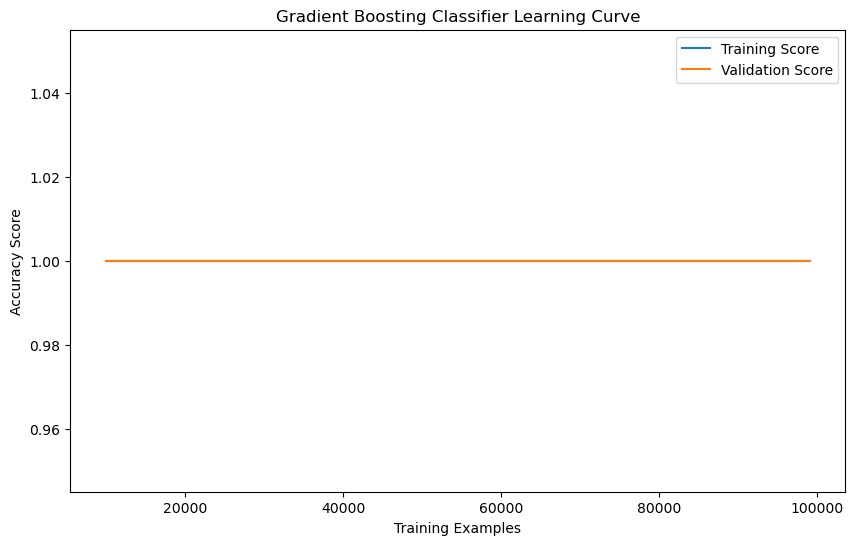

In [64]:
#Generate learning curves
train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(
    gb_classifier, 
    m_train, n_train, #Train data
    cv=5, #5 fold cross validation
    n_jobs=-1, #use all available cpus for execution
    train_sizes=np.linspace(0.1, 1.0, 10), #set train size from 10% to 100%
    verbose=1 #Display progress information
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb, np.mean(train_scores_gb, axis=1), label="Training Score")
plt.plot(train_sizes_gb, np.mean(test_scores_gb, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Gradient Boosting Classifier Learning Curve")
plt.legend()
plt.savefig("GBC_model_no_dim_red.png")
plt.show()

# 4. Support Vector Machine

In [65]:
# Create a Support Vector Machine Classifier
svm_classifier = SVC(random_state=0)

# Train the model on the training data
start_time_svm = time.time() #start timer
svm_classifier.fit(m_train, n_train) #fit classifier
end_time_svm = time.time() #end timer

# Make predictions on the testing data
n_pred_svm = svm_classifier.predict(m_test)

# Evaluate the Support Vector Machine model
accuracy_svm = accuracy_score(n_test, n_pred_svm) #evaluate accuracy
conf_matrix_svm = confusion_matrix(n_test, n_pred_svm) #generate confusion matrix
classification_rep_svm = classification_report(n_test, n_pred_svm) #generate the classification report

print("Support Vector Machine Classifier Model:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Classifier Model:
Accuracy: 0.9774355994576797
Confusion Matrix:
 [[30279     0]
 [  699     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30279
           1       0.00      0.00      0.00       699

    accuracy                           0.98     30978
   macro avg       0.49      0.50      0.49     30978
weighted avg       0.96      0.98      0.97     30978



### Calculate the computation time

In [66]:
training_time_svm = end_time_svm - start_time_svm
print("Support Vector Machine Training Time:", training_time_svm, "seconds")

Support Vector Machine Training Time: 1475.9558804035187 seconds


### Plot the learning curve

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 56.2min finished


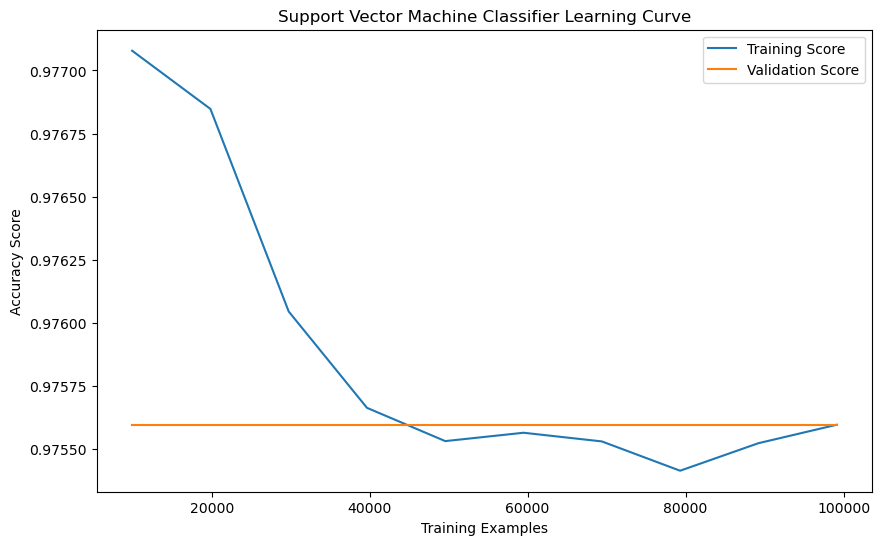

In [67]:
# Generate the learning curves 
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    svm_classifier, 
    m_train, n_train, # Training Data
    cv=5, #set 5 fold cross validation
    n_jobs=-1, #use all processors for parallel execution
    train_sizes=np.linspace(0.1, 1.0, 10), #varying training sizes from 10-100%
    verbose=1 # display progress information
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label="Training Score") #plot training scores
plt.plot(train_sizes_svm, np.mean(test_scores_svm, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Support Vector Machine Classifier Learning Curve")
plt.legend()
plt.savefig("SVM_model_no_dim_red.png")
plt.show()


# Applying Dimensionality Reduction to Original(Imbalanced Data)

## Feature Selection Strategy

In order to address bias and improve the model's ability to generalize, I am employing the relevant variables selected from the feature selection strategies ealier. Upon careful examination of the three techniques previously applied, it became evident that the top important features include information related to patients already confirmed to have lung cancer or those who did not survive. As these features are not directly relevant to our prediction or classification task, I have selected a set of features that are more aligned with the goal of predicting lung cancer by ignoring 

## Redefining m and n variables

To mitigate the impact of irrelevant features, a meticulous process was undertaken to select variables that are directly pertinent to the prediction task. The selected variables aim to provide a more focused and accurate representation of factors influencing the prediction of lung cancer.

Now, let's proceed with applying these curated features in combination with dimensionality reduction techniques to refine our models. after feature selection was carried out

In [68]:
relevant_features = [
    'cig_years', "pack_years", "cigpd_f", "rsmoker_f", "xry_result2", "xry_result3",
    "fh_cancer", "lung_fh", "diabetes_f", "hearta_f", "hyperten_f", "liver_comorbidity",
    "ph_any_sqx", "biopllink3", "polyps_f", "nlst_flag", "curative_wsll", "curative_chemol", "curative_radl"
]

In [69]:
m = lung_filled[relevant_features]
n = lung_filled['lung_cancer']

## Split the data into training and testing sets

In [70]:
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=0)

# PCA

In [71]:
from sklearn.decomposition import PCA

In [72]:
n_components = 8  # set number of components to 8
pca = PCA(n_components=n_components)

# Fit and transform the training data
m_train_pca = pca.fit_transform(m_train)

# Transform the testing data
m_test_pca = pca.transform(m_test)


# 5. Random Forest Classifier (RFC) on PCA-reduced data

In [73]:
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the reduced data
rf_classifier_pca.fit(m_train_pca, n_train)

# Make predictions on the testing data
n_pred_rf_pca = rf_classifier_pca.predict(m_test_pca)

# Evaluate the RFC model on PCA-reduced data
accuracy_rf_pca = accuracy_score(n_test, n_pred_rf_pca) #Generate Accuracy
conf_matrix_rf_pca = confusion_matrix(n_test, n_pred_rf_pca) #Generate confusion matrix
classification_rep_rf_pca = classification_report(n_test, n_pred_rf_pca) #Generate the classification report

print("Random Forest Classifier on PCA-reduced Data:")
print("Accuracy:", accuracy_rf_pca)
print("Confusion Matrix:\n", conf_matrix_rf_pca)
print("Classification Report:\n", classification_rep_rf_pca)

Random Forest Classifier on PCA-reduced Data:
Accuracy: 0.9782749047711279
Confusion Matrix:
 [[30208    71]
 [  602    97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30279
           1       0.58      0.14      0.22       699

    accuracy                           0.98     30978
   macro avg       0.78      0.57      0.61     30978
weighted avg       0.97      0.98      0.97     30978



### Measure the training time

In [74]:
start_time_rf_pca = time.time() #start the timer
rf_classifier_pca.fit(m_train_pca, n_train) #fit classifier
end_time_rf_pca = time.time() #end timer
training_time_rf_pca = end_time_rf_pca - start_time_rf_pca #claculate training time
print("RFC Training Time on PCA-reduced Data:", training_time_rf_pca, "seconds")

RFC Training Time on PCA-reduced Data: 16.471226930618286 seconds


### Plotting the learning curve for RFC on PCA-reduced data

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


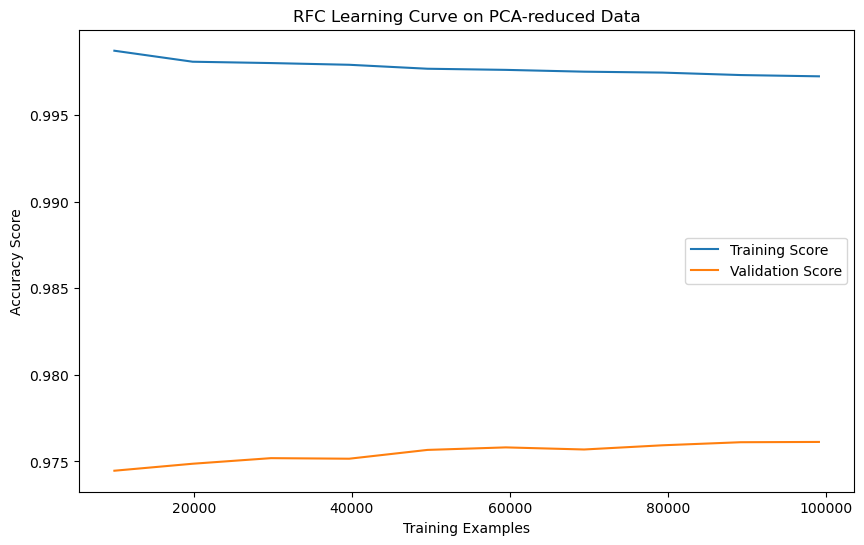

In [75]:
train_sizes_rf_pca, train_scores_rf_pca, test_scores_rf_pca = learning_curve(
    rf_classifier_pca, 
    m_train_pca, n_train, #train data
    cv=5, #5 fold cross validation
    n_jobs=-1, #use all available processors
    train_sizes=np.linspace(0.1, 1.0, 10), #varying trainsizes 10-100%
    verbose=1 #generate progress information
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf_pca, np.mean(train_scores_rf_pca, axis=1), label="Training Score") #plot training scores
plt.plot(train_sizes_rf_pca, np.mean(test_scores_rf_pca, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("RFC Learning Curve on PCA-reduced Data")
plt.legend()
plt.savefig("RFC Learning Curve on PCA-reduced Data.png")
plt.show()

# 6. Logistic Regression (LR) on PCA-reduced data

In [76]:
logistic_classifier_pca = LogisticRegression(random_state=0)

# Train the model on the reduced data
logistic_classifier_pca.fit(m_train_pca, n_train)

# Make predictions on the testing data
n_pred_lr_pca = logistic_classifier_pca.predict(m_test_pca)

# Evaluate the LR model on PCA-reduced data
accuracy_lr_pca = accuracy_score(n_test, n_pred_lr_pca) #evaluate accuracy
conf_matrix_lr_pca = confusion_matrix(n_test, n_pred_lr_pca) #generate confusion matrix
classification_rep_lr_pca = classification_report(n_test, n_pred_lr_pca) #generate classification report

print("Logistic Regression on PCA-reduced Data:")
print("Accuracy:", accuracy_lr_pca)
print("Confusion Matrix:\n", conf_matrix_lr_pca)
print("Classification Report:\n", classification_rep_lr_pca)

Logistic Regression on PCA-reduced Data:
Accuracy: 0.9774355994576797
Confusion Matrix:
 [[30279     0]
 [  699     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30279
           1       0.00      0.00      0.00       699

    accuracy                           0.98     30978
   macro avg       0.49      0.50      0.49     30978
weighted avg       0.96      0.98      0.97     30978



### Measure the training time

In [77]:
start_time_lr_pca = time.time() #start timer
logistic_classifier_pca.fit(m_train_pca, n_train) #fit classifier
end_time_lr_pca = time.time() #end timer
training_time_lr_pca = end_time_lr_pca - start_time_lr_pca
print("LR Training Time on PCA-reduced Data:", training_time_lr_pca, "seconds")

LR Training Time on PCA-reduced Data: 0.6469871997833252 seconds


### Plotting the learning curve for LR on PCA-reduced data

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished


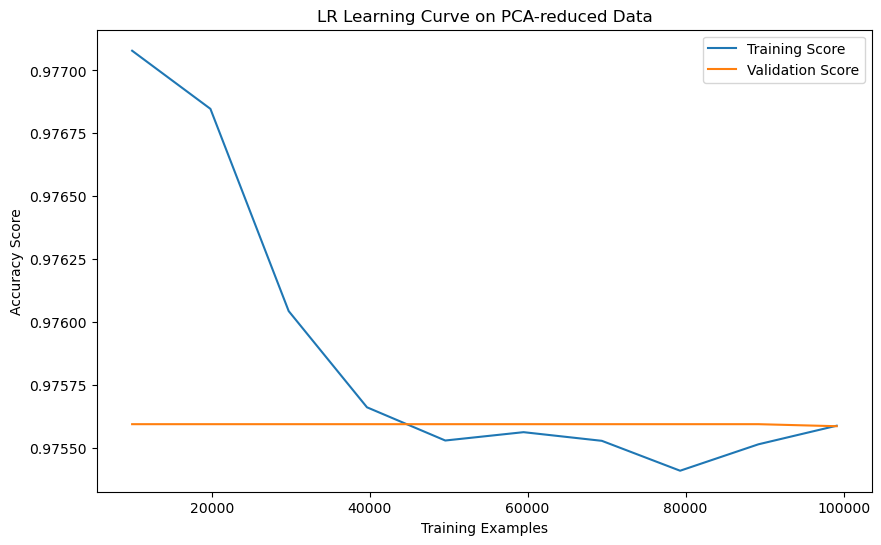

In [78]:
#Generating training and validation scores with learning curves function
train_sizes_lr_pca, train_scores_lr_pca, test_scores_lr_pca = learning_curve(
    logistic_classifier_pca, #classifier
    m_train_pca, n_train, #train data
    cv=5, #5 fold cross validation
    n_jobs=-1, #use all available processors for parallel execution
    train_sizes=np.linspace(0.1, 1.0, 10), #set varying training sizes from 10-100%
    verbose=1 #show the progress information
)

plt.figure(figsize=(10, 6)) #set fig size
plt.plot(train_sizes_lr_pca, np.mean(train_scores_lr_pca, axis=1), label="Training Score") #plot train scores
plt.plot(train_sizes_lr_pca, np.mean(test_scores_lr_pca, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("LR Learning Curve on PCA-reduced Data")
plt.legend()
plt.savefig("LR Learning Curve on PCA-reduced Data.png")
plt.show()

### Plot ROC curve for logistic regression on PCA-reduced data

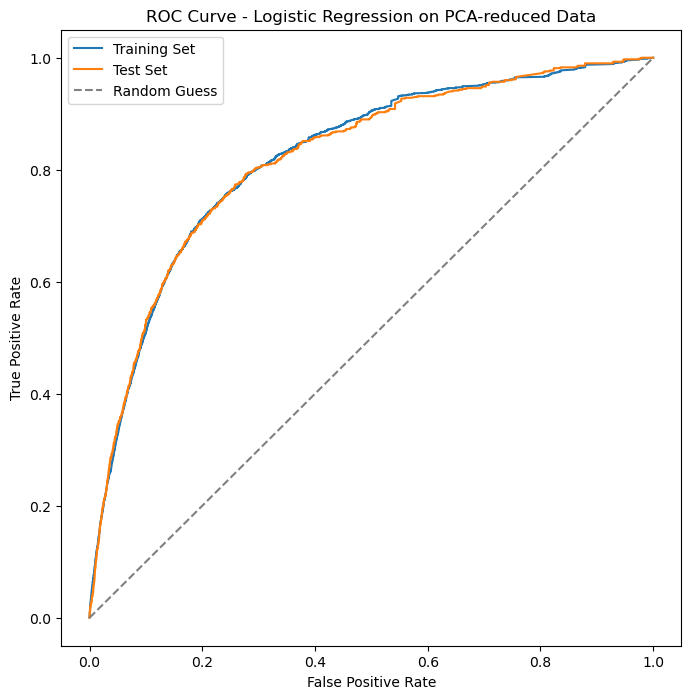

In [79]:
# Predict probabilities using the transformed data
y_train_lr_pca = logistic_classifier_pca.predict_proba(m_train_pca)[:, 1]
y_test_lr_pca = logistic_classifier_pca.predict_proba(m_test_pca)[:, 1]

# Calculate ROC curve for training set
fpr_train_lr_pca, tpr_train_lr_pca, thresholds_train_lr_pca = roc_curve(n_train, y_train_lr_pca)

# Calculate ROC curve for test set
fpr_test_lr_pca, tpr_test_lr_pca, thresholds_test_lr_pca = roc_curve(n_test, y_test_lr_pca)


plt.figure(figsize=(8, 8))
plt.plot(fpr_train_lr_pca, tpr_train_lr_pca, label='Training Set')
plt.plot(fpr_test_lr_pca, tpr_test_lr_pca, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression on PCA-reduced Data')
plt.legend()
plt.savefig("ROC_LR_PCA-reduced.png")
plt.show()

# 7. Gradient Boosting Classifier on PCA reduced data

In [80]:
gb_classifier_pca = GradientBoostingClassifier(random_state=0)

# Train the model on the reduced data
gb_classifier_pca.fit(m_train_pca, n_train)

# Make predictions on the testing data
n_pred_gb_pca = gb_classifier_pca.predict(m_test_pca)

# Evaluate the GB model on PCA-reduced data
accuracy_gb_pca = accuracy_score(n_test, n_pred_gb_pca) #generate accuracy
conf_matrix_gb_pca = confusion_matrix(n_test, n_pred_gb_pca) #generate confusion matrix
classification_rep_gb_pca = classification_report(n_test, n_pred_gb_pca) #generate classification report

print("Gradient Boosting on PCA-reduced Data:")
print("Accuracy:", accuracy_gb_pca)
print("Confusion Matrix:\n", conf_matrix_gb_pca)
print("Classification Report:\n", classification_rep_gb_pca)

Gradient Boosting on PCA-reduced Data:
Accuracy: 0.9780812189295629
Confusion Matrix:
 [[30255    24]
 [  655    44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30279
           1       0.65      0.06      0.11       699

    accuracy                           0.98     30978
   macro avg       0.81      0.53      0.55     30978
weighted avg       0.97      0.98      0.97     30978



### Training time measurement for Gradient Boosting

In [81]:
start_time_gb_pca = time.time() #start timer
gb_classifier_pca.fit(m_train_pca, n_train) #fit classifier 
end_time_gb_pca = time.time() #end timer
training_time_gb_pca = end_time_gb_pca - start_time_gb_pca #calculate training time
print("GB Training Time on PCA-reduced Data:", training_time_gb_pca, "seconds")

GB Training Time on PCA-reduced Data: 20.98498272895813 seconds


### Learning Curve for Gradient Boosting

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


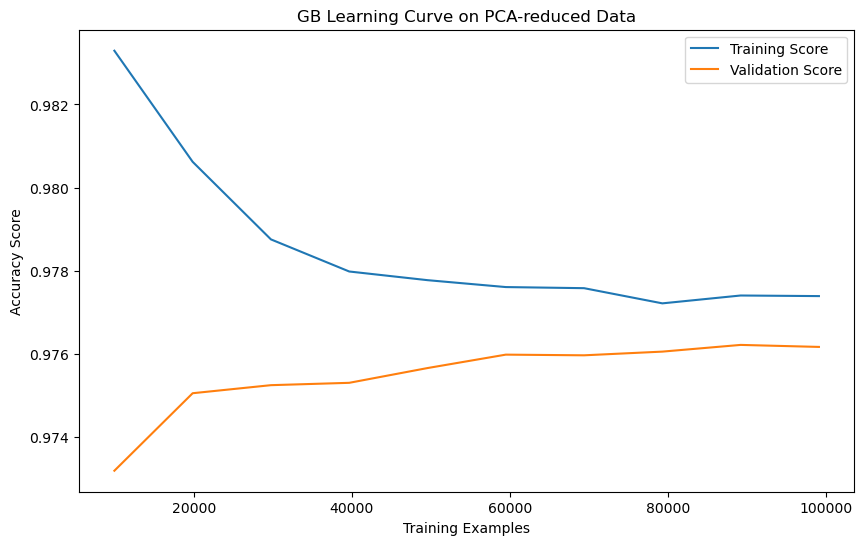

In [82]:
#learning curve function to generate train and validation scores
train_sizes_gb_pca, train_scores_gb_pca, test_scores_gb_pca = learning_curve( 
    gb_classifier_pca, #gb classifier with pca reduced data
    m_train_pca, n_train, #training data
    cv=5, #use 5-fold cross validation
    n_jobs=-1, #use all processors for execution
    train_sizes=np.linspace(0.1, 1.0, 10), #set varying sizes from 10-100%
    verbose=1 #display progress information
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb_pca, np.mean(train_scores_gb_pca, axis=1), label="Training Score") #plot train scores
plt.plot(train_sizes_gb_pca, np.mean(test_scores_gb_pca, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("GB Learning Curve on PCA-reduced Data")
plt.legend()
plt.savefig("GB Learning Curve on PCA-reduced Data.png")
plt.show()

### Plot ROC curve for Gradient Boosting on PCA-reduced data

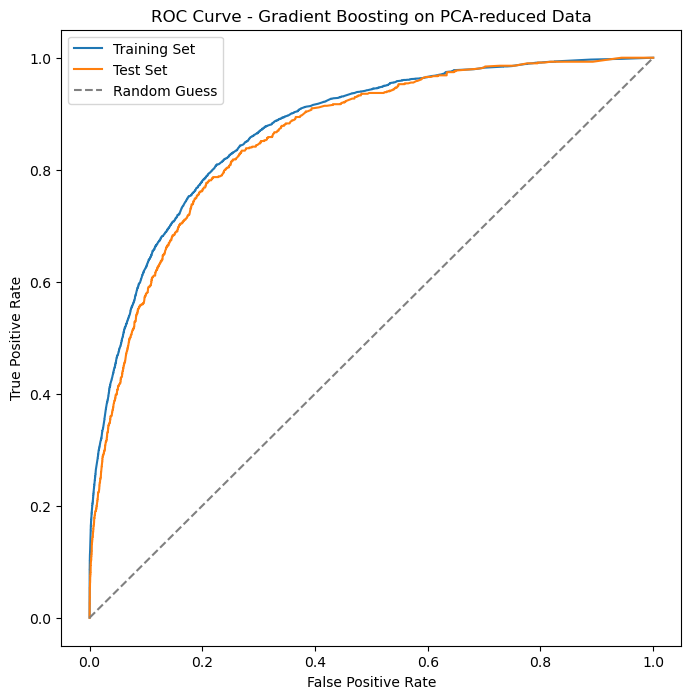

In [83]:
# Predict probabilities using the transformed data
y_train_gb_pca = gb_classifier_pca.predict_proba(m_train_pca)[:, 1]
y_test_gb_pca = gb_classifier_pca.predict_proba(m_test_pca)[:, 1]

# Calculate ROC curve for training set
fpr_train_gb_pca, tpr_train_gb_pca, thresholds_train_gb_pca = roc_curve(n_train, y_train_gb_pca)

# Calculate ROC curve for test set
fpr_test_gb_pca, tpr_test_gb_pca, thresholds_test_gb_pca = roc_curve(n_test, y_test_gb_pca)

plt.figure(figsize=(8, 8))
plt.plot(fpr_train_gb_pca, tpr_train_gb_pca, label='Training Set')
plt.plot(fpr_test_gb_pca, tpr_test_gb_pca, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting on PCA-reduced Data')
plt.legend()
plt.savefig("ROC_GB_PCA-reduced.png")
plt.show()

# 8. Support Vector Machine (SVM) on PCA reduced data

In [84]:
# Create a Support Vector Machine Classifier
svm_classifier_pca = SVC(random_state=0)

# Train the model on the reduced data
svm_classifier_pca.fit(m_train_pca, n_train)

# Make predictions on the testing data
n_pred_svm_pca = svm_classifier_pca.predict(m_test_pca)

# Evaluate the SVM model on PCA-reduced data
accuracy_svm_pca = accuracy_score(n_test, n_pred_svm_pca) #generate accuracy
conf_matrix_svm_pca = confusion_matrix(n_test, n_pred_svm_pca)#generate confusion matrix
classification_rep_svm_pca = classification_report(n_test, n_pred_svm_pca) #generate classification report

print("Support Vector Machine on PCA-reduced Data:")
print("Accuracy:", accuracy_svm_pca)
print("Confusion Matrix:\n", conf_matrix_svm_pca)
print("Classification Report:\n", classification_rep_svm_pca)

Support Vector Machine on PCA-reduced Data:
Accuracy: 0.9774355994576797
Confusion Matrix:
 [[30279     0]
 [  699     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30279
           1       0.00      0.00      0.00       699

    accuracy                           0.98     30978
   macro avg       0.49      0.50      0.49     30978
weighted avg       0.96      0.98      0.97     30978



### Training time measurement for Support Vector Machine

In [85]:
start_time_svm_pca = time.time() #start timer
svm_classifier_pca.fit(m_train_pca, n_train) #fit classifier
end_time_svm_pca = time.time() #end timer
training_time_svm_pca = end_time_svm_pca - start_time_svm_pca #calculate training time
print("SVM Training Time on PCA-reduced Data:", training_time_svm_pca, "seconds")

SVM Training Time on PCA-reduced Data: 59.77291774749756 seconds


### Plot learning Curve

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.1min finished


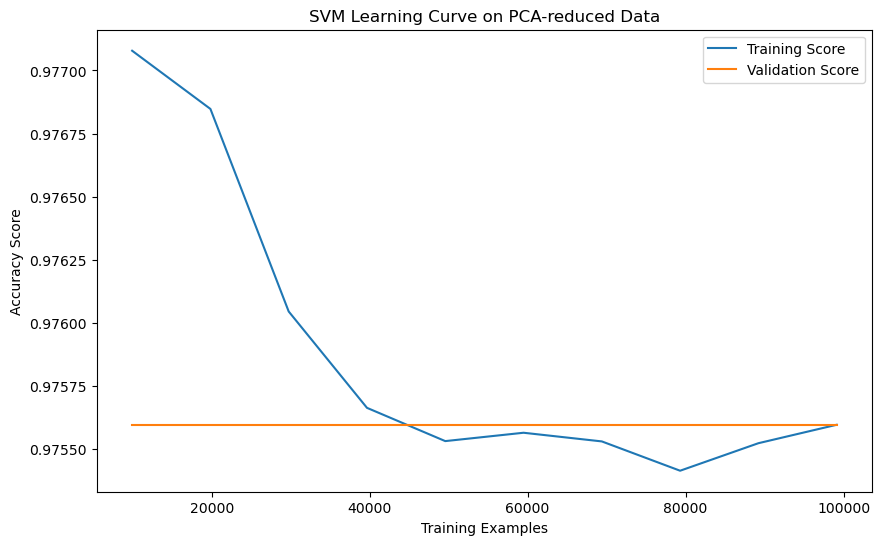

In [86]:
#Generating training and validation scores using learning curve function 
train_sizes_svm_pca, train_scores_svm_pca, test_scores_svm_pca = learning_curve(
    svm_classifier_pca, #Calssifier
    m_train_pca, n_train, #train data
    cv=5, n_jobs=-1, #5-fold cross validation, #use all processors
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes
    verbose=1 #display progress information
)

plt.figure(figsize=(10, 6)) #set figure size
plt.plot(train_sizes_svm_pca, np.mean(train_scores_svm_pca, axis=1), label="Training Score") #plot training scores
plt.plot(train_sizes_svm_pca, np.mean(test_scores_svm_pca, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("SVM Learning Curve on PCA-reduced Data")
plt.legend()
plt.savefig("SVM Learning Curve on PCA-reduced Data.png")
plt.show()

### Plot ROC curve for Support Vector Machine on PCA-reduced data

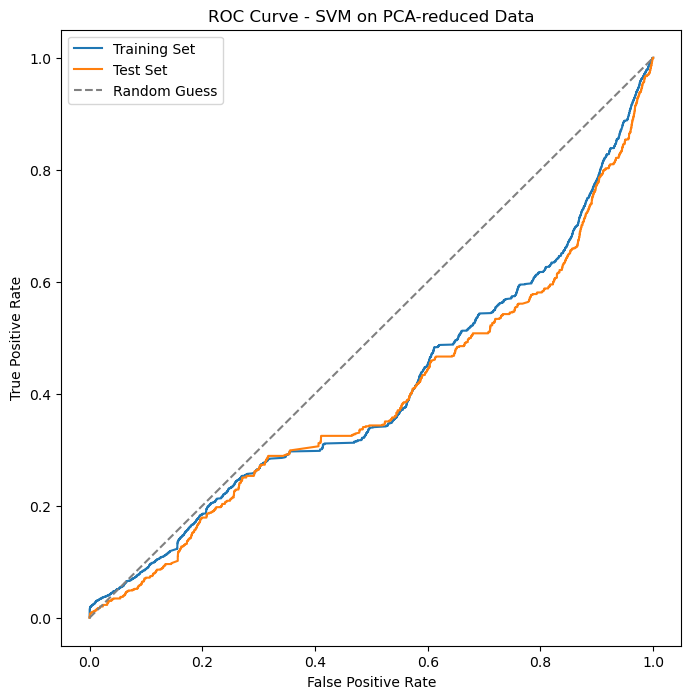

In [87]:
# SVM does not have a predict_proba method, so I used decision_function to get decision values
y_train_svm_pca = svm_classifier_pca.decision_function(m_train_pca)
y_test_svm_pca = svm_classifier_pca.decision_function(m_test_pca)

# Calculate ROC curve for training set
fpr_train_svm_pca, tpr_train_svm_pca, thresholds_train_svm_pca = roc_curve(n_train, y_train_svm_pca)

# Calculate ROC curve for test set
fpr_test_svm_pca, tpr_test_svm_pca, thresholds_test_svm_pca = roc_curve(n_test, y_test_svm_pca)

plt.figure(figsize=(8, 8))
plt.plot(fpr_train_svm_pca, tpr_train_svm_pca, label='Training Set')
plt.plot(fpr_test_svm_pca, tpr_test_svm_pca, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM on PCA-reduced Data')
plt.legend()
plt.savefig("ROC_SVM_PCA-reduced.png")
plt.show()

# Linear Discriminant Analysis (LDA)

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #import LDA

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1) #set ncomponents to 1
m_train_lda = lda.fit_transform(m_train, n_train) #fit and transform train data
m_test_lda = lda.transform(m_test) #transform test data

# 9. Linear Discriminant Analysis (LDA) for Random Forest Classifier (RFC)

In [89]:
# Creating a Random Forest classifier with 100 estimators and a fixed random state, and training it on LDA-reduced data
rf_classifier_lda = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier_lda.fit(m_train_lda, n_train)

n_pred_rf_lda = rf_classifier_lda.predict(m_test_lda) # make predictions on test data using trained model

accuracy_rf_lda = accuracy_score(n_test, n_pred_rf_lda) #evaluate accuray
conf_matrix_rf_lda = confusion_matrix(n_test, n_pred_rf_lda)#generate confusion matrix
classification_rep_rf_lda = classification_report(n_test, n_pred_rf_lda) #generate classification report

print("Random Forest Classifier Model with LDA:")
print("Accuracy:", accuracy_rf_lda)
print("Confusion Matrix:\n", conf_matrix_rf_lda)
print("Classification Report:\n", classification_rep_rf_lda)

Random Forest Classifier Model with LDA:
Accuracy: 0.9929950287300665
Confusion Matrix:
 [[30215    64]
 [  153   546]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     30279
           1       0.90      0.78      0.83       699

    accuracy                           0.99     30978
   macro avg       0.95      0.89      0.92     30978
weighted avg       0.99      0.99      0.99     30978



### RFC Training Time Measurement on LDA-reduced Data

In [90]:
start_time_rf_lda = time.time() #start timer
rf_classifier_lda.fit(m_train_lda, n_train) # fit classifier
end_time_rf_lda = time.time() #end timer
training_time_rf_lda = end_time_rf_lda - start_time_rf_lda #calculate training time
print("Random Forest Classifier Training Time with LDA:", training_time_rf_lda, "seconds")

Random Forest Classifier Training Time with LDA: 13.610166311264038 seconds


### RFC Learning Curve on LDA-reduced Data

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


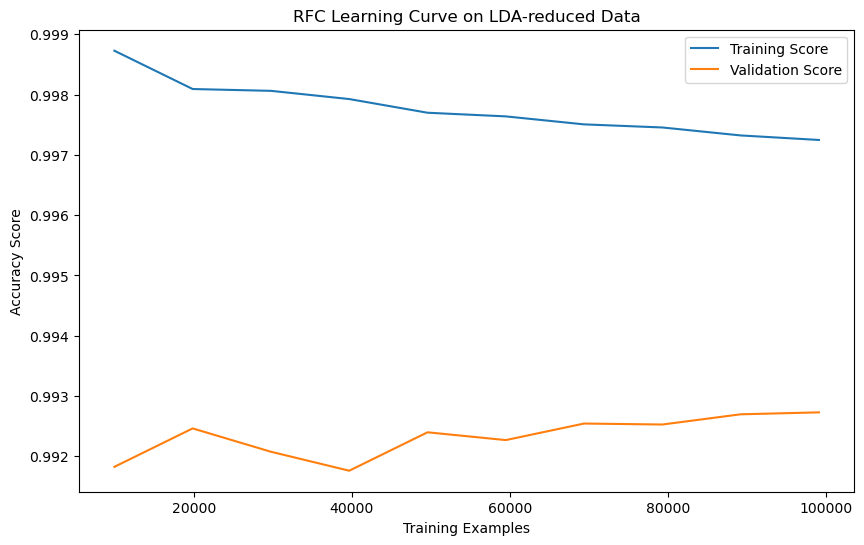

In [91]:
#Generating training and validation scores using learning curve function
train_sizes_rf_lda, train_scores_rf_lda, test_scores_rf_lda = learning_curve(
    rf_classifier_lda, 
    m_train_lda, n_train, #train data
    cv=5, # 5 fold cross validation
    n_jobs=-1, #use all processors for parallel execution
    train_sizes=np.linspace(0.1, 1.0, 10), #set varying train sizes from 10-100%
    verbose=1 #display progress information
)

# Plot RFC Learning Curve on LDA-reduced Data
plt.figure(figsize=(10, 6)) #set figure size
plt.plot(train_sizes_rf_lda, np.mean(train_scores_rf_lda, axis=1), label="Training Score") #plot train scores
plt.plot(train_sizes_rf_lda, np.mean(test_scores_rf_lda, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("RFC Learning Curve on LDA-reduced Data")
plt.legend()
plt.savefig("RFC Learning Curve on LDA-reduced Data.png")
plt.show()

# 10. Linear Discriminant Analysis (LDA) for Logistic Regression (LR)

In [92]:
# Creating a Logistic Regression classifier and training it on LDA-reduced data
lr_classifier_lda = LogisticRegression(random_state=0)
lr_classifier_lda.fit(m_train_lda, n_train)


n_pred_lr_lda = lr_classifier_lda.predict(m_test_lda) #make predictions on test data using the trained model 

accuracy_lr_lda = accuracy_score(n_test, n_pred_lr_lda) #generate accuracy
conf_matrix_lr_lda = confusion_matrix(n_test, n_pred_lr_lda) #generate confusion matrix
classification_rep_lr_lda = classification_report(n_test, n_pred_lr_lda) #generate classification report

print("Logistic Regression Model with LDA:")
print("Accuracy:", accuracy_lr_lda)
print("Confusion Matrix:\n", conf_matrix_lr_lda)
print("Classification Report:\n", classification_rep_lr_lda)


Logistic Regression Model with LDA:
Accuracy: 0.9948673251985279
Confusion Matrix:
 [[30275     4]
 [  155   544]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     30279
           1       0.99      0.78      0.87       699

    accuracy                           0.99     30978
   macro avg       0.99      0.89      0.93     30978
weighted avg       0.99      0.99      0.99     30978



### LR Training Time Measurement on LDA-reduced Data

In [93]:
start_time_lr_lda = time.time() #start timer
lr_classifier_lda.fit(m_train_lda, n_train) #fit classifier
end_time_lr_lda = time.time() #end timer
training_time_lr_lda = end_time_lr_lda - start_time_lr_lda #calculate training time
print("Logistic Regression Training Time with LDA:", training_time_lr_lda, "seconds")


Logistic Regression Training Time with LDA: 0.12473773956298828 seconds


### LR Learning Curve on LDA-reduced Data

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


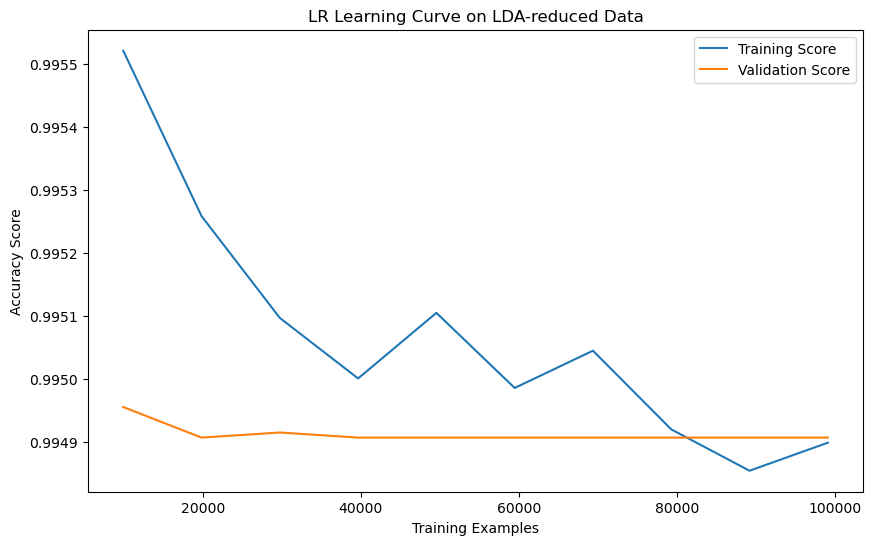

In [94]:
train_sizes_lr_lda, train_scores_lr_lda, test_scores_lr_lda = learning_curve(
    lr_classifier_lda, 
    m_train_lda, n_train, #train data
    cv=5, #5 fold cross validation
    n_jobs=-1, #use all processors for execution
    train_sizes=np.linspace(0.1, 1.0, 10), #set varying train sizes 10-100%
    verbose=1 #display progress information
)

# Plot LR Learning Curve on LDA-reduced Data
plt.figure(figsize=(10, 6)) #set figure size
plt.plot(train_sizes_lr_lda, np.mean(train_scores_lr_lda, axis=1), label="Training Score") #plot training scores
plt.plot(train_sizes_lr_lda, np.mean(test_scores_lr_lda, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("LR Learning Curve on LDA-reduced Data")
plt.legend()
plt.savefig("LR Learning Curve on LDA-reduced Data.png")
plt.show()

# 11. Gradient Boosting (GB) model on the Linear Discriminant Analysis (LDA)-reduced data

In [95]:
# Training the Gradient Boosting Classifier on LDA-reduced Data
gb_classifier_lda = GradientBoostingClassifier(random_state=0)
gb_classifier_lda.fit(m_train_lda, n_train)

# Make predictions on the testing data
n_pred_gb_lda = gb_classifier_lda.predict(lda.transform(m_test))

# Evaluate the Gradient Boosting model on LDA-reduced data
accuracy_gb_lda = accuracy_score(n_test, n_pred_gb_lda)
conf_matrix_gb_lda = confusion_matrix(n_test, n_pred_gb_lda)
classification_rep_gb_lda = classification_report(n_test, n_pred_gb_lda)

print("Gradient Boosting Model on LDA-reduced Data:")
print("Accuracy:", accuracy_gb_lda)
print("Confusion Matrix:\n", conf_matrix_gb_lda)
print("Classification Report:\n", classification_rep_gb_lda)

Gradient Boosting Model on LDA-reduced Data:
Accuracy: 0.9947059203305572
Confusion Matrix:
 [[30269    10]
 [  154   545]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     30279
           1       0.98      0.78      0.87       699

    accuracy                           0.99     30978
   macro avg       0.99      0.89      0.93     30978
weighted avg       0.99      0.99      0.99     30978



### Training time measurement for Gradient Boosting on LDA-reduced Data

In [96]:
start_time_gb_lda = time.time() #start timer
gb_classifier_lda.fit(m_train_lda, n_train) #fit classifier
end_time_gb_lda = time.time() #end timer
training_time_gb_lda = end_time_gb_lda - start_time_gb_lda #calculate training time
print("Gradient Boosting Training Time on LDA-reduced Data:", training_time_gb_lda, "seconds")

Gradient Boosting Training Time on LDA-reduced Data: 6.133950710296631 seconds


### The learning curve for Gradient Boosting on LDA-reduced Data

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.7s finished


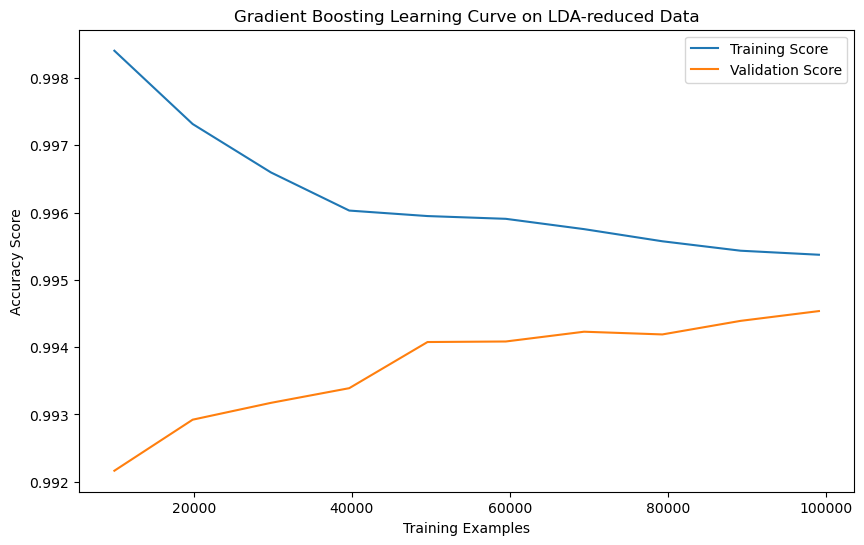

In [97]:
#Generating training and validation scores using learning curve function
train_sizes_gb_lda, train_scores_gb_lda, test_scores_gb_lda = learning_curve(
    gb_classifier_lda, 
    m_train_lda, n_train, #train data
    cv=5, #5-fold cross-validation
    n_jobs=-1, #use all processors for parallel computaion
    train_sizes=np.linspace(0.1, 1.0, 10), #set varying sizes
    verbose=1 #print progress updates
)

plt.figure(figsize=(10, 6)) #create figure and set size
plt.plot(train_sizes_gb_lda, np.mean(train_scores_gb_lda, axis=1), label="Training Score") #plot the training score
plt.plot(train_sizes_gb_lda, np.mean(test_scores_gb_lda, axis=1), label="Validation Score") #plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Gradient Boosting Learning Curve on LDA-reduced Data")
plt.legend()
plt.savefig("Gradient Boosting Learning Curve on LDA-reduced Data.png")
plt.show()

# 12. Support Vector Machine (SVM) model on the Linear Discriminant Analysis (LDA)-reduced data

In [98]:
# Creating a Support Vector Machine (SVM) classifier and training it on LDA-reduced data
svm_classifier_lda = SVC(random_state=0)
svm_classifier_lda.fit(m_train_lda, n_train)

# Make predictions on the testing data
n_pred_svm_lda = svm_classifier_lda.predict(lda.transform(m_test))

# Evaluate the SVM model on LDA-reduced data
accuracy_svm_lda = accuracy_score(n_test, n_pred_svm_lda) #evaluate accuracy score
conf_matrix_svm_lda = confusion_matrix(n_test, n_pred_svm_lda) #generate confusion matrix
classification_rep_svm_lda = classification_report(n_test, n_pred_svm_lda) #generate classification report

print("Support Vector Machine Model on LDA-reduced Data:")
print("Accuracy:", accuracy_svm_lda)
print("Confusion Matrix:\n", conf_matrix_svm_lda)
print("Classification Report:\n", classification_rep_svm_lda)

Support Vector Machine Model on LDA-reduced Data:
Accuracy: 0.9949964490929046
Confusion Matrix:
 [[30279     0]
 [  155   544]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     30279
           1       1.00      0.78      0.88       699

    accuracy                           0.99     30978
   macro avg       1.00      0.89      0.94     30978
weighted avg       1.00      0.99      0.99     30978



### Training time measurement for SVM on LDA-reduced Data

In [99]:
start_time_svm_lda = time.time() #start timer
svm_classifier_lda.fit(m_train_lda, n_train) #fit the classifier
end_time_svm_lda = time.time() #end timer
training_time_svm_lda = end_time_svm_lda - start_time_svm_lda #calculate the training time
print("Support Vector Machine Training Time on LDA-reduced Data:", training_time_svm_lda, "seconds")

Support Vector Machine Training Time on LDA-reduced Data: 12.14994478225708 seconds


### Learning Curve for SVM on LDA-reduced Data

[learning_curve] Training set sizes: [ 9912 19825 29738 39650 49563 59476 69388 79301 89214 99127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished


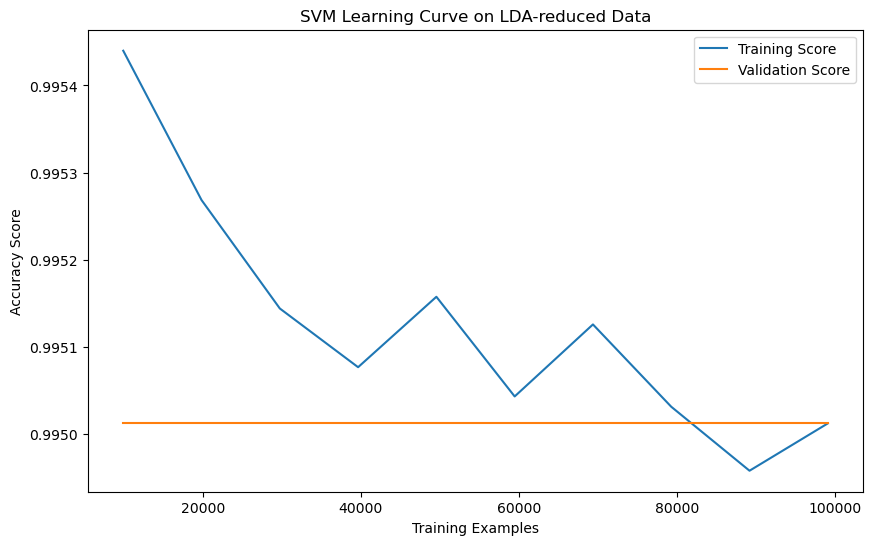

In [100]:
#Generating training and validation scores using learning curve function
train_sizes_svm_lda, train_scores_svm_lda, test_scores_svm_lda = learning_curve(
    svm_classifier_lda, 
    m_train_lda, n_train, #train data
    cv=5, #5-fold cross-validation
    n_jobs=-1, #use all processors for computation
    train_sizes=np.linspace(0.1, 1.0, 10), #set varying training sizes
    verbose=1 #display progress updates
)

# Plot the learning curve for SVM on LDA-reduced Data
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm_lda, np.mean(train_scores_svm_lda, axis=1), label="Training Score") #plot training scores
plt.plot(train_sizes_svm_lda, np.mean(test_scores_svm_lda, axis=1), label="Validation Score")#plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("SVM Learning Curve on LDA-reduced Data")
plt.legend()
plt.savefig("SVM Learning Curve on LDA-reduced Data.png")
plt.show()

# Classification Models Building with Dimensionality on the balanced_lung_cancer data

## Having previously balanced the dataset using undersampling method, by balancing the majority(0) outcomes to match with the number of the minority(1) outcomes. Let us look at our new dataset and prepare it for classification

In [101]:
balanced_lung_cancer_data

reasfolll  reassympl  reassurvl  reasothl  num_cancl  intstatl_cat  \
0             0.0   1.000000        0.0  0.000000          0             0   
1             0.0   1.000000        0.0  0.000000          0             0   
2             0.0   1.000000        0.0  0.000000          0             0   
3             0.0   1.000000        0.0  0.000000          0             0   
4             0.0   1.000000        0.0  0.000000          0             0   
...           ...        ...        ...       ...        ...           ...   
151159        0.0   0.953574        0.0  0.046426          1             2   
151160        0.0   0.000000        0.0  1.000000          1             1   
151161        0.0   0.671601        0.0  0.328399          1             1   
151162        0.0   0.834600        0.0  0.165400          1             1   
151163        0.0   0.163508        0.0  0.836492          1             1   

        lung_stage  lung_stage_7e  lung_stage_t  lung_stage_n  ...  age  \
0       320.000000     320.000000    200.000000    200.000000  ...   61   
1       320.000000     320.000000    200.000000    200.000000  ...   62   
2       320.000000     320.000000    200.000000    200.000000  ...   73   
3       320.000000     320.000000    200.000000    200.000000  ...   70   
4       320.000000     320.000000    200.000000    200.000000  ...   69   
...            ...            ...           ...           ...  ...  ...   
151159  395.821630     395.821630    290.714734    961.905363  ...   64   
151160  253.010077     240.345650    200.000000    136.677863  ...   62   
151161  370.444048     370.444048    200.000000    132.839947  ...   67   
151162  400.000000     400.000000    200.000000    166.920010  ...   65   
151163  400.000000     400.000000    232.701593    200.000000  ...   67   

        agelevel  dual  reconsent_outcome  reconsent_outcome_days  \
0              1     0                 12                    2580   
1              1     0                 12                    2702   
2              3     0                 12                    2608   
3              3     0                 12                    2659   
4              2     0                 12                    2564   
...          ...   ...                ...                     ...   
151159         1     0                 12                    5148   
151160         1     0                 12                    3862   
151161         2     0                 12                    4358   
151162         1     0                 12                    4701   
151163         2     0                 12                    5332   

        fstcan_exitstat  fstcan_exitage  fstcan_exitdays  in_TGWAS_population  \
0                     1              68             2545                    0   
1                     3              69             2524                    0   
2                     3              80             2538                    0   
3                     1              77             2627                    0   
4                     1              69              268                    0   
...                 ...             ...              ...                  ...   
151159                1              77             4591                    0   
151160                1              70             3087                    0   
151161                1              78             3798                    1   
151162                1              78             4566                    1   
151163                1              82             5135                    1   

        lung_cancer  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
151159            1  
151160            1  
151161            1  
151162            1  
151163            1  

[151164 rows x 247 columns]

In [102]:
balanced_lung_cancer_data["lung_cancer"].value_counts()

0    75582
1    75582
Name: lung_cancer, dtype: int64

## Plots depicting the Dataset before and after balancing 

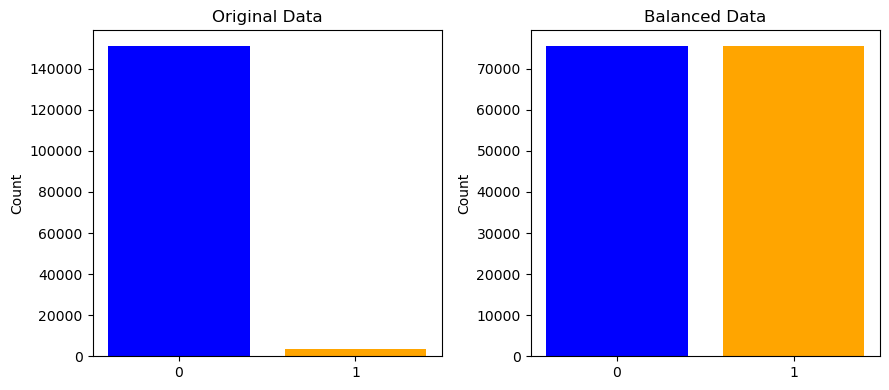

In [262]:
# Plotting side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Original data plot
original_counts = lung_filled["lung_cancer"].value_counts()
axes[0].bar(original_counts.index, original_counts.values, color=['blue', 'orange'])
axes[0].set_title('Original Data')
axes[0].set_xticks(original_counts.index)
axes[0].set_xticklabels(['0', '1'])
axes[0].set_ylabel('Count')
axes[0].grid(False)  

# Balanced data plot
balanced_counts = balanced_lung_cancer_data["lung_cancer"].value_counts()
axes[1].bar(balanced_counts.index, balanced_counts.values, color=['blue', 'orange'])
axes[1].set_title('Balanced Data')
axes[1].set_xticks(balanced_counts.index)
axes[1].set_xticklabels(['0', '1'])
axes[1].set_ylabel('Count')
axes[1].grid(False)  

# Adjust layout
plt.tight_layout()
plt.savefig("original vs balanced data.png")
plt.show()

### Define the features (X) and target variable (y)

In [104]:
X = balanced_lung_cancer_data[[ 'cig_years', "pack_years", "cigpd_f", "rsmoker_f", "xry_result2", "xry_result3",
    "fh_cancer", "lung_fh", "diabetes_f", "hearta_f", "hyperten_f", "liver_comorbidity",
    "ph_any_sqx", "biopllink3", "polyps_f", "nlst_flag", "curative_wsll", "curative_chemol", "curative_radl"]] # feature variables




y = balanced_lung_cancer_data['lung_cancer'] # Target Variable

### Split the data into training and testing sets

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 13. RFC

In [106]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
start_time_rf = time.time()  # training start time
rf_classifier.fit(X_train, y_train)  # fit the classifier
end_time_rf = time.time()  # training end time

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf) #evaluate accuracy score
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf) #genrate confusion matrix
classification_rep_rf = classification_report(y_test, y_pred_rf) #generate classifiacation report

print("Random Forest Classifier Model without Dimensionality Reduction:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)

Random Forest Classifier Model without Dimensionality Reduction:
Accuracy: 0.9937485529057652
Confusion Matrix:
 [[14969    30]
 [  159 15075]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14999
           1       1.00      0.99      0.99     15234

    accuracy                           0.99     30233
   macro avg       0.99      0.99      0.99     30233
weighted avg       0.99      0.99      0.99     30233



### Calculate the training time

In [107]:
training_time_rf = end_time_rf - start_time_rf #evaluate train time
print("Random Forest Training Time without Dimensionality Reduction:", training_time_rf, "seconds")

Random Forest Training Time without Dimensionality Reduction: 6.766894102096558 seconds


### Learning Curve for Random Forest Classifier without Dimensionality Reduction

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Train Scores:
 [[0.99865619 0.99886293 0.99886293 0.99886293 0.99886293]
 [0.99865619 0.99839777 0.99839777 0.99839777 0.99839777]
 [0.99817386 0.99824277 0.99827723 0.99827723 0.99827723]
 [0.99821692 0.99811355 0.99816523 0.99816523 0.99816523]
 [0.99803605 0.99795336 0.99801538 0.99801538 0.99801538]
 [0.99800158 0.99781208 0.99788099 0.99788099 0.99788099]
 [0.99784406 0.9977407  0.99777023 0.99785883 0.99785883]
 [0.99766135 0.9975709  0.99759674 0.99766135 0.99770011]
 [0.99765703 0.99753069 0.99753069 0.99765703 0.99765703]
 [0.99756057 0.99747788 0.99747788 0.99758125 0.99749855]]
Validation Scores:
 [[0.99044941 0.99053171 0.99032498 0.99073844 0.99073844]
 [0.9917311  0.9923096  0.99226825 0.99218556 0.99218556]
 [0.99255799 0.99259902 0.99235095 0.99247499 0.99239229]
 [0.9924753  0.99313653 0.99313653 0.99259902 0.99280576]
 [0.99276471 0.99309518 0.99330191 0.99305383 0.99280576]
 [0.99305412 0.99317787 0.99350864 0.99313653 0.99305383]
 [0.99305412 0.99334326 0.9934673  0

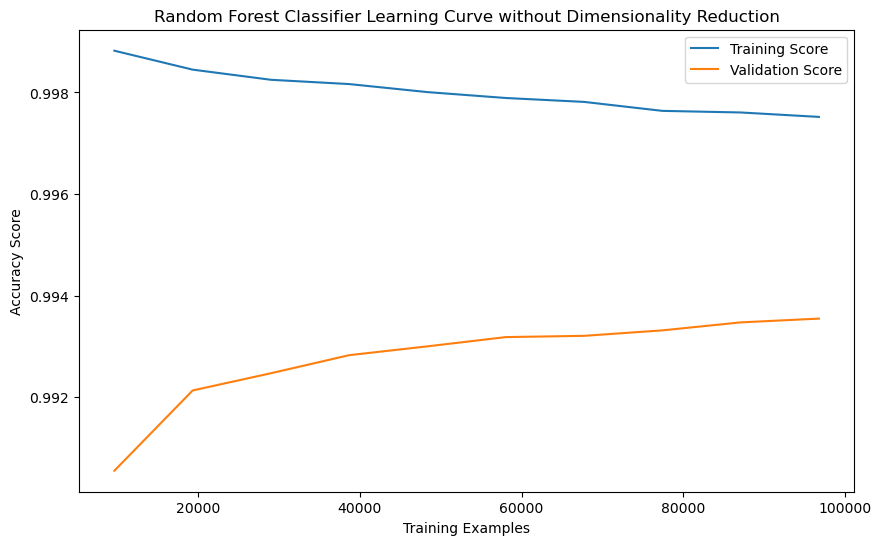

In [108]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_classifier, 
    X_train, y_train, #train data 
    cv=5, #5-fold cross validation
    n_jobs=-1, #use all processors for computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes
    verbose=1 #display progress info
)

# Print the train and validation scores
print("Train Scores:\n", train_scores_rf)
print("Validation Scores:\n", test_scores_rf)

# Plot the learning curve for Random Forest Classifier without Dimensionality Reduction
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label="Training Score")
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Classifier Learning Curve without Dimensionality Reduction")
plt.legend()
plt.savefig("RFC_model_no_dim_red_2.png")
plt.show()

# 14. Logistic Regression 

In [109]:
lr_classifier = LogisticRegression(random_state=0)

# Train the model on the training data
start_time_lr = time.time()  # training start time
lr_classifier.fit(X_train, y_train)  # fit the classifier
end_time_lr = time.time()  # training end time

# Make predictions on the testing data
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Model without Dimensionality Reduction:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", classification_rep_lr)

Logistic Regression Model without Dimensionality Reduction:
Accuracy: 0.9390070452816459
Confusion Matrix:
 [[14651   348]
 [ 1496 13738]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     14999
           1       0.98      0.90      0.94     15234

    accuracy                           0.94     30233
   macro avg       0.94      0.94      0.94     30233
weighted avg       0.94      0.94      0.94     30233



### Calculate the training time

In [110]:
training_time_lr = end_time_lr - start_time_lr
print("Logistic Regression Training Time without Dimensionality Reduction:", training_time_lr, "seconds")

Logistic Regression Training Time without Dimensionality Reduction: 0.829491138458252 seconds


### Plot the learning curve

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


Train Scores:
 [[0.9416994  0.92950176 0.92950176 0.92950176 0.92950176]
 [0.92846806 0.92619392 0.92619392 0.92619392 0.92619392]
 [0.93456913 0.93188161 0.93670537 0.93670537 0.93670537]
 [0.92826317 0.93609324 0.92805644 0.92805644 0.92805644]
 [0.93864219 0.93179939 0.93901431 0.94397585 0.94397585]
 [0.93680874 0.93474141 0.92817765 0.93918616 0.93918616]
 [0.94080035 0.94022445 0.93428825 0.93114294 0.93114294]
 [0.93367789 0.9431617  0.93767039 0.93496996 0.93309645]
 [0.93340914 0.93346656 0.93455765 0.93919765 0.94399844]
 [0.93864219 0.9289465  0.93395973 0.93387704 0.94376912]]
Validation Scores:
 [[0.93988506 0.92888448 0.93078641 0.92826429 0.93074506]
 [0.92797784 0.9259489  0.92789217 0.92454312 0.92760275]
 [0.93244305 0.93326718 0.93955181 0.93669892 0.94013065]
 [0.92706826 0.93702969 0.93016621 0.92768544 0.93062102]
 [0.93475834 0.9308691  0.94223931 0.94418258 0.94744894]
 [0.93405548 0.93264699 0.92938063 0.93913834 0.94153643]
 [0.93823128 0.93926238 0.93500372 0

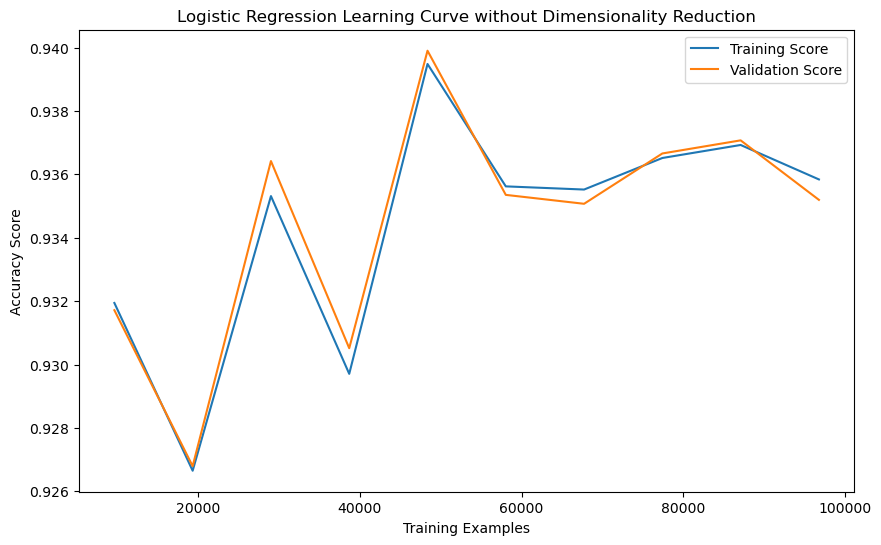

In [111]:
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    lr_classifier, 
    X_train, y_train, #train data 
    cv=5, #5-fold cross validation
    n_jobs=-1, #use all processors for computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes
    verbose=1 #display progress info
)


print("Train Scores:\n", train_scores_lr)
print("Validation Scores:\n", test_scores_lr)


# Plot the learning curve for Logistic Regression without Dimensionality Reduction
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr, np.mean(train_scores_lr, axis=1), label="Training Score")
plt.plot(train_sizes_lr, np.mean(test_scores_lr, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Learning Curve without Dimensionality Reduction")
plt.legend()
plt.savefig("LogReg_model_no_dim_red_2.png")
plt.grid(False)
plt.show()

# 15. Gradient Boosting

In [112]:
# Creating a Gradient Boosting classifier with a fixed random state
gb_classifier = GradientBoostingClassifier(random_state=0)

# Train the model on the training data
start_time_gb = time.time()  # training start time
gb_classifier.fit(X_train, y_train)  # fit the classifier
end_time_gb = time.time()  # training end time

# Make predictions on the testing data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb) #accuracy score
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb) #confusion matrix
classification_rep_gb = classification_report(y_test, y_pred_gb) #classification report

print("Gradient Boosting Model without Dimensionality Reduction:")
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", classification_rep_gb)

Gradient Boosting Model without Dimensionality Reduction:
Accuracy: 0.9913339728111666
Confusion Matrix:
 [[14999     0]
 [  262 14972]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14999
           1       1.00      0.98      0.99     15234

    accuracy                           0.99     30233
   macro avg       0.99      0.99      0.99     30233
weighted avg       0.99      0.99      0.99     30233



### Plot out confusion matrix for GB classifier

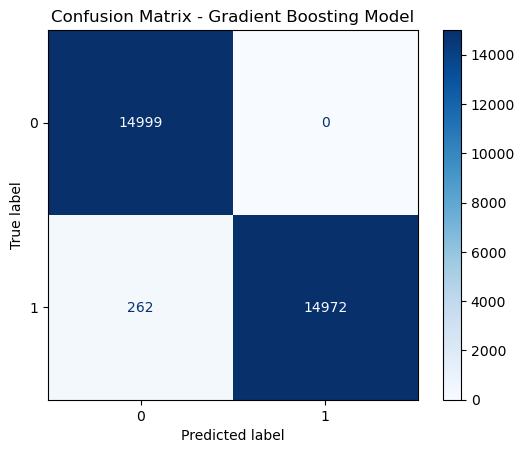

In [113]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(gb_classifier, X_test, y_test,cmap=plt.cm.Blues) 
disp.ax_.set_title('Confusion Matrix - Gradient Boosting Model')
plt.grid(False)
plt.savefig("Confusion Matrix - Gradient Boosting Model.png")
plt.show()

### Calculate the training time

In [114]:
training_time_gb = end_time_gb - start_time_gb #calculate training time
print("Gradient Boosting Training Time without Dimensionality Reduction:", training_time_gb, "seconds")

Gradient Boosting Training Time without Dimensionality Reduction: 20.634565114974976 seconds


### Plot the learning curve

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


Train Scores:
 [[0.99193715 0.9914203  0.9914203  0.9914203  0.9914203 ]
 [0.9917821  0.9907484  0.9907484  0.9907484  0.9907484 ]
 [0.99117941 0.99148951 0.99121386 0.99121386 0.99121386]
 [0.99100705 0.99136884 0.99144637 0.99144637 0.99144637]
 [0.99135864 0.9915447  0.9912346  0.99108989 0.99108989]
 [0.99124832 0.99150674 0.99164456 0.99157565 0.99157565]
 [0.99176019 0.99153869 0.99100709 0.99102185 0.99102185]
 [0.99123974 0.99117514 0.99117514 0.99113638 0.99140771]
 [0.99148951 0.99145505 0.99147802 0.99152396 0.99128278]
 [0.99132763 0.99137931 0.99153436 0.99131729 0.99150335]]
Validation Scores:
 [[0.99016    0.99003556 0.98991152 0.98991152 0.98995287]
 [0.99086286 0.99036633 0.99057306 0.9901596  0.99061441]
 [0.99119362 0.99049037 0.99077979 0.99061441 0.99061441]
 [0.99111093 0.9906971  0.99106921 0.99094517 0.99111056]
 [0.99123496 0.99131729 0.99090383 0.99086248 0.99106921]
 [0.99131765 0.9912346  0.99106921 0.99160671 0.99115191]
 [0.99160706 0.99111056 0.99053171 0

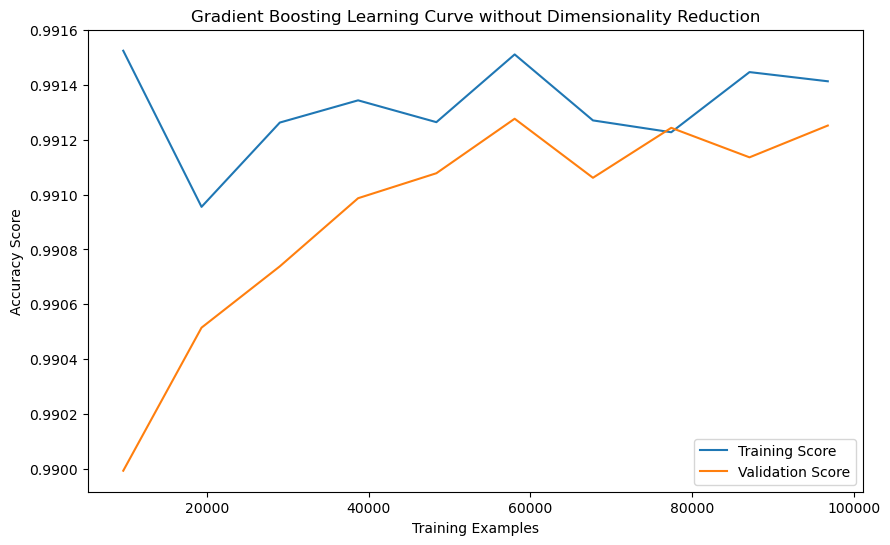

In [115]:
train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(
    gb_classifier, 
    X_train, y_train, #train data 
    cv=5, #5-fold cross validation
    n_jobs=-1, #use all processors for computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes
    verbose=1 #display progress info
)

print("Train Scores:\n", train_scores_gb)
print("Validation Scores:\n", test_scores_gb)

# Plot the learning curve for Gradient Boosting without Dimensionality Reduction
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb, np.mean(train_scores_gb, axis=1), label="Training Score")
plt.plot(train_sizes_gb, np.mean(test_scores_gb, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Gradient Boosting Learning Curve without Dimensionality Reduction")
plt.legend()
plt.savefig("GB_model_no_dim_red_2.png")
plt.show()

# 16. Support Vector Machine

In [116]:
svm_classifier = SVC(random_state=0)

# Train the model on the training data
start_time_svm = time.time()  # training start time
svm_classifier.fit(X_train, y_train)  # fit the classifier
end_time_svm = time.time()  # training end time

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the Support Vector Machine model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Model without Dimensionality Reduction:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Model without Dimensionality Reduction:
Accuracy: 0.9168127542751299
Confusion Matrix:
 [[14221   778]
 [ 1737 13497]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     14999
           1       0.95      0.89      0.91     15234

    accuracy                           0.92     30233
   macro avg       0.92      0.92      0.92     30233
weighted avg       0.92      0.92      0.92     30233



### Calculate the training time

In [117]:
training_time_svm = end_time_svm - start_time_svm
print("Support Vector Machine Training Time without Dimensionality Reduction:", training_time_svm, "seconds")

Support Vector Machine Training Time without Dimensionality Reduction: 686.7599895000458 seconds


### Plot the learning curve 

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 924.4min finished


Train Scores:
 [[0.81021294 0.81093653 0.81093653 0.81093653 0.81093653]
 [0.84577217 0.85104404 0.85104404 0.85104404 0.85104404]
 [0.87020639 0.87192916 0.87210144 0.87210144 0.87210144]
 [0.88544332 0.88655451 0.88567589 0.88567589 0.88567589]
 [0.89522864 0.89574547 0.89382287 0.89316133 0.89316133]
 [0.9015436  0.90159529 0.90061331 0.89997588 0.89997588]
 [0.90637921 0.90620201 0.90530124 0.90516834 0.90516834]
 [0.90946444 0.90938691 0.90828865 0.90885716 0.9091285 ]
 [0.911484   0.91184003 0.91105905 0.91123132 0.91181706]
 [0.91361738 0.91375176 0.91284214 0.91296618 0.91274911]]
Validation Scores:
 [[0.80539133 0.80881502 0.81104771 0.81245349 0.81274291]
 [0.84822425 0.84722567 0.85086414 0.85198048 0.85152568]
 [0.8709224  0.87087571 0.87310841 0.8715786  0.87343918]
 [0.88402861 0.88369305 0.88836517 0.88402382 0.88762094]
 [0.89519163 0.89233441 0.89671711 0.89192095 0.89481518]
 [0.90172407 0.898495   0.9028777  0.89820557 0.900645  ]
 [0.90660272 0.90362193 0.9072604  0

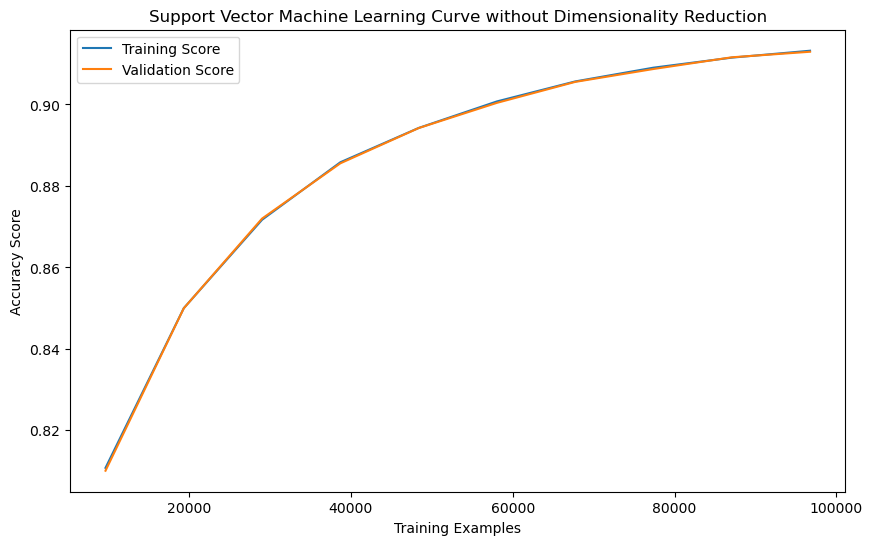

In [118]:
# Learning Curve for Support Vector Machine without Dimensionality Reduction
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    svm_classifier, 
    X_train, y_train, #train data 
    cv=5, #5-fold cross validation
    n_jobs=-1, #use all processors for computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes
    verbose=1 #display progress info
)

print("Train Scores:\n", train_scores_svm)
print("Validation Scores:\n", test_scores_svm)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label="Training Score")
plt.plot(train_sizes_svm, np.mean(test_scores_svm, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Support Vector Machine Learning Curve without Dimensionality Reduction")
plt.legend()
plt.savefig("SVM_model_no_dim_red_2.png")
plt.show()

## Combined ROC/AUC curves for different classifiers without Dimensionality reduction

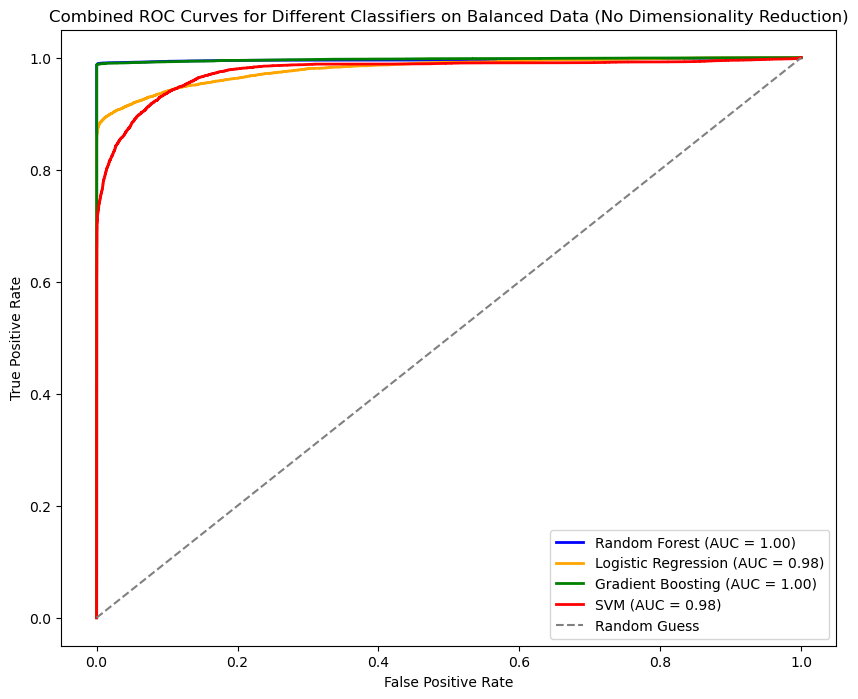

In [119]:
#Creating a plot to compare ROC curves of multiple classifiers
classifiers = [rf_classifier, lr_classifier, gb_classifier, svm_classifier]
labels = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 8))

#Iterating through classifiers and plotting their ROC curves
for clf, label, color in zip(classifiers, labels, colors):
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_decision = clf.decision_function(X_test)
        y_proba = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())
    else:
        raise ValueError("Classifier does not have 'predict_proba' or 'decision_function' attribute.")
    
    #Calculating false positive rate  and true positive rate  for the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    #Plotting the ROC curve for each classifier with respective label and color
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for Different Classifiers on Balanced Data (No Dimensionality Reduction)')
plt.legend()
plt.savefig("ROC_Curves_Balanced.png")
plt.show()


## Having evaluated the performance of 4 models on the balanced dataset without dimensionality reduction
# PCA will be applied as the first reduction technique on the balanced data

In [237]:
n_components_pca = 2 
pca_balanced = PCA(n_components=n_components_pca)

### Fit and transform the training data

In [238]:
X_train_pca_balanced = pca_balanced.fit_transform(X_train)

# Transform the testing data
X_test_pca_balanced = pca_balanced.transform(X_test)

In [239]:
np.set_printoptions(formatter={'float': '{:0.9f}'.format}) # set cum. exp.variance format to decimalthe 

## Check explained variance

In [240]:
explained_variance_ratio = pca_balanced.explained_variance_ratio_

In [241]:
cumulative_explained_variance = np.sum(explained_variance_ratio)

In [242]:
cumulative_explained_variance

0.9898452008207793

## The number of components for PCA has been set to 2. Two components are enough to capture enough variance in the data. 

## Scatter plot for all principal components in a 2D space

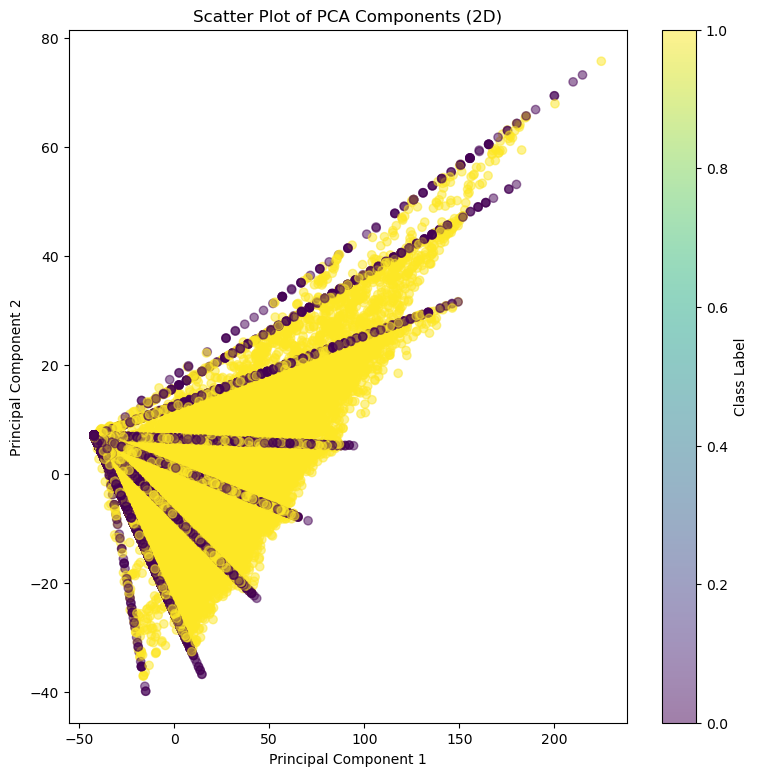

In [268]:
plt.figure(figsize=(9,9))
plt.scatter(X_train_pca_balanced[:, 0], X_train_pca_balanced[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of PCA Components (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.savefig("Scatter Plot of PCA Components.png")
plt.show()

## Pair plots for each component

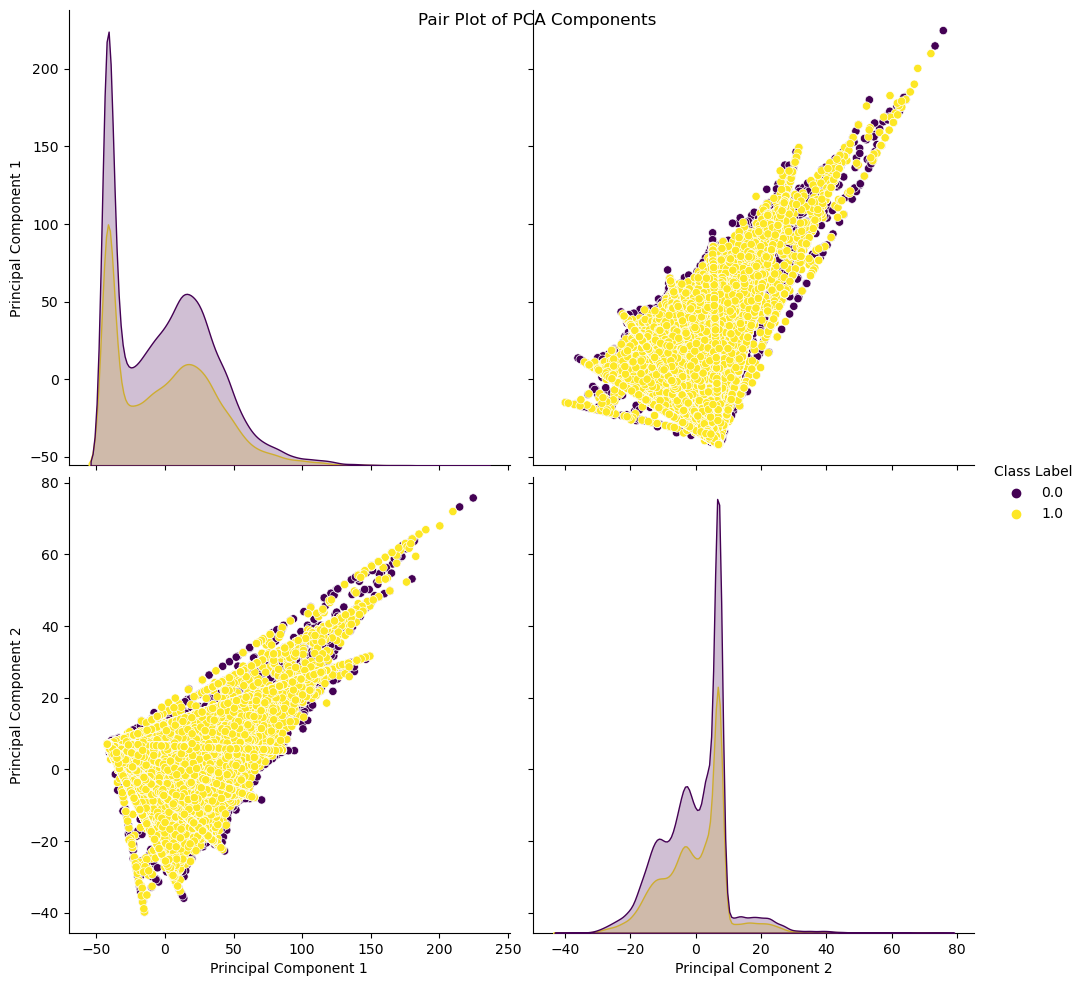

In [265]:
# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_train_pca_balanced, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class Label'] = y_train
sns.pairplot(pca_df, hue='Class Label', palette='viridis', height=5) # Pair plot
plt.suptitle('Pair Plot of PCA Components')
plt.show()


# 17. Random Forest Classifier with PCA on Balanced Data

In [244]:
rf_classifier_pca_balanced = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the PCA-reduced data
start_time_rf_pca_balanced = time.time()
rf_classifier_pca_balanced.fit(X_train_pca_balanced, y_train)
end_time_rf_pca_balanced = time.time()

# Make predictions on the testing data
y_pred_rf_pca_balanced = rf_classifier_pca_balanced.predict(X_test_pca_balanced)

# Evaluate the RFC model on PCA-reduced data
accuracy_rf_pca_balanced = accuracy_score(y_test, y_pred_rf_pca_balanced)
conf_matrix_rf_pca_balanced = confusion_matrix(y_test, y_pred_rf_pca_balanced)
classification_rep_rf_pca_balanced = classification_report(y_test, y_pred_rf_pca_balanced)

print("Random Forest Classifier with PCA on Balanced Data:")
print("Accuracy:", accuracy_rf_pca_balanced)
print("Confusion Matrix:\n", conf_matrix_rf_pca_balanced)
print("Classification Report:\n", classification_rep_rf_pca_balanced)

Random Forest Classifier with PCA on Balanced Data:
Accuracy: 0.9622597823570271
Confusion Matrix:
 [[14649   350]
 [  791 14443]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     14999
           1       0.98      0.95      0.96     15234

    accuracy                           0.96     30233
   macro avg       0.96      0.96      0.96     30233
weighted avg       0.96      0.96      0.96     30233



### Calculate the training time

In [245]:
training_time_rf_pca_balanced = end_time_rf_pca_balanced - start_time_rf_pca_balanced
print("RFC Training Time with PCA on Balanced Data:", training_time_rf_pca_balanced, "seconds")

RFC Training Time with PCA on Balanced Data: 12.90964651107788 seconds


### Learning Curve 

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


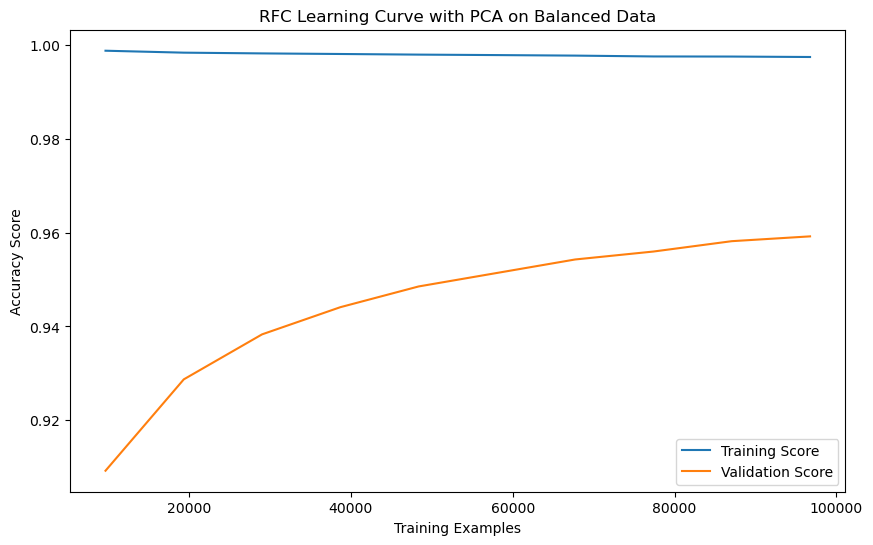

In [246]:
train_sizes_rf_pca_balanced, train_scores_rf_pca_balanced, test_scores_rf_pca_balanced = learning_curve(
    rf_classifier_pca_balanced, 
    X_train_pca_balanced, y_train, #Train data
    cv=5, #5-fold cross-validation
    n_jobs=-1,  #Use all processors for parallel computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes 
    verbose=1 #display progress info
)

# Plot the learning curve for Random Forest Classifier with PCA on Balanced Data
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf_pca_balanced, np.mean(train_scores_rf_pca_balanced, axis=1), label="Training Score") #plot training scores
plt.plot(train_sizes_rf_pca_balanced, np.mean(test_scores_rf_pca_balanced, axis=1), label="Validation Score")#plot validation scores
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("RFC Learning Curve with PCA on Balanced Data")
plt.legend()
plt.savefig("RFC Learning Curve with PCA on Balanced Data.png")
plt.show()

### ROC curve for Random Forest Classifier with PCA on Balanced Data

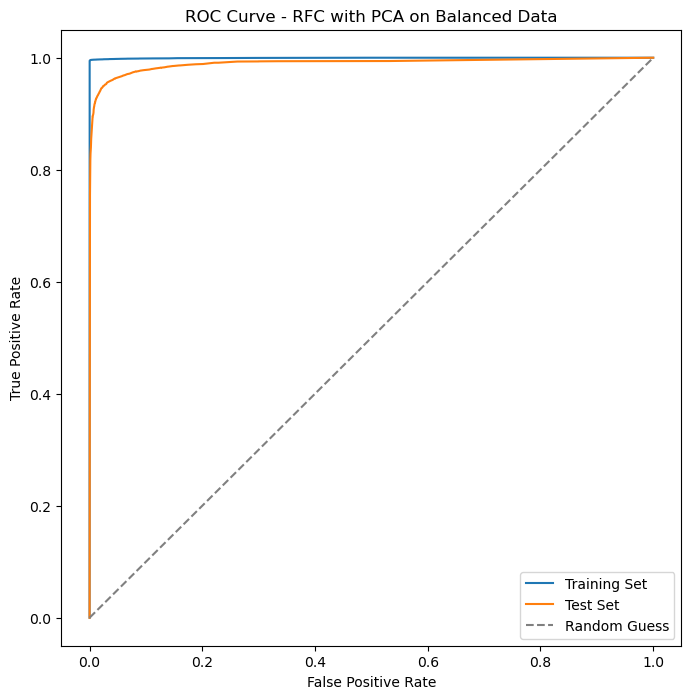

In [247]:
#Generating predicted probabilities for the balanced Random Forest classifier on the training and test sets
y_train_rf_pca_balanced = rf_classifier_pca_balanced.predict_proba(X_train_pca_balanced)[:, 1]
y_test_rf_pca_balanced = rf_classifier_pca_balanced.predict_proba(X_test_pca_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_rf_pca_balanced, tpr_train_rf_pca_balanced, thresholds_train_rf_pca_balanced = roc_curve(y_train, y_train_rf_pca_balanced)

# Calculate ROC curve for test set
fpr_test_rf_pca_balanced, tpr_test_rf_pca_balanced, thresholds_test_rf_pca_balanced = roc_curve(y_test, y_test_rf_pca_balanced)

# Plot ROC curve for Random Forest Classifier with PCA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_rf_pca_balanced, tpr_train_rf_pca_balanced, label='Training Set')
plt.plot(fpr_test_rf_pca_balanced, tpr_test_rf_pca_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RFC with PCA on Balanced Data')
plt.legend()
plt.savefig("ROC_RFC_PCA_Balanced.png")
plt.show()


# 18. Logistic Regression with PCA on Balanced Data

In [248]:
#Creating a Logistic Regression classifier with a fixed random state for the balanced PCA-reduced data
lr_classifier_pca_balanced = LogisticRegression(random_state=0)

# Train the model on the PCA-reduced data
start_time_lr_pca_balanced = time.time() #start timer
lr_classifier_pca_balanced.fit(X_train_pca_balanced, y_train) #fit classifier
end_time_lr_pca_balanced = time.time() #end timer

# Make predictions on the testing data
y_pred_lr_pca_balanced = lr_classifier_pca_balanced.predict(X_test_pca_balanced)

# Evaluate the Logistic Regression model on PCA-reduced data
accuracy_lr_pca_balanced = accuracy_score(y_test, y_pred_lr_pca_balanced)
conf_matrix_lr_pca_balanced = confusion_matrix(y_test, y_pred_lr_pca_balanced)
classification_rep_lr_pca_balanced = classification_report(y_test, y_pred_lr_pca_balanced)

print("Logistic Regression Model with PCA on Balanced Data:")
print("Accuracy:", accuracy_lr_pca_balanced)
print("Confusion Matrix:\n", conf_matrix_lr_pca_balanced)
print("Classification Report:\n", classification_rep_lr_pca_balanced)

Logistic Regression Model with PCA on Balanced Data:
Accuracy: 0.7449806502828036
Confusion Matrix:
 [[10664  4335]
 [ 3375 11859]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     14999
           1       0.73      0.78      0.75     15234

    accuracy                           0.74     30233
   macro avg       0.75      0.74      0.74     30233
weighted avg       0.75      0.74      0.74     30233



### Calculate the training time

In [249]:
training_time_lr_pca_balanced = end_time_lr_pca_balanced - start_time_lr_pca_balanced
print("Logistic Regression Training Time with PCA on Balanced Data:", training_time_lr_pca_balanced, "seconds")

Logistic Regression Training Time with PCA on Balanced Data: 0.16206717491149902 seconds


### learning curve for Logistic Regression with PCA on Balanced Data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


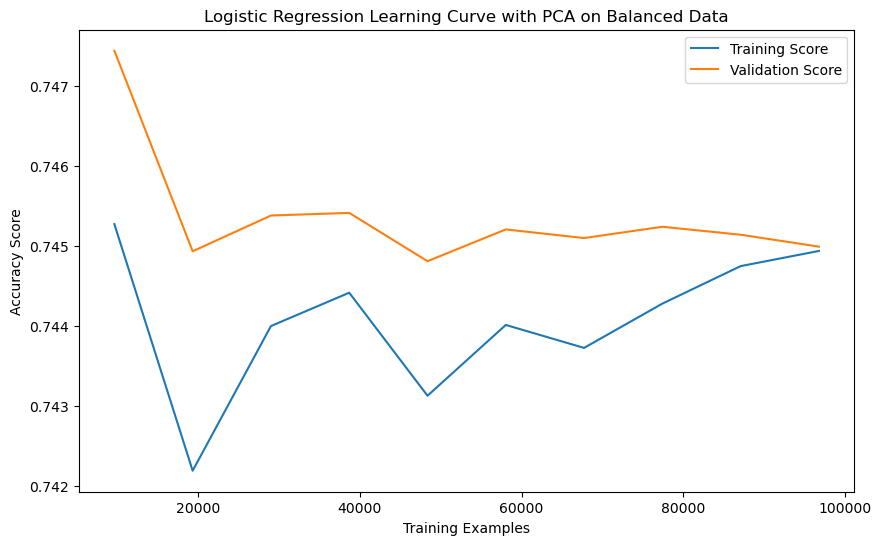

In [250]:
# Learning Curve for Logistic Regression with PCA on Balanced Data
train_sizes_lr_pca_balanced, train_scores_lr_pca_balanced, test_scores_lr_pca_balanced = learning_curve(
    lr_classifier_pca_balanced, 
    X_train_pca_balanced, y_train, #Train data
    cv=5, #5-fold cross-validation
    n_jobs=-1,  #Use all processors for parallel computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes 
    verbose=1 #display progress info
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr_pca_balanced, np.mean(train_scores_lr_pca_balanced, axis=1), label="Training Score") 
plt.plot(train_sizes_lr_pca_balanced, np.mean(test_scores_lr_pca_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Learning Curve with PCA on Balanced Data")
plt.legend()
plt.savefig("LogReg Learning Curve with PCA on Balanced Data.png")
plt.show()

### ROC curve for Logistic Regression with PCA on Balanced Data

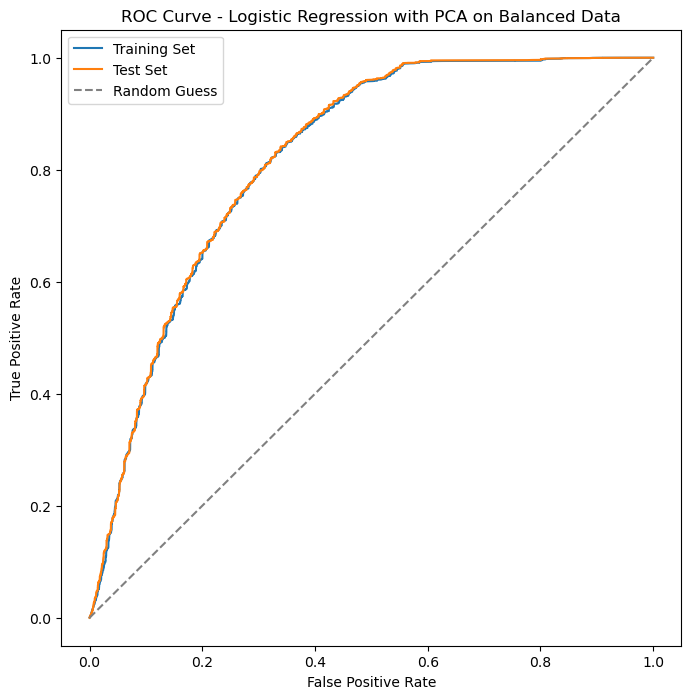

In [251]:
#Generating predicted probabilities for the balanced Logistic Regression classifier on the training and test sets
y_train_lr_pca_balanced = lr_classifier_pca_balanced.predict_proba(X_train_pca_balanced)[:, 1]
y_test_lr_pca_balanced = lr_classifier_pca_balanced.predict_proba(X_test_pca_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_lr_pca_balanced, tpr_train_lr_pca_balanced, thresholds_train_lr_pca_balanced = roc_curve(y_train, y_train_lr_pca_balanced)

# Calculate ROC curve for test set
fpr_test_lr_pca_balanced, tpr_test_lr_pca_balanced, thresholds_test_lr_pca_balanced = roc_curve(y_test, y_test_lr_pca_balanced)

# Plot ROC curve for Logistic Regression with PCA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_lr_pca_balanced, tpr_train_lr_pca_balanced, label='Training Set')
plt.plot(fpr_test_lr_pca_balanced, tpr_test_lr_pca_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with PCA on Balanced Data')
plt.legend()
plt.savefig("ROC_LR_PCA_Balanced.png")
plt.show()


# 19. Gradient Boosting with PCA on Balanced Data

In [252]:
#Creating a Gradient Boosting classifier with a fixed random state for the balanced PCA-reduced data
gb_classifier_pca_balanced = GradientBoostingClassifier(random_state=0)

# Train the model on the PCA-reduced data
start_time_gb_pca_balanced = time.time()
gb_classifier_pca_balanced.fit(X_train_pca_balanced, y_train)
end_time_gb_pca_balanced = time.time()

# Make predictions on the testing data
y_pred_gb_pca_balanced = gb_classifier_pca_balanced.predict(X_test_pca_balanced)

# Evaluate the Gradient Boosting model on PCA-reduced data
accuracy_gb_pca_balanced = accuracy_score(y_test, y_pred_gb_pca_balanced)
conf_matrix_gb_pca_balanced = confusion_matrix(y_test, y_pred_gb_pca_balanced)
classification_rep_gb_pca_balanced = classification_report(y_test, y_pred_gb_pca_balanced)

print("Gradient Boosting Model with PCA on Balanced Data:")
print("Accuracy:", accuracy_gb_pca_balanced)
print("Confusion Matrix:\n", conf_matrix_gb_pca_balanced)
print("Classification Report:\n", classification_rep_gb_pca_balanced)

Gradient Boosting Model with PCA on Balanced Data:
Accuracy: 0.7836139317963814
Confusion Matrix:
 [[10870  4129]
 [ 2413 12821]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77     14999
           1       0.76      0.84      0.80     15234

    accuracy                           0.78     30233
   macro avg       0.79      0.78      0.78     30233
weighted avg       0.79      0.78      0.78     30233



### Calculate the training time

In [253]:
training_time_gb_pca_balanced = end_time_gb_pca_balanced - start_time_gb_pca_balanced
print("Gradient Boosting Training Time with PCA on Balanced Data:", training_time_gb_pca_balanced, "seconds")


Gradient Boosting Training Time with PCA on Balanced Data: 8.310176849365234 seconds


### Plot the learning curve

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.5s finished


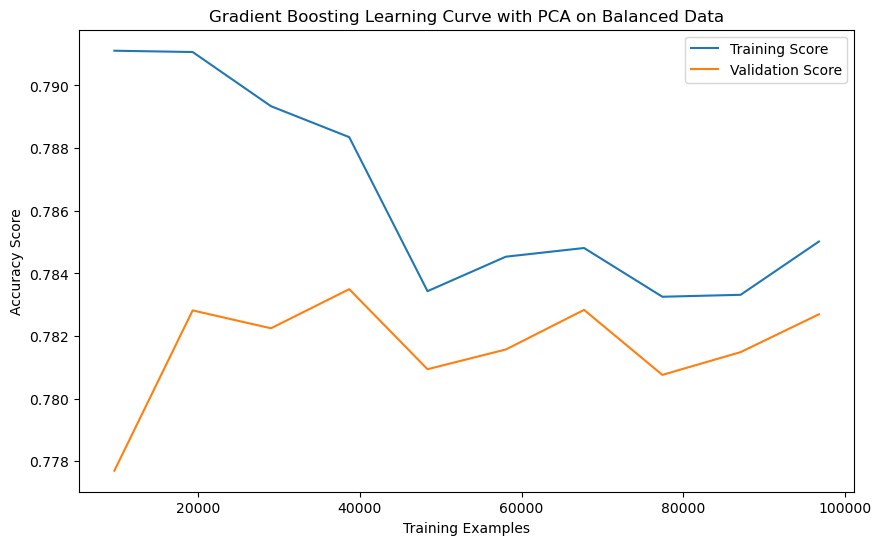

In [254]:
# Learning Curve for Gradient Boosting with PCA on Balanced Data
train_sizes_gb_pca_balanced, train_scores_gb_pca_balanced, test_scores_gb_pca_balanced = learning_curve(
    gb_classifier_pca_balanced, 
    X_train_pca_balanced, y_train, #Train data
    cv=5, #5-fold cross-validation
    n_jobs=-1,  #Use all processors for parallel computation
    train_sizes=np.linspace(0.1, 1.0, 10), #use varying train sizes 
    verbose=1 #display progress info
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb_pca_balanced, np.mean(train_scores_gb_pca_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_gb_pca_balanced, np.mean(test_scores_gb_pca_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Gradient Boosting Learning Curve with PCA on Balanced Data")
plt.legend()
plt.savefig("GB Learning Curve with PCA on Balanced Data.png")
plt.show()

### ROC curve for Gradient Boosting with PCA on Balanced Data

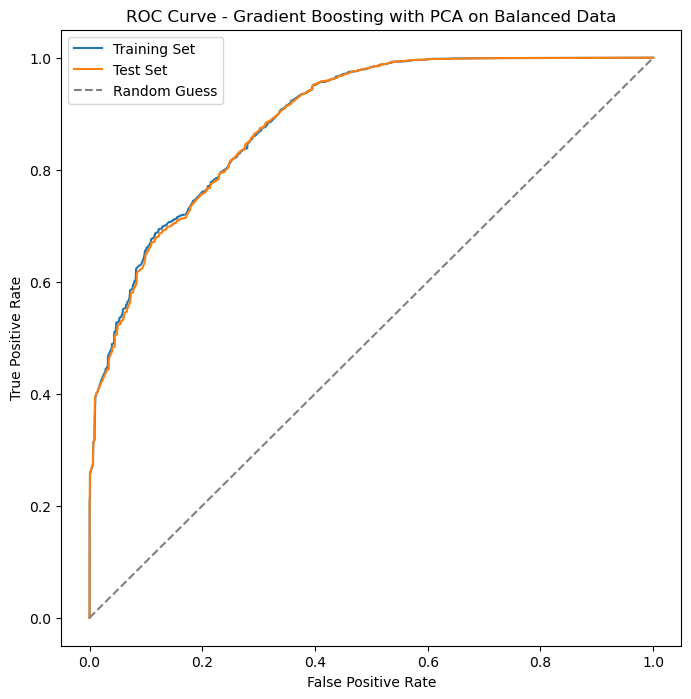

In [255]:
#Generating predicted probabilities for the balanced Gradient Boosting classifier on the training and test sets
y_train_gb_pca_balanced = gb_classifier_pca_balanced.predict_proba(X_train_pca_balanced)[:, 1]
y_test_gb_pca_balanced = gb_classifier_pca_balanced.predict_proba(X_test_pca_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_gb_pca_balanced, tpr_train_gb_pca_balanced, thresholds_train_gb_pca_balanced = roc_curve(y_train, y_train_gb_pca_balanced)

# Calculate ROC curve for test set
fpr_test_gb_pca_balanced, tpr_test_gb_pca_balanced, thresholds_test_gb_pca_balanced = roc_curve(y_test, y_test_gb_pca_balanced)

# Plot ROC curve for Gradient Boosting with PCA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_gb_pca_balanced, tpr_train_gb_pca_balanced, label='Training Set')
plt.plot(fpr_test_gb_pca_balanced, tpr_test_gb_pca_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting with PCA on Balanced Data')
plt.legend()
plt.savefig("ROC_GB_PCA_Balanced.png")
plt.show()


# 20. Support Vector Machine with PCA on Balanced Data

In [256]:
#Creating a Support Vector Machine classifier with probability estimation for the balanced PCA-reduced data
svm_classifier_pca_balanced = SVC(probability=True, random_state=0)

# Train the model on the PCA-reduced data
start_time_svm_pca_balanced = time.time()
svm_classifier_pca_balanced.fit(X_train_pca_balanced, y_train)
end_time_svm_pca_balanced = time.time()

# Make predictions on the testing data
y_pred_svm_pca_balanced = svm_classifier_pca_balanced.predict(X_test_pca_balanced)

# Evaluate the Support Vector Machine model on PCA-reduced data
accuracy_svm_pca_balanced = accuracy_score(y_test, y_pred_svm_pca_balanced)
conf_matrix_svm_pca_balanced = confusion_matrix(y_test, y_pred_svm_pca_balanced)
classification_rep_svm_pca_balanced = classification_report(y_test, y_pred_svm_pca_balanced)

print("Support Vector Machine Model with PCA on Balanced Data:")
print("Accuracy:", accuracy_svm_pca_balanced)
print("Confusion Matrix:\n", conf_matrix_svm_pca_balanced)
print("Classification Report:\n", classification_rep_svm_pca_balanced)


Support Vector Machine Model with PCA on Balanced Data:
Accuracy: 0.7674395528065359
Confusion Matrix:
 [[ 9683  5316]
 [ 1715 13519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.73     14999
           1       0.72      0.89      0.79     15234

    accuracy                           0.77     30233
   macro avg       0.78      0.77      0.76     30233
weighted avg       0.78      0.77      0.76     30233



### Calculate the training time

In [257]:
training_time_svm_pca_balanced = end_time_svm_pca_balanced - start_time_svm_pca_balanced
print("Support Vector Machine Training Time with PCA on Balanced Data:", training_time_svm_pca_balanced, "seconds")

Support Vector Machine Training Time with PCA on Balanced Data: 3932.2581067085266 seconds


### Plot the learning curve

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 333.8min finished


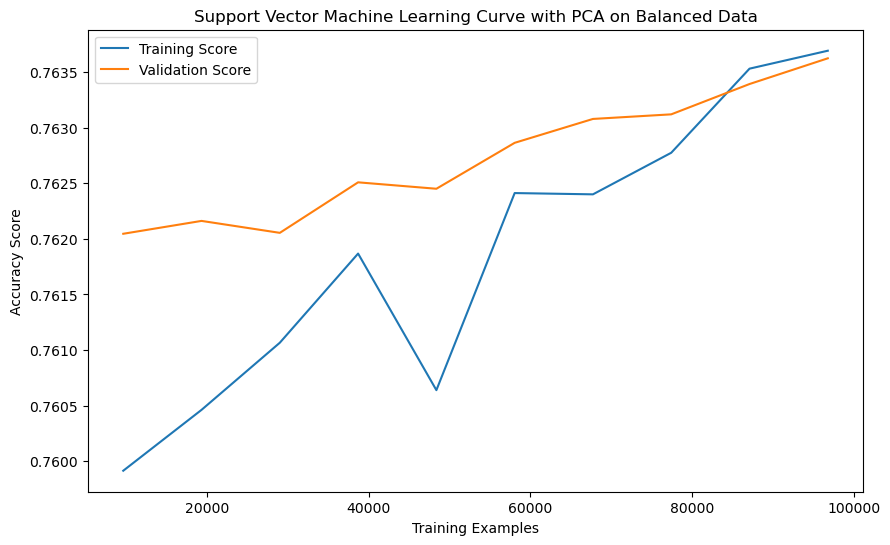

In [258]:
# Learning Curve for Support Vector Machine with PCA on Balanced Data
train_sizes_svm_pca_balanced, train_scores_svm_pca_balanced, test_scores_svm_pca_balanced = learning_curve(
    svm_classifier_pca_balanced, 
    X_train_pca_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm_pca_balanced, np.mean(train_scores_svm_pca_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_svm_pca_balanced, np.mean(test_scores_svm_pca_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Support Vector Machine Learning Curve with PCA on Balanced Data")
plt.legend()
plt.savefig("SVM Learning Curve with PCA on Balanced Data.png")
plt.show()

### ROC curve for Support Vector Machine with PCA on Balanced Data

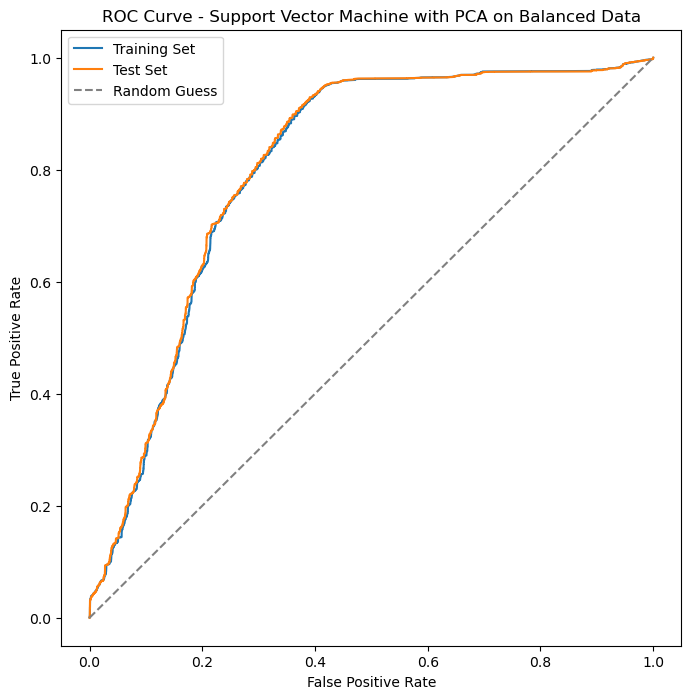

In [259]:
#Generating decision function scores for the balanced SVM classifier on the training and test sets
y_train_svm_pca_balanced = svm_classifier_pca_balanced.decision_function(X_train_pca_balanced)
y_test_svm_pca_balanced = svm_classifier_pca_balanced.decision_function(X_test_pca_balanced)

# Calculate ROC curve for training set
fpr_train_svm_pca_balanced, tpr_train_svm_pca_balanced, thresholds_train_svm_pca_balanced = roc_curve(y_train, y_train_svm_pca_balanced)

# Calculate ROC curve for test set
fpr_test_svm_pca_balanced, tpr_test_svm_pca_balanced, thresholds_test_svm_pca_balanced = roc_curve(y_test, y_test_svm_pca_balanced)

# Plot ROC curve for Support Vector Machine with PCA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_svm_pca_balanced, tpr_train_svm_pca_balanced, label='Training Set')
plt.plot(fpr_test_svm_pca_balanced, tpr_test_svm_pca_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine with PCA on Balanced Data')
plt.legend()
plt.savefig("ROC_SVM_PCA_Balanced.png")
plt.show()


## ROC/AUC for different classifiers on PCA-reduced balanced dataset

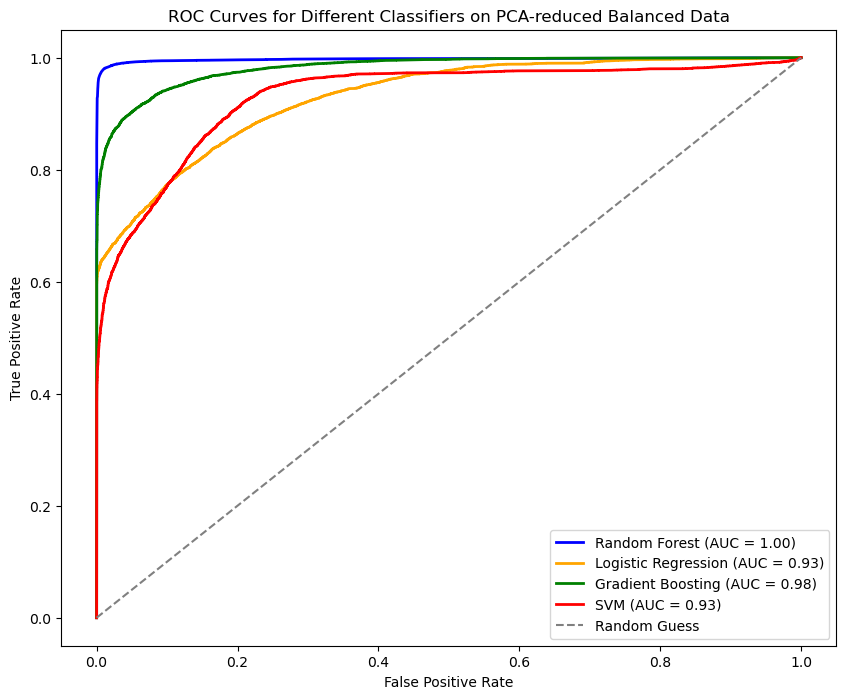

In [138]:
# Creating a plot to compare ROC curves of multiple classifiers on balanced PCA-reduced data
classifiers = [rf_classifier_pca_balanced, lr_classifier_pca_balanced, gb_classifier_pca_balanced, svm_classifier_pca_balanced]
reduced_data = [X_test_pca_balanced] * len(classifiers)  
labels = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 8))

#Plotting the ROC curve for Random Forest classifier
y_proba_rf = rf_classifier_pca_balanced.predict_proba(X_test_pca_balanced)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

#Plotting the ROC curve for Logistic Regression classifier
y_proba_lr = lr_classifier_pca_balanced.predict_proba(X_test_pca_balanced)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

#Plotting the ROC curve for Gradient Boosting classifier
y_proba_gb = gb_classifier_pca_balanced.predict_proba(X_test_pca_balanced)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# SVM classifier
y_decision_svm = svm_classifier_pca_balanced.decision_function(X_test_pca_balanced)
y_proba_svm = (y_decision_svm - y_decision_svm.min()) / (y_decision_svm.max() - y_decision_svm.min())
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess') #Plot random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers on PCA-reduced Balanced Data')
plt.legend()
plt.savefig("ROC_Curves_PCA_Balanced.png")
plt.show()


# Apply LDA (Linear Discriminant Analysis)

In [273]:
lda_balanced = LinearDiscriminantAnalysis()
# Fit and transform the training data
X_train_lda_balanced = lda_balanced.fit_transform(X_train, y_train)

# Fit and transform the testing data
X_test_lda_balanced = lda_balanced.transform(X_test)

In [272]:
print("Number of features:", X_train.shape[1])
print("Number of unique classes:", len(np.unique(y_train)))


Number of features: 19
Number of unique classes: 2


## Visualizing the Kernel Density for each Class in low dimensionality space

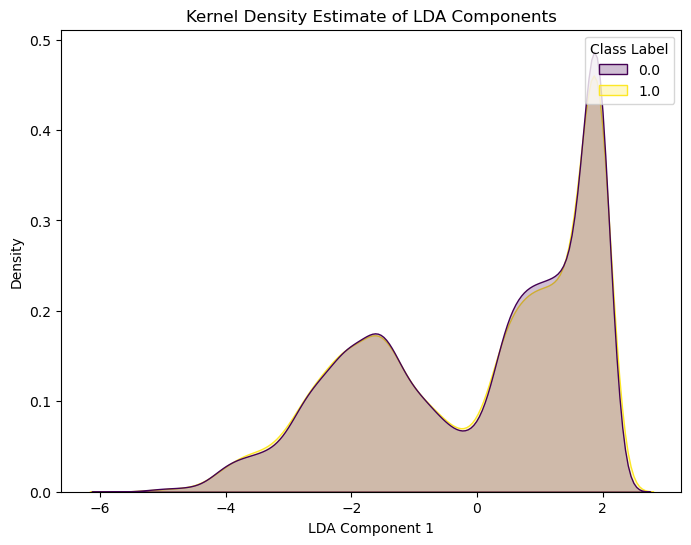

In [288]:
# Create a DataFrame with the transformed data and class labels
lda_df = pd.DataFrame(data=X_train_lda_balanced, columns=['LDA Component'])
lda_df['Class Label'] = y_train

# Plot kernel density estimate for each class
plt.figure(figsize=(8, 6))
sns.kdeplot(data=lda_df, x='LDA Component', hue='Class Label', common_norm=False, palette='viridis', fill=True)
plt.title('Kernel Density Estimate of LDA Components')
plt.xlabel('LDA Component 1')
plt.ylabel('Density')
plt.show()


# 21. Random Forest on LDA-reduced balanced data

In [140]:
#Creating a Random Forest classifier with 100 estimators and a fixed random state for balanced LDA-reduced data
rf_classifier_lda_balanced = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the reduced data
start_time_rf_lda_balanced = time.time()
rf_classifier_lda_balanced.fit(X_train_lda_balanced, y_train)
end_time_rf_lda_balanced = time.time()

# Make predictions on the testing data
y_pred_rf_lda_balanced = rf_classifier_lda_balanced.predict(X_test_lda_balanced)

# Evaluate the RF model on LDA-reduced balanced data
accuracy_rf_lda_balanced = accuracy_score(y_test, y_pred_rf_lda_balanced)
conf_matrix_rf_lda_balanced = confusion_matrix(y_test, y_pred_rf_lda_balanced)
classification_rep_rf_lda_balanced = classification_report(y_test, y_pred_rf_lda_balanced)

print("Random Forest on LDA-reduced Balanced Data:")
print("Accuracy:", accuracy_rf_lda_balanced)
print("Confusion Matrix:\n", conf_matrix_rf_lda_balanced)
print("Classification Report:\n", classification_rep_rf_lda_balanced)

Random Forest on LDA-reduced Balanced Data:
Accuracy: 0.9170442893526941
Confusion Matrix:
 [[13960  1039]
 [ 1469 13765]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     14999
           1       0.93      0.90      0.92     15234

    accuracy                           0.92     30233
   macro avg       0.92      0.92      0.92     30233
weighted avg       0.92      0.92      0.92     30233



### Measure the training time

In [141]:
training_time_rf_lda_balanced = end_time_rf_lda_balanced - start_time_rf_lda_balanced
print("RF Training Time on LDA-reduced Balanced Data:", training_time_rf_lda_balanced, "seconds")

RF Training Time on LDA-reduced Balanced Data: 12.183305501937866 seconds


### Learning Curve for RF on LDA-reduced balanced data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


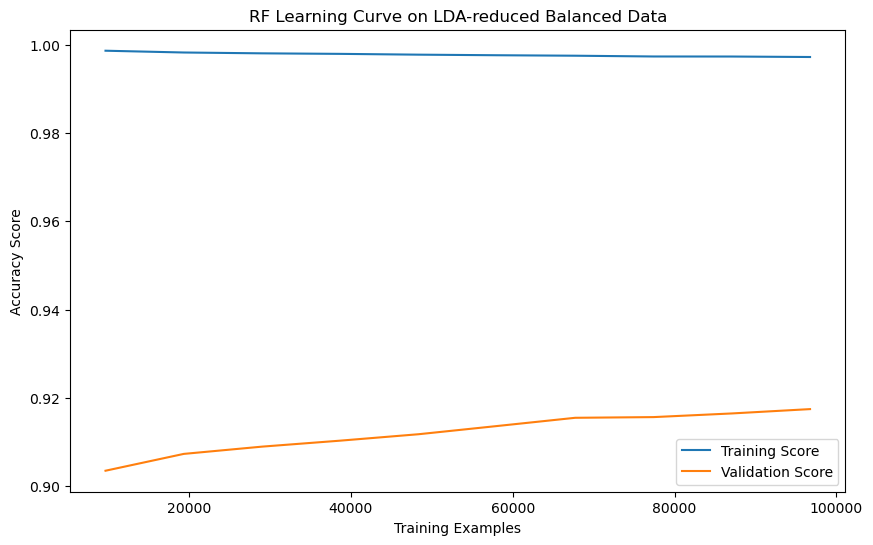

In [142]:
train_sizes_rf_lda_balanced, train_scores_rf_lda_balanced, test_scores_rf_lda_balanced = learning_curve(
    rf_classifier_lda_balanced, 
    X_train_lda_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf_lda_balanced, np.mean(train_scores_rf_lda_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_rf_lda_balanced, np.mean(test_scores_rf_lda_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("RF Learning Curve on LDA-reduced Balanced Data")
plt.legend()
plt.savefig("RF Learning Curve on LDA-reduced Balanced Data.png")
plt.show()

### ROC curve for RF with LDA on Balanced Data

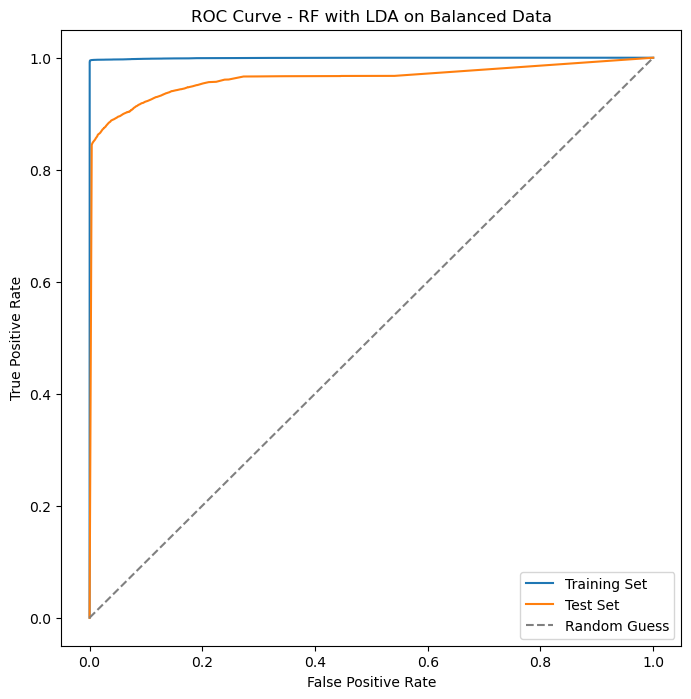

In [143]:
#Generating predicted probabilities for the balanced Random Forest classifier on the training and test sets with LDA reduction
y_train_rf_lda_balanced = rf_classifier_lda_balanced.predict_proba(X_train_lda_balanced)[:, 1]
y_test_rf_lda_balanced = rf_classifier_lda_balanced.predict_proba(X_test_lda_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_rf_lda_balanced, tpr_train_rf_lda_balanced, thresholds_train_rf_lda_balanced = roc_curve(y_train, y_train_rf_lda_balanced)

# Calculate ROC curve for test set
fpr_test_rf_lda_balanced, tpr_test_rf_lda_balanced, thresholds_test_rf_lda_balanced = roc_curve(y_test, y_test_rf_lda_balanced)

# Plot ROC curve for RF with LDA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_rf_lda_balanced, tpr_train_rf_lda_balanced, label='Training Set')
plt.plot(fpr_test_rf_lda_balanced, tpr_test_rf_lda_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RF with LDA on Balanced Data')
plt.legend()
plt.savefig("ROC_RF_LDA_Balanced.png")
plt.show()

# 22. Logistic Regression on LDA-reduced balanced data

In [144]:
#Creating a Logistic Regression classifier with a fixed random state for balanced LDA-reduced data
lr_classifier_lda_balanced = LogisticRegression(random_state=0)

# Train the model on the reduced data
start_time_lr_lda_balanced = time.time()
lr_classifier_lda_balanced.fit(X_train_lda_balanced, y_train)
end_time_lr_lda_balanced = time.time()

# Make predictions on the testing data
y_pred_lr_lda_balanced = lr_classifier_lda_balanced.predict(X_test_lda_balanced)

# Evaluate the LR model on LDA-reduced balanced data
accuracy_lr_lda_balanced = accuracy_score(y_test, y_pred_lr_lda_balanced)
conf_matrix_lr_lda_balanced = confusion_matrix(y_test, y_pred_lr_lda_balanced)
classification_rep_lr_lda_balanced = classification_report(y_test, y_pred_lr_lda_balanced)

print("Logistic Regression on LDA-reduced Balanced Data:")
print("Accuracy:", accuracy_lr_lda_balanced)
print("Confusion Matrix:\n", conf_matrix_lr_lda_balanced)
print("Classification Report:\n", classification_rep_lr_lda_balanced)

Logistic Regression on LDA-reduced Balanced Data:
Accuracy: 0.9236595772831012
Confusion Matrix:
 [[14222   777]
 [ 1531 13703]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     14999
           1       0.95      0.90      0.92     15234

    accuracy                           0.92     30233
   macro avg       0.92      0.92      0.92     30233
weighted avg       0.92      0.92      0.92     30233



### Measure the training time

In [145]:
training_time_lr_lda_balanced = end_time_lr_lda_balanced - start_time_lr_lda_balanced
print("LR Training Time on LDA-reduced Balanced Data:", training_time_lr_lda_balanced, "seconds")

LR Training Time on LDA-reduced Balanced Data: 0.0776071548461914 seconds


### Learning Curve for LR on LDA-reduced balanced data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


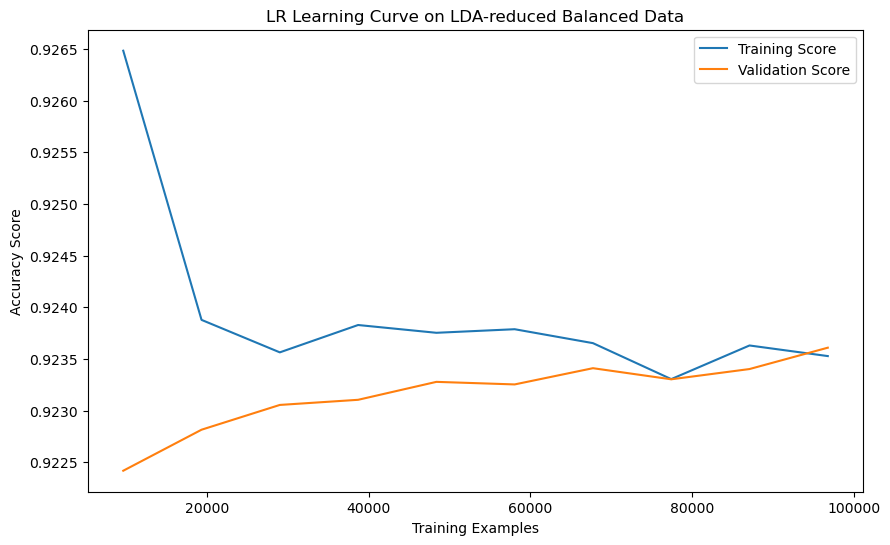

In [146]:
train_sizes_lr_lda_balanced, train_scores_lr_lda_balanced, test_scores_lr_lda_balanced = learning_curve(
    lr_classifier_lda_balanced, 
    X_train_lda_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr_lda_balanced, np.mean(train_scores_lr_lda_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_lr_lda_balanced, np.mean(test_scores_lr_lda_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("LR Learning Curve on LDA-reduced Balanced Data")
plt.legend()
plt.savefig("LR Learning Curve on LDA-reduced Balanced Data.png")
plt.show()

### ROC curve for LR with LDA on Balanced Data

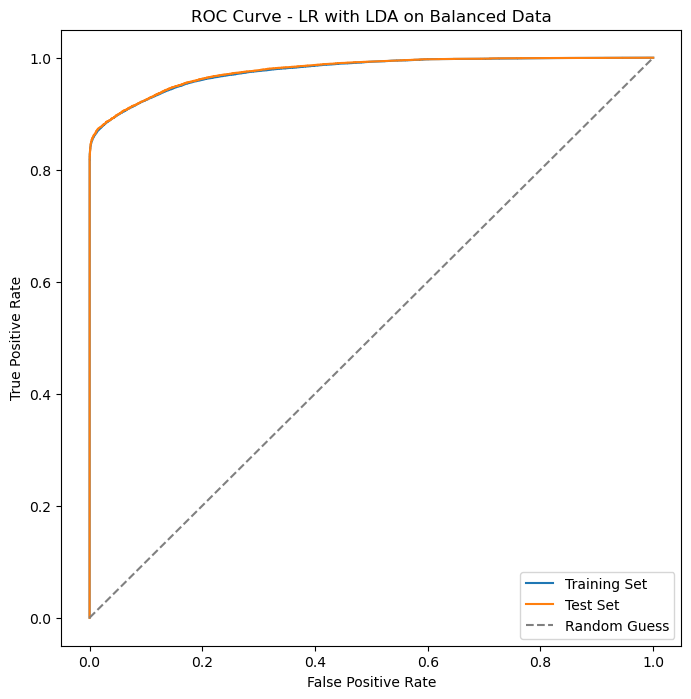

In [147]:
# Generating predicted probabilities for the balanced Logistic Regression classifier on the training and test sets with LDA reduction
y_train_lr_lda_balanced = lr_classifier_lda_balanced.predict_proba(X_train_lda_balanced)[:, 1]
y_test_lr_lda_balanced = lr_classifier_lda_balanced.predict_proba(X_test_lda_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_lr_lda_balanced, tpr_train_lr_lda_balanced, thresholds_train_lr_lda_balanced = roc_curve(y_train, y_train_lr_lda_balanced)

# Calculate ROC curve for test set
fpr_test_lr_lda_balanced, tpr_test_lr_lda_balanced, thresholds_test_lr_lda_balanced = roc_curve(y_test, y_test_lr_lda_balanced)

# Plot ROC curve for LR with LDA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_lr_lda_balanced, tpr_train_lr_lda_balanced, label='Training Set')
plt.plot(fpr_test_lr_lda_balanced, tpr_test_lr_lda_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR with LDA on Balanced Data')
plt.legend()
plt.savefig("ROC_LR_LDA_Balanced.png")
plt.show()


# 23. Gradient Boosting on LDA-reduced balanced data

In [148]:
#Creating a Gradient Boosting classifier with 100 estimators and a fixed random state for balanced LDA-reduced data
gb_classifier_lda_balanced = GradientBoostingClassifier(random_state=0, n_estimators=100)

# Train the model on the reduced data
start_time_gb_lda_balanced = time.time()
gb_classifier_lda_balanced.fit(X_train_lda_balanced, y_train)
end_time_gb_lda_balanced = time.time()

# Make predictions on the testing data
y_pred_gb_lda_balanced = gb_classifier_lda_balanced.predict(X_test_lda_balanced)

# Evaluate the GB model on LDA-reduced balanced data
accuracy_gb_lda_balanced = accuracy_score(y_test, y_pred_gb_lda_balanced)
conf_matrix_gb_lda_balanced = confusion_matrix(y_test, y_pred_gb_lda_balanced)
classification_rep_gb_lda_balanced = classification_report(y_test, y_pred_gb_lda_balanced)

print("Gradient Boosting on LDA-reduced Balanced Data:")
print("Accuracy:", accuracy_gb_lda_balanced)
print("Confusion Matrix:\n", conf_matrix_gb_lda_balanced)
print("Classification Report:\n", classification_rep_gb_lda_balanced)

Gradient Boosting on LDA-reduced Balanced Data:
Accuracy: 0.9284556610326464
Confusion Matrix:
 [[14742   257]
 [ 1906 13328]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     14999
           1       0.98      0.87      0.92     15234

    accuracy                           0.93     30233
   macro avg       0.93      0.93      0.93     30233
weighted avg       0.93      0.93      0.93     30233



### Measure the training time

In [149]:
training_time_gb_lda_balanced = end_time_gb_lda_balanced - start_time_gb_lda_balanced
print("GB Training Time on LDA-reduced Balanced Data:", training_time_gb_lda_balanced, "seconds")

GB Training Time on LDA-reduced Balanced Data: 6.4219441413879395 seconds


### Learning Curve for GB on LDA-reduced balanced data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.1s finished


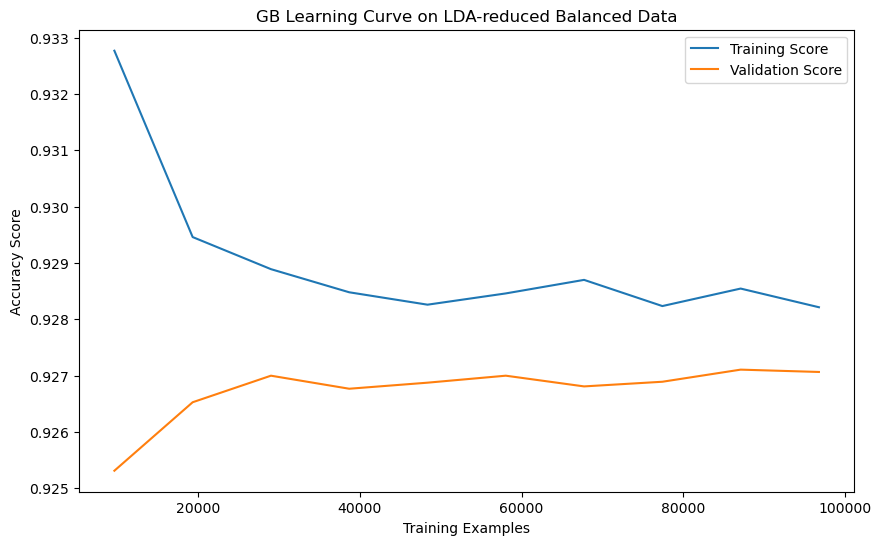

In [150]:
train_sizes_gb_lda_balanced, train_scores_gb_lda_balanced, test_scores_gb_lda_balanced = learning_curve(
    gb_classifier_lda_balanced, 
    X_train_lda_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb_lda_balanced, np.mean(train_scores_gb_lda_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_gb_lda_balanced, np.mean(test_scores_gb_lda_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("GB Learning Curve on LDA-reduced Balanced Data")
plt.legend()
plt.savefig("GB Learning Curve on LDA-reduced Balanced Data.png")
plt.show()

### ROC curve for GB with LDA on Balanced Data

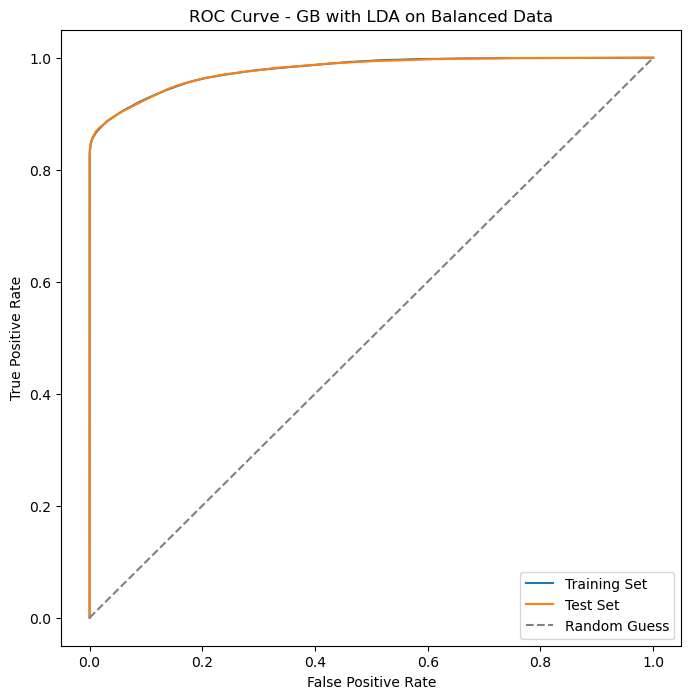

In [151]:
#Generating predicted probabilities for the balanced Gradient Boosting classifier on the training and test sets with LDA reduction
y_train_gb_lda_balanced = gb_classifier_lda_balanced.predict_proba(X_train_lda_balanced)[:, 1]
y_test_gb_lda_balanced = gb_classifier_lda_balanced.predict_proba(X_test_lda_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_gb_lda_balanced, tpr_train_gb_lda_balanced, thresholds_train_gb_lda_balanced = roc_curve(y_train, y_train_gb_lda_balanced)

# Calculate ROC curve for test set
fpr_test_gb_lda_balanced, tpr_test_gb_lda_balanced, thresholds_test_gb_lda_balanced = roc_curve(y_test, y_test_gb_lda_balanced)

# Plot ROC curve for GB with LDA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_gb_lda_balanced, tpr_train_gb_lda_balanced, label='Training Set')
plt.plot(fpr_test_gb_lda_balanced, tpr_test_gb_lda_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GB with LDA on Balanced Data')
plt.legend()
plt.savefig("ROC_GB_LDA_Balanced.png")
plt.show()


# 24. Support Vector Machine on LDA-reduced balanced data

In [152]:
# Creating a Support Vector Machine classifier with a fixed random state for balanced LDA-reduced data
svm_classifier_lda_balanced = SVC(random_state=0)

# Train the model on the reduced data
start_time_svm_lda_balanced = time.time()
svm_classifier_lda_balanced.fit(X_train_lda_balanced, y_train)
end_time_svm_lda_balanced = time.time()

# Make predictions on the testing data
y_pred_svm_lda_balanced = svm_classifier_lda_balanced.predict(X_test_lda_balanced)

# Evaluate the SVM model on LDA-reduced balanced data
accuracy_svm_lda_balanced = accuracy_score(y_test, y_pred_svm_lda_balanced)
conf_matrix_svm_lda_balanced = confusion_matrix(y_test, y_pred_svm_lda_balanced)
classification_rep_svm_lda_balanced = classification_report(y_test, y_pred_svm_lda_balanced)

print("Support Vector Machine on LDA-reduced Balanced Data:")
print("Accuracy:", accuracy_svm_lda_balanced)
print("Confusion Matrix:\n", conf_matrix_svm_lda_balanced)
print("Classification Report:\n", classification_rep_svm_lda_balanced)

Support Vector Machine on LDA-reduced Balanced Data:
Accuracy: 0.927959514437866
Confusion Matrix:
 [[14820   179]
 [ 1999 13235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     14999
           1       0.99      0.87      0.92     15234

    accuracy                           0.93     30233
   macro avg       0.93      0.93      0.93     30233
weighted avg       0.93      0.93      0.93     30233



### Measure the training time

In [153]:
training_time_svm_lda_balanced = end_time_svm_lda_balanced - start_time_svm_lda_balanced
print("SVM Training Time on LDA-reduced Balanced Data:", training_time_svm_lda_balanced, "seconds")

SVM Training Time on LDA-reduced Balanced Data: 170.2119424343109 seconds


### Learning Curve for SVM on LDA-reduced balanced data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 39.0min finished


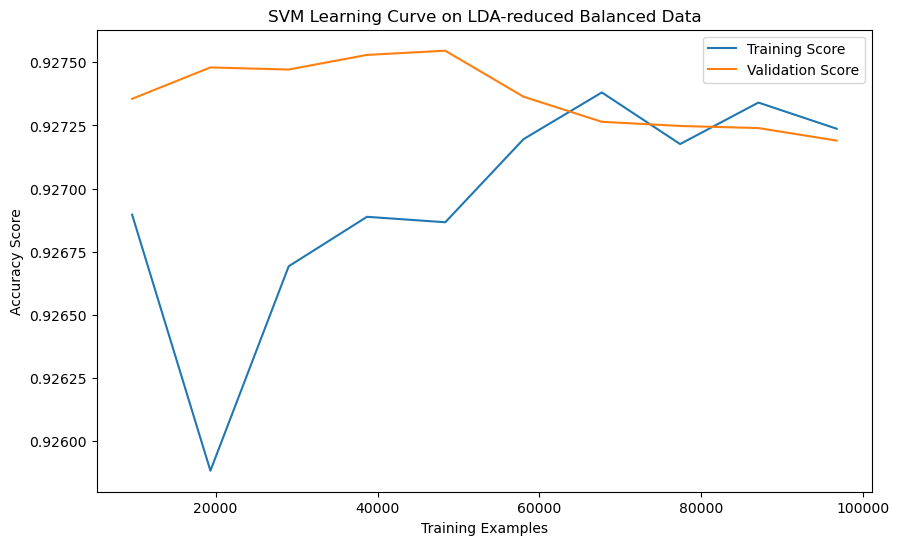

In [154]:
train_sizes_svm_lda_balanced, train_scores_svm_lda_balanced, test_scores_svm_lda_balanced = learning_curve(
    svm_classifier_lda_balanced, 
    X_train_lda_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm_lda_balanced, np.mean(train_scores_svm_lda_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_svm_lda_balanced, np.mean(test_scores_svm_lda_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("SVM Learning Curve on LDA-reduced Balanced Data")
plt.legend()
plt.savefig("SVM Learning Curve on LDA-reduced Balanced Data.png")
plt.show()

### ROC curve for SVM with LDA on Balanced Data

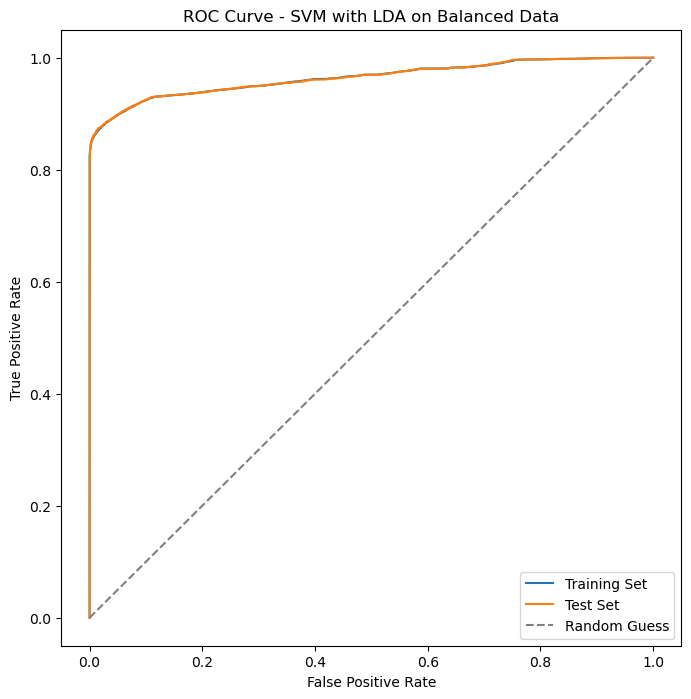

In [155]:
# Generating decision function scores for the balanced SVM classifier on the training and test sets with LDA reduction
y_train_svm_lda_balanced = svm_classifier_lda_balanced.decision_function(X_train_lda_balanced)
y_test_svm_lda_balanced = svm_classifier_lda_balanced.decision_function(X_test_lda_balanced)

# Calculate ROC curve for training set
fpr_train_svm_lda_balanced, tpr_train_svm_lda_balanced, thresholds_train_svm_lda_balanced = roc_curve(y_train, y_train_svm_lda_balanced)

# Calculate ROC curve for test set
fpr_test_svm_lda_balanced, tpr_test_svm_lda_balanced, thresholds_test_svm_lda_balanced = roc_curve(y_test, y_test_svm_lda_balanced)

# Plot ROC curve for SVM with LDA on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_svm_lda_balanced, tpr_train_svm_lda_balanced, label='Training Set')
plt.plot(fpr_test_svm_lda_balanced, tpr_test_svm_lda_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM with LDA on Balanced Data')
plt.legend()
plt.savefig("ROC_SVM_LDA_Balanced.png")
plt.show()


## ROC/AUC Scores for different classifiers on LDA reduced data

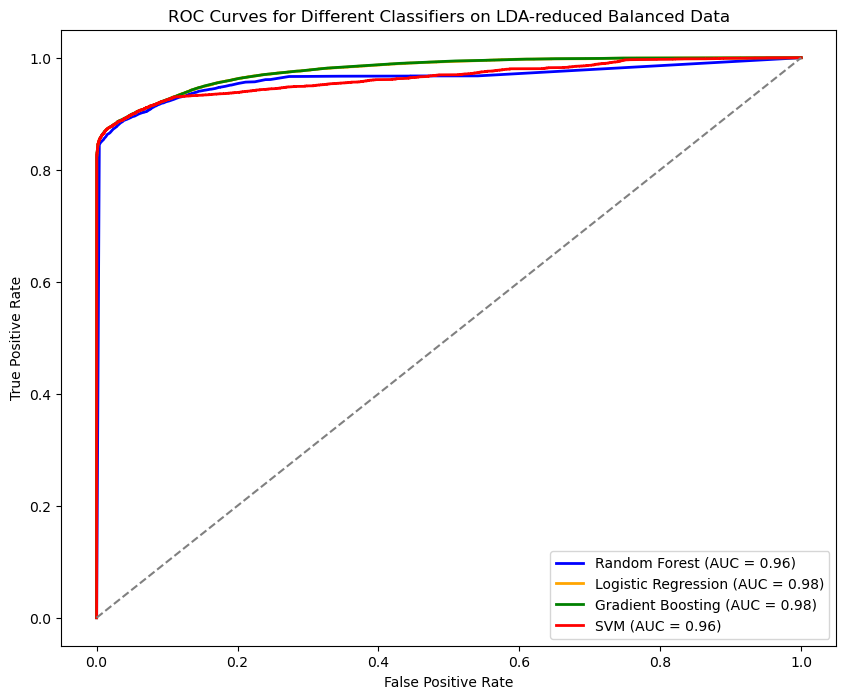

In [156]:
def plot_roc_curve_for_classifier(classifier, X, y, label, color):
    if hasattr(classifier, "predict_proba"):
        y_proba = classifier.predict_proba(X)[:, 1]
    elif hasattr(classifier, "decision_function"):
        y_decision = classifier.decision_function(X)
        y_proba = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())
    else:
        raise ValueError("Classifier does not have predict_proba or decision_function")

    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})', color=color)

classifiers = [rf_classifier_lda_balanced, lr_classifier_lda_balanced, gb_classifier_lda_balanced, svm_classifier_lda_balanced]
reduced_data = [X_test_lda_balanced] * len(classifiers)  # Assuming you are plotting for the test set
labels = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 8))

for classifier, X, label, color in zip(classifiers, reduced_data, labels, colors):
    plot_roc_curve_for_classifier(classifier, X, y_test, label, color)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers on LDA-reduced Balanced Data')
plt.legend()
plt.savefig("ROC_Curves_LDA_Balanced.png")
plt.show()


# UMAP(Uniform Manifold Approximation and Projection)

In [157]:
#pip install umap-learn

In [158]:
from umap import UMAP

In [286]:
n_components_umap_balanced = 10  
umap_balanced = UMAP(n_components=n_components_umap_balanced, random_state=0)

# Fit and transform the training data
X_train_umap_balanced = umap_balanced.fit_transform(X_train)

# Transform the testing data
X_test_umap_balanced = umap_balanced.transform(X_test)

# 25. Random Forest Classifier with UMAP on Balanced Data

In [289]:
#Creating a Random Forest classifier with 100 estimators and a fixed random state for balanced UMAP-reduced data
rf_classifier_umap_balanced = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the UMAP-reduced data
start_time_rf_umap_balanced = time.time()
rf_classifier_umap_balanced.fit(X_train_umap_balanced, y_train)
end_time_rf_umap_balanced = time.time()

# Make predictions on the testing data
y_pred_rf_umap_balanced = rf_classifier_umap_balanced.predict(X_test_umap_balanced)

# Evaluate the RFC model on UMAP-reduced data
accuracy_rf_umap_balanced = accuracy_score(y_test, y_pred_rf_umap_balanced)
conf_matrix_rf_umap_balanced = confusion_matrix(y_test, y_pred_rf_umap_balanced)
classification_rep_rf_umap_balanced = classification_report(y_test, y_pred_rf_umap_balanced)

print("Random Forest Classifier Model with UMAP on Balanced Data:")
print("Accuracy:", accuracy_rf_umap_balanced)
print("Confusion Matrix:\n", conf_matrix_rf_umap_balanced)
print("Classification Report:\n", classification_rep_rf_umap_balanced)

Random Forest Classifier Model with UMAP on Balanced Data:
Accuracy: 0.9115205239308041
Confusion Matrix:
 [[14035   964]
 [ 1711 13523]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     14999
           1       0.93      0.89      0.91     15234

    accuracy                           0.91     30233
   macro avg       0.91      0.91      0.91     30233
weighted avg       0.91      0.91      0.91     30233



### Calculate the training time

In [293]:
training_time_rf_umap_balanced = end_time_rf_umap_balanced - start_time_rf_umap_balanced
print("RFC Training Time with UMAP on Balanced Data:", training_time_rf_umap_balanced, "seconds")

RFC Training Time with UMAP on Balanced Data: 42.90774917602539 seconds


### Plot the learning curve for Random Forest Classifier with UMAP on Balanced Data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.1min finished


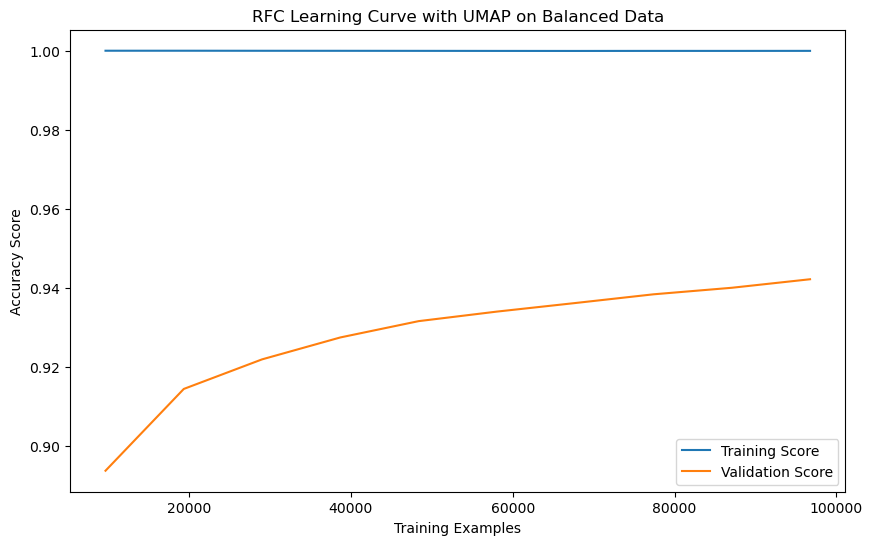

In [294]:
train_sizes_rf_umap_balanced, train_scores_rf_umap_balanced, test_scores_rf_umap_balanced = learning_curve(
    rf_classifier_umap_balanced, 
    X_train_umap_balanced, 
    y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)

# Plot the learning curve for Random Forest Classifier with UMAP on Balanced Data
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf_umap_balanced, np.mean(train_scores_rf_umap_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_rf_umap_balanced, np.mean(test_scores_rf_umap_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("RFC Learning Curve with UMAP on Balanced Data")
plt.legend()
plt.savefig("RFC Learning Curve with UMAP on Balanced Data.png")
plt.show()

### ROC curve for RFC with UMAP on Balanced Data

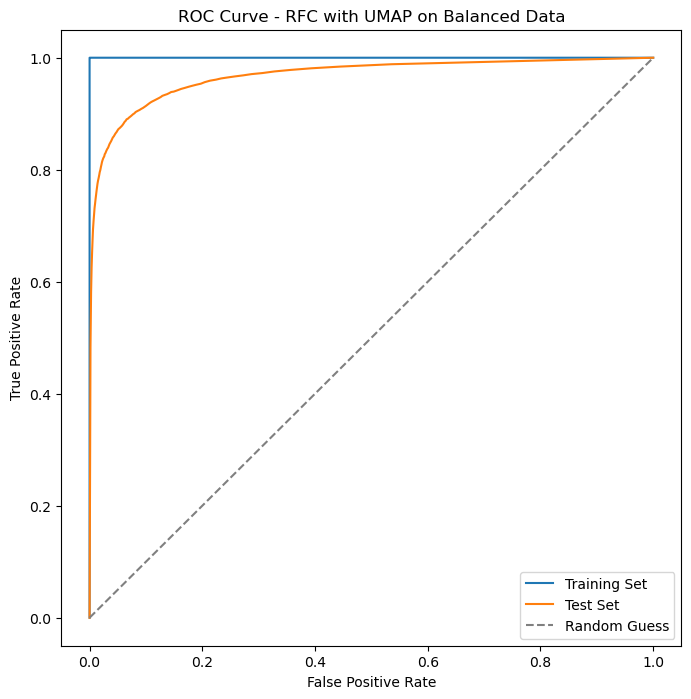

In [295]:
# Generating predicted probabilities for the balanced Random Forest classifier on the training and test sets with UMAP reduction
y_train_rf_umap_balanced = rf_classifier_umap_balanced.predict_proba(X_train_umap_balanced)[:, 1]
y_test_rf_umap_balanced = rf_classifier_umap_balanced.predict_proba(X_test_umap_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_rf_umap_balanced, tpr_train_rf_umap_balanced, thresholds_train_rf_umap_balanced = roc_curve(y_train, y_train_rf_umap_balanced)

# Calculate ROC curve for test set
fpr_test_rf_umap_balanced, tpr_test_rf_umap_balanced, thresholds_test_rf_umap_balanced = roc_curve(y_test, y_test_rf_umap_balanced)

# Plot ROC curve for RFC with UMAP on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_rf_umap_balanced, tpr_train_rf_umap_balanced, label='Training Set')
plt.plot(fpr_test_rf_umap_balanced, tpr_test_rf_umap_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RFC with UMAP on Balanced Data')
plt.legend()
plt.savefig("ROC_RFC_UMAP_Balanced.png")
plt.show()


# 26. Logistic Regression on UMAP-reduced balanced data

In [296]:
#Creating a Logistic Regression classifier with a fixed random state and increased maximum iterations for balanced UMAP-reduced data
lr_classifier_umap_balanced = LogisticRegression(random_state=0, max_iter=1000)

# Train the model on the reduced data
start_time_lr_umap_balanced = time.time()
lr_classifier_umap_balanced.fit(X_train_umap_balanced, y_train)
end_time_lr_umap_balanced = time.time()

# Make predictions on the testing data
y_pred_lr_umap_balanced = lr_classifier_umap_balanced.predict(X_test_umap_balanced)

# Evaluate the LR model on UMAP-reduced balanced data
accuracy_lr_umap_balanced = accuracy_score(y_test, y_pred_lr_umap_balanced)
conf_matrix_lr_umap_balanced = confusion_matrix(y_test, y_pred_lr_umap_balanced)
classification_rep_lr_umap_balanced = classification_report(y_test, y_pred_lr_umap_balanced)

print("Logistic Regression on UMAP-reduced Balanced Data:")
print("Accuracy:", accuracy_lr_umap_balanced)
print("Confusion Matrix:\n", conf_matrix_lr_umap_balanced)
print("Classification Report:\n", classification_rep_lr_umap_balanced)

Logistic Regression on UMAP-reduced Balanced Data:
Accuracy: 0.7009559091059439
Confusion Matrix:
 [[ 9300  5699]
 [ 3342 11892]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.67     14999
           1       0.68      0.78      0.72     15234

    accuracy                           0.70     30233
   macro avg       0.71      0.70      0.70     30233
weighted avg       0.71      0.70      0.70     30233



### Measure the training time

In [297]:
training_time_lr_umap_balanced = end_time_lr_umap_balanced - start_time_lr_umap_balanced
print("LR Training Time on UMAP-reduced Balanced Data:", training_time_lr_umap_balanced, "seconds")

LR Training Time on UMAP-reduced Balanced Data: 0.2887308597564697 seconds


### Plot the learning curve for Logistic Regression with UMAP on Balanced Data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


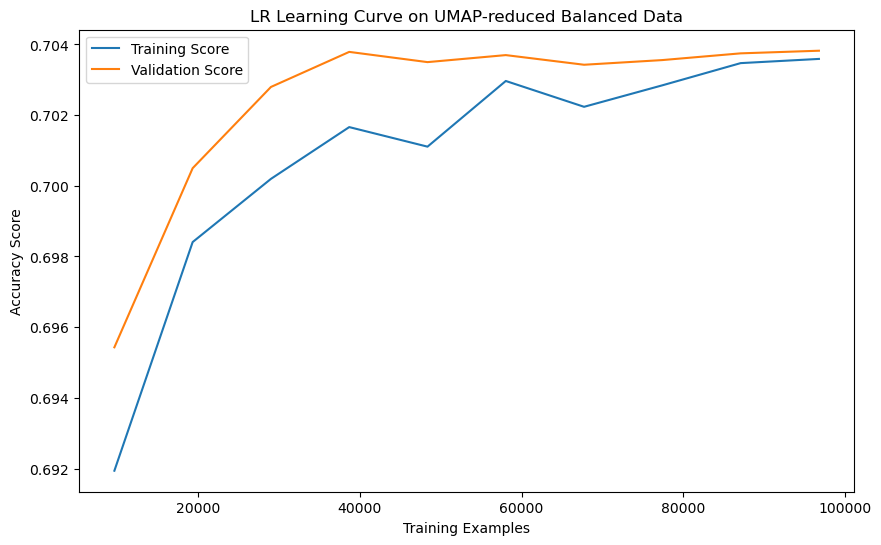

In [298]:
# Learning Curve for LR on UMAP-reduced balanced data
train_sizes_lr_umap_balanced, train_scores_lr_umap_balanced, test_scores_lr_umap_balanced = learning_curve(
    lr_classifier_umap_balanced, 
    X_train_umap_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr_umap_balanced, np.mean(train_scores_lr_umap_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_lr_umap_balanced, np.mean(test_scores_lr_umap_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("LR Learning Curve on UMAP-reduced Balanced Data")
plt.legend()
plt.savefig("LR Learning Curve on UMAP-reduced Balanced Data.png")
plt.show()

### ROC curve for LR with UMAP on Balanced Data

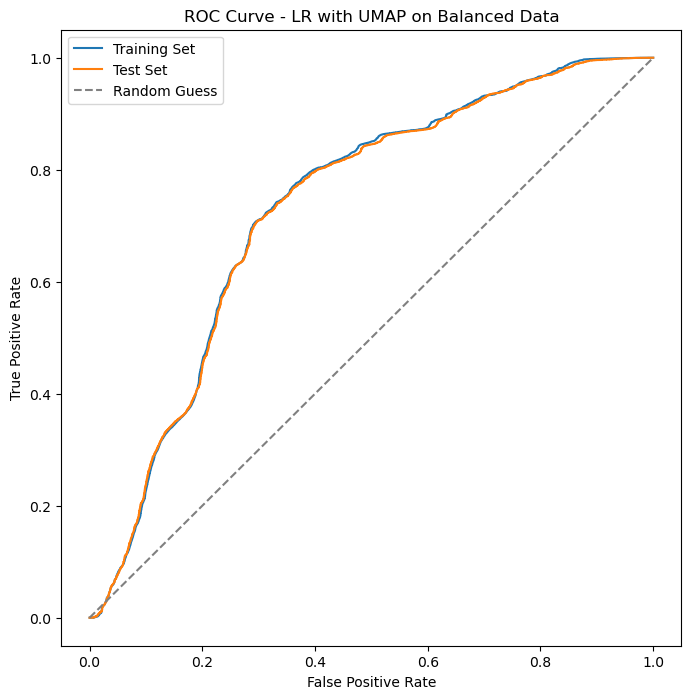

In [299]:
# Generating predicted probabilities for the balanced Logistic Regression classifier on the training and test sets with UMAP reduction
y_train_lr_umap_balanced = lr_classifier_umap_balanced.predict_proba(X_train_umap_balanced)[:, 1]
y_test_lr_umap_balanced = lr_classifier_umap_balanced.predict_proba(X_test_umap_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_lr_umap_balanced, tpr_train_lr_umap_balanced, thresholds_train_lr_umap_balanced = roc_curve(y_train, y_train_lr_umap_balanced)

# Calculate ROC curve for test set
fpr_test_lr_umap_balanced, tpr_test_lr_umap_balanced, thresholds_test_lr_umap_balanced = roc_curve(y_test, y_test_lr_umap_balanced)

# Plot ROC curve for LR with UMAP on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_lr_umap_balanced, tpr_train_lr_umap_balanced, label='Training Set')
plt.plot(fpr_test_lr_umap_balanced, tpr_test_lr_umap_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR with UMAP on Balanced Data')
plt.legend()
plt.savefig("ROC_LR_UMAP_Balanced.png")
plt.show()


# 27. Gradient Boosting on UMAP-reduced balanced data

In [300]:
# Creating a Gradient Boosting classifier with 100 estimators and a fixed random state for balanced UMAP-reduced data
gb_classifier_umap_balanced = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Train the model on the reduced data
start_time_gb_umap_balanced = time.time()
gb_classifier_umap_balanced.fit(X_train_umap_balanced, y_train)
end_time_gb_umap_balanced = time.time()

# Make predictions on the testing data
y_pred_gb_umap_balanced = gb_classifier_umap_balanced.predict(X_test_umap_balanced)

# Evaluate the GB model on UMAP-reduced balanced data
accuracy_gb_umap_balanced = accuracy_score(y_test, y_pred_gb_umap_balanced)
conf_matrix_gb_umap_balanced = confusion_matrix(y_test, y_pred_gb_umap_balanced)
classification_rep_gb_umap_balanced = classification_report(y_test, y_pred_gb_umap_balanced)

print("Gradient Boosting on UMAP-reduced Balanced Data:")
print("Accuracy:", accuracy_gb_umap_balanced)
print("Confusion Matrix:\n", conf_matrix_gb_umap_balanced)
print("Classification Report:\n", classification_rep_gb_umap_balanced)

Gradient Boosting on UMAP-reduced Balanced Data:
Accuracy: 0.8320047630073099
Confusion Matrix:
 [[11574  3425]
 [ 1654 13580]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82     14999
           1       0.80      0.89      0.84     15234

    accuracy                           0.83     30233
   macro avg       0.84      0.83      0.83     30233
weighted avg       0.84      0.83      0.83     30233



### Plotting out the confusion Matrix

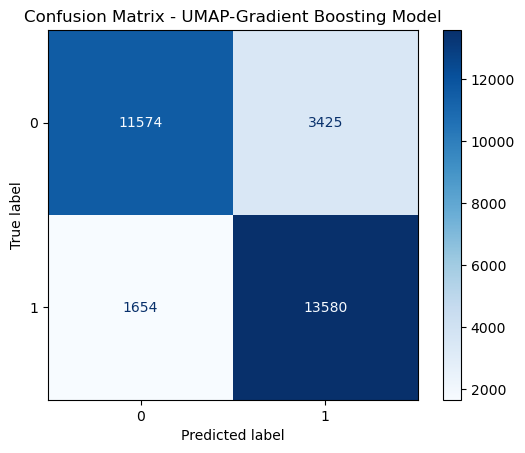

In [301]:
disp = plot_confusion_matrix(gb_classifier_umap_balanced, X_test_umap_balanced, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - UMAP-Gradient Boosting Model')
plt.grid(False)
plt.savefig("Confusion Matrix - UMAP-Gradient Boosting Model.png")
plt.show()

### Measure the training time

In [302]:
training_time_gb_umap_balanced = end_time_gb_umap_balanced - start_time_gb_umap_balanced
print("GB Training Time on UMAP-reduced Balanced Data:", training_time_gb_umap_balanced, "seconds")

GB Training Time on UMAP-reduced Balanced Data: 43.514928340911865 seconds


### Learning Curve for GB on UMAP-reduced balanced data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


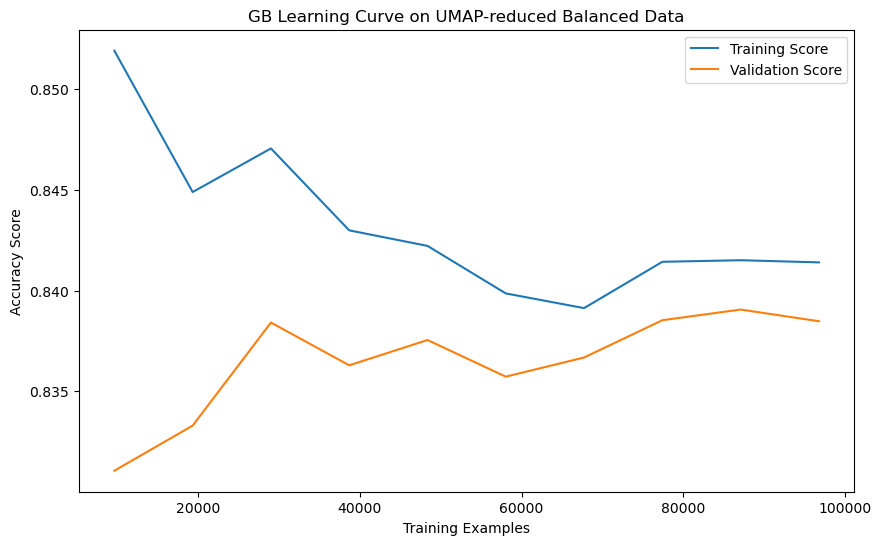

In [303]:
train_sizes_gb_umap_balanced, train_scores_gb_umap_balanced, test_scores_gb_umap_balanced = learning_curve(
    gb_classifier_umap_balanced, 
    X_train_umap_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)

# Plot the learning curve for Gradient Boosting with UMAP on Balanced Data
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb_umap_balanced, np.mean(train_scores_gb_umap_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_gb_umap_balanced, np.mean(test_scores_gb_umap_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("GB Learning Curve on UMAP-reduced Balanced Data")
plt.legend()
plt.savefig("GB Learning Curve on UMAP-reduced Balanced Data.png")
plt.show()

### ROC curve for GB with UMAP on Balanced Data

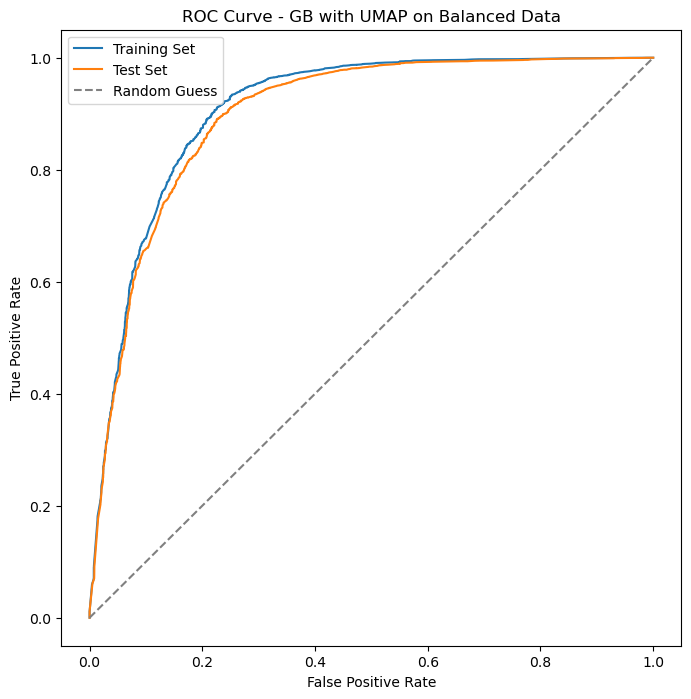

In [304]:
# Generating predicted probabilities for the balanced Gradient Boosting classifier on the training and test sets with UMAP reduction
y_train_gb_umap_balanced = gb_classifier_umap_balanced.predict_proba(X_train_umap_balanced)[:, 1]
y_test_gb_umap_balanced = gb_classifier_umap_balanced.predict_proba(X_test_umap_balanced)[:, 1]

# Calculate ROC curve for training set
fpr_train_gb_umap_balanced, tpr_train_gb_umap_balanced, thresholds_train_gb_umap_balanced = roc_curve(y_train, y_train_gb_umap_balanced)

# Calculate ROC curve for test set
fpr_test_gb_umap_balanced, tpr_test_gb_umap_balanced, thresholds_test_gb_umap_balanced = roc_curve(y_test, y_test_gb_umap_balanced)

# Plot ROC curve for GB with UMAP on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_gb_umap_balanced, tpr_train_gb_umap_balanced, label='Training Set')
plt.plot(fpr_test_gb_umap_balanced, tpr_test_gb_umap_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GB with UMAP on Balanced Data')
plt.legend()
plt.savefig("ROC_GB_UMAP_Balanced.png")
plt.show()


# 28. Support Vector Machine on UMAP-reduced balanced data

In [305]:
# Creating a Support Vector Machine classifier with radial basis function kernel and a fixed random state for balanced UMAP-reduced data
svm_classifier_umap_balanced = SVC(kernel='rbf', random_state=0)

# Train the model on the reduced data
start_time_svm_umap_balanced = time.time()
svm_classifier_umap_balanced.fit(X_train_umap_balanced, y_train)
end_time_svm_umap_balanced = time.time()

# Make predictions on the testing data
y_pred_svm_umap_balanced = svm_classifier_umap_balanced.predict(X_test_umap_balanced)

# Evaluate the SVM model on UMAP-reduced balanced data
accuracy_svm_umap_balanced = accuracy_score(y_test, y_pred_svm_umap_balanced)
conf_matrix_svm_umap_balanced = confusion_matrix(y_test, y_pred_svm_umap_balanced)
classification_rep_svm_umap_balanced = classification_report(y_test, y_pred_svm_umap_balanced)

print("Support Vector Machine on UMAP-reduced Balanced Data:")
print("Accuracy:", accuracy_svm_umap_balanced)
print("Confusion Matrix:\n", conf_matrix_svm_umap_balanced)
print("Classification Report:\n", classification_rep_svm_umap_balanced)

Support Vector Machine on UMAP-reduced Balanced Data:
Accuracy: 0.812721198690173
Confusion Matrix:
 [[11272  3727]
 [ 1935 13299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80     14999
           1       0.78      0.87      0.82     15234

    accuracy                           0.81     30233
   macro avg       0.82      0.81      0.81     30233
weighted avg       0.82      0.81      0.81     30233



### Measure the training time

In [306]:
training_time_svm_umap_balanced = end_time_svm_umap_balanced - start_time_svm_umap_balanced
print("SVM Training Time on UMAP-reduced Balanced Data:", training_time_svm_umap_balanced, "seconds")

SVM Training Time on UMAP-reduced Balanced Data: 466.13625264167786 seconds


### Learning Curve for SVM on UMAP-reduced balanced data

[learning_curve] Training set sizes: [ 9674 19348 29023 38697 48372 58046 67720 77395 87069 96744]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 105.5min finished


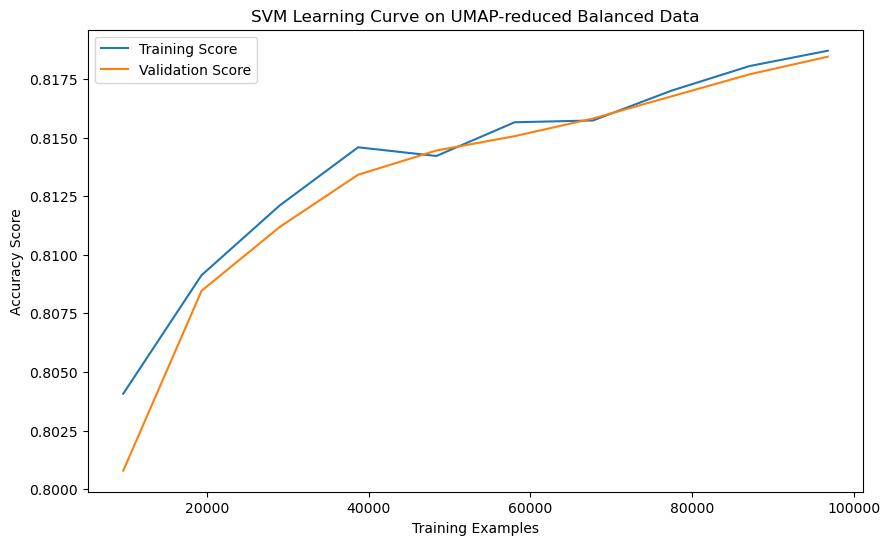

In [307]:
train_sizes_svm_umap_balanced, train_scores_svm_umap_balanced, test_scores_svm_umap_balanced = learning_curve(
    svm_classifier_umap_balanced, 
    X_train_umap_balanced, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    verbose=1
)

# Plot the learning curve for Support Vector Machine with UMAP on Balanced Data
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm_umap_balanced, np.mean(train_scores_svm_umap_balanced, axis=1), label="Training Score")
plt.plot(train_sizes_svm_umap_balanced, np.mean(test_scores_svm_umap_balanced, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("SVM Learning Curve on UMAP-reduced Balanced Data")
plt.legend()
plt.savefig("SVM Learning Curve on UMAP-reduced Balanced Data.png")
plt.show()

### ROC curve for SVM with UMAP on Balanced Data

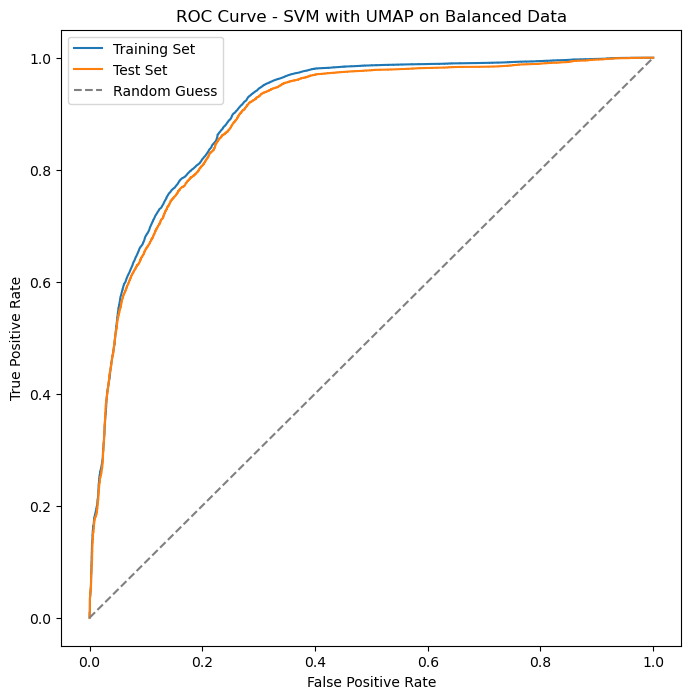

In [308]:
# Generating decision function scores for the balanced SVM classifier with RBF kernel on the training and test sets with UMAP reduction
y_train_svm_umap_balanced = svm_classifier_umap_balanced.decision_function(X_train_umap_balanced)
y_test_svm_umap_balanced = svm_classifier_umap_balanced.decision_function(X_test_umap_balanced)

# Calculate ROC curve for training set
fpr_train_svm_umap_balanced, tpr_train_svm_umap_balanced, thresholds_train_svm_umap_balanced = roc_curve(y_train, y_train_svm_umap_balanced)

# Calculate ROC curve for test set
fpr_test_svm_umap_balanced, tpr_test_svm_umap_balanced, thresholds_test_svm_umap_balanced = roc_curve(y_test, y_test_svm_umap_balanced)

# Plot ROC curve for SVM with UMAP on Balanced Data
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_svm_umap_balanced, tpr_train_svm_umap_balanced, label='Training Set')
plt.plot(fpr_test_svm_umap_balanced, tpr_test_svm_umap_balanced, label='Test Set')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM with UMAP on Balanced Data')
plt.legend()
plt.savefig("ROC_SVM_UMAP_Balanced.png")
plt.show()

## ROC curves for different classifiers on UMAP data

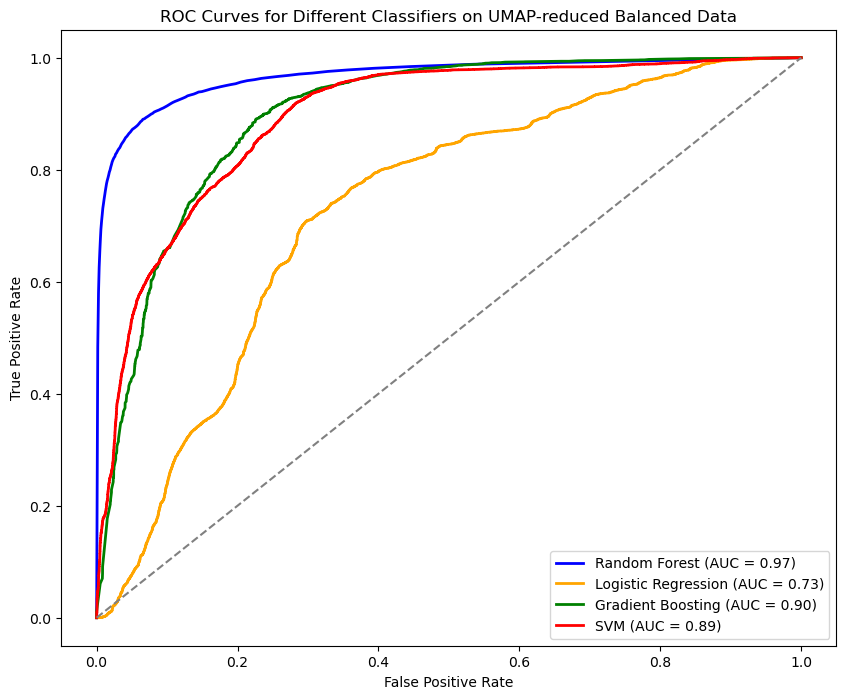

In [309]:
def plot_roc_curve_for_classifier(classifier, X, y, label, color):
    if hasattr(classifier, "predict_proba"):
        y_proba = classifier.predict_proba(X)[:, 1]
    elif hasattr(classifier, "decision_function"):
        y_decision = classifier.decision_function(X)
        y_proba = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())
    else:
        raise ValueError("Classifier does not have predict_proba or decision_function")

    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})', color=color)

# grouping the classifiers
classifiers = [rf_classifier_umap_balanced, lr_classifier_umap_balanced, gb_classifier_umap_balanced, svm_classifier_umap_balanced]
reduced_data = [X_test_umap_balanced] * len(classifiers)  # plot for the test set
labels = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM'] # Assign Labels
colors = ['blue', 'orange', 'green', 'red'] # Color Labels

plt.figure(figsize=(10, 8))

for classifier, X, label, color in zip(classifiers, reduced_data, labels, colors):
    plot_roc_curve_for_classifier(classifier, X, y_test, label, color)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers on UMAP-reduced Balanced Data')
plt.legend()
plt.savefig("ROC_Curves_UMAP_Balanced.png")
plt.show()


## Visualizing the Classifiers on Balanced Dataset

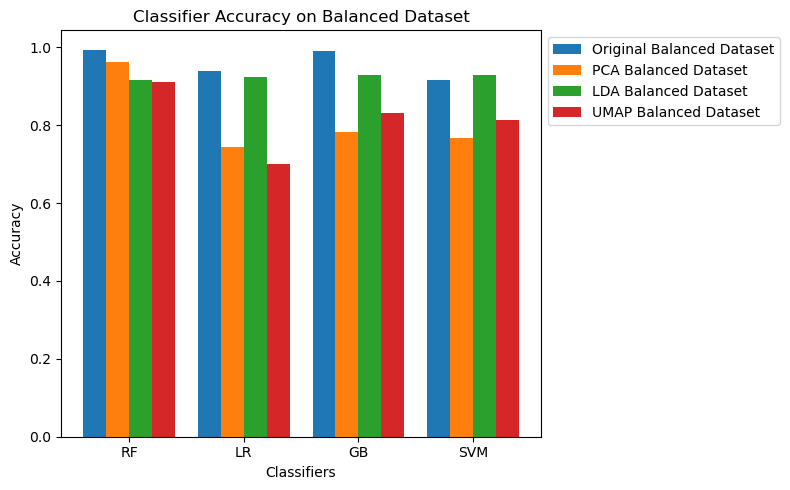

In [310]:
# Data for plotting
classifiers = ['RF', 'LR', 'GB', 'SVM']

# Accuracy values for the original balanced dataset
accuracy_original = [accuracy_rf, accuracy_lr, accuracy_gb, accuracy_svm]

# Accuracy values for the balanced dataset with PCA
accuracy_pca = [accuracy_rf_pca_balanced, accuracy_lr_pca_balanced, accuracy_gb_pca_balanced, accuracy_svm_pca_balanced]

# Accuracy values for the balanced dataset with LDA
accuracy_lda = [accuracy_rf_lda_balanced, accuracy_lr_lda_balanced, accuracy_gb_lda_balanced, accuracy_svm_lda_balanced]

# Accuracy values for the balanced dataset with UMAP
accuracy_umap = [accuracy_rf_umap_balanced, accuracy_lr_umap_balanced, accuracy_gb_umap_balanced, accuracy_svm_umap_balanced]

# Bar chart
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(8, 5))

plt.bar(index, accuracy_original, bar_width, label='Original Balanced Dataset')
plt.bar(index + bar_width, accuracy_pca, bar_width, label='PCA Balanced Dataset')
plt.bar(index + 2 * bar_width, accuracy_lda, bar_width, label='LDA Balanced Dataset')
plt.bar(index + 3 * bar_width, accuracy_umap, bar_width, label='UMAP Balanced Dataset')

plt.title('Classifier Accuracy on Balanced Dataset')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(index + 1.5 * bar_width, classifiers)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False) 
plt.tight_layout()
plt.savefig("Classifier Accuracy on Balanced Dataset.png")
plt.show()


## Plotting the training times across all Models

In [311]:
# Define the variable names for training times
classifiers = ['RF', 'LR', 'GB', 'SVM',
               'RF-PCA', 'LR-PCA', 'GB-PCA', 'SVM-PCA',
               'RF-LDA', 'LR-LDA', 'GB-LDA', 'SVM-LDA',
               'RF-UMAP', 'LR-UMAP', 'GB-UMAP', 'SVM-UMAP']

training_times = [training_time_rf, training_time_lr, training_time_gb, training_time_svm,
                  training_time_rf_pca_balanced, training_time_lr_pca_balanced, training_time_gb_pca_balanced, training_time_svm_pca_balanced,
                  training_time_rf_lda_balanced, training_time_lr_lda_balanced, training_time_gb_lda_balanced, training_time_svm_lda_balanced,
                  training_time_rf_umap_balanced, training_time_lr_umap_balanced, training_time_gb_umap_balanced, training_time_svm_umap_balanced]

# Create a DataFrame for easy plotting
import pandas as pd
df_time = pd.DataFrame({'Classifiers': classifiers, 'Training Time (s)': training_times})

In [312]:
df_time

Classifiers  Training Time (s)
0           RF           6.766894
1           LR           0.829491
2           GB          20.634565
3          SVM         686.759990
4       RF-PCA          12.909647
5       LR-PCA           0.162067
6       GB-PCA           8.310177
7      SVM-PCA        3932.258107
8       RF-LDA          12.183306
9       LR-LDA           0.077607
10      GB-LDA           6.421944
11     SVM-LDA         170.211942
12     RF-UMAP          42.907749
13     LR-UMAP           0.288731
14     GB-UMAP          43.514928
15    SVM-UMAP         466.136253

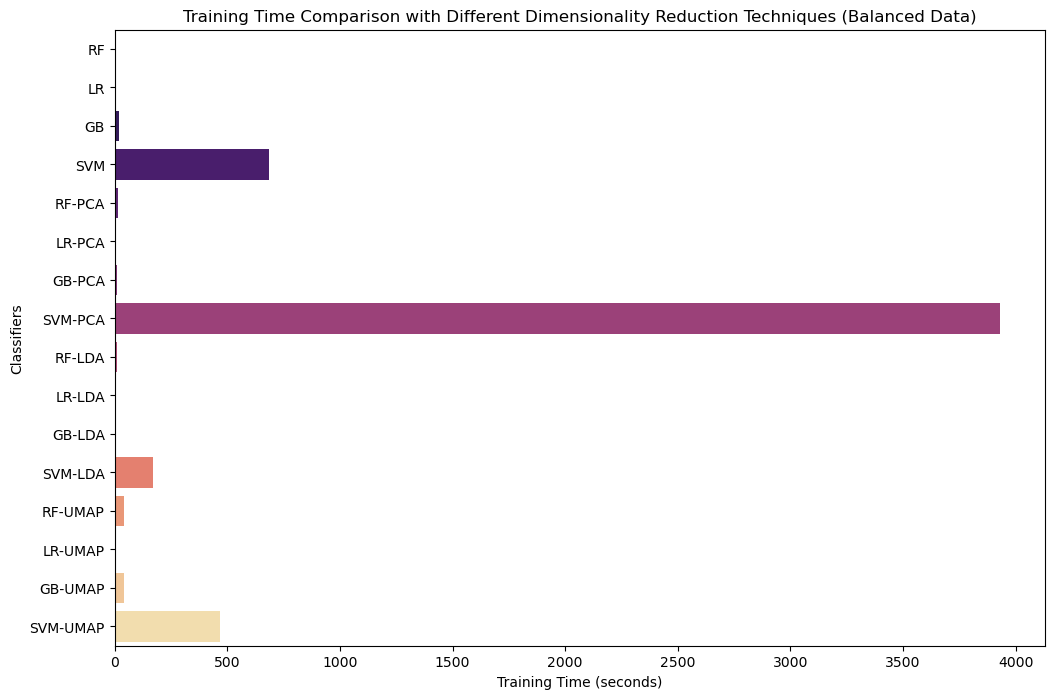

In [313]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Training Time (s)', y='Classifiers', data=df_time, palette='magma')
plt.title('Training Time Comparison with Different Dimensionality Reduction Techniques (Balanced Data)')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Classifiers')
plt.grid(False)
plt.savefig("Training Time Comparison with Different Dimensionality Reduction Techniques.png")
plt.show()